In [1]:
# !pip install pandas yfinance matplotlib prophet

In [2]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
# Step 1: Fetch the data using yfinance
dat = yf.Ticker("SOXL")
df = dat.history(start="2024-01-01")
# df = dat.history(period='max')

# Define the stock ticker and the time period
ticker = "SOXL"
end_time = datetime.now()
start_time = end_time - timedelta(days=1)  # Last day

In [3]:
# df has 2010-03-11 00:00:00-05:00 in the index, instead I want 2010-03-11
df.index = df.index.map(lambda x: x.replace(tzinfo=None))

In [4]:
# drop the columns 'Dividends', 'Stock Splits', and 'Capital Gains'
df.drop(columns=['Dividends', 'Stock Splits', 'Capital Gains'], inplace=True)
df


,Open,High,Low,Close,Volume
Date,,,,,
2024-01-02,29.729113,29.739059,27.113270,27.889072,79763800
2024-01-03,26.446876,26.904399,25.740696,26.108706,62304900
2024-01-04,24.825649,26.188275,24.666510,25.442312,75067000
2024-01-05,25.511935,26.476715,25.263280,25.790428,73790500
2024-01-08,26.347412,28.515678,26.287735,28.276970,73206500
...,...,...,...,...,...
2024-11-22,28.250000,28.690001,27.840000,28.490000,52604100
2024-11-25,29.580000,30.100000,28.740000,29.330000,70536000
2024-11-26,30.040001,30.250000,27.459999,28.129999,73204200


In [5]:
# add open_close_diff, high_low_diff columns
df['open_close_diff'] = df['Open'] - df['Close']
df['high_low_diff'] = df['High'] - df['Low']
df


,Open,High,Low,Close,Volume,open_close_diff,high_low_diff
Date,,,,,,,
2024-01-02,29.729113,29.739059,27.113270,27.889072,79763800,1.840041,2.625789
2024-01-03,26.446876,26.904399,25.740696,26.108706,62304900,0.338170,1.163702
2024-01-04,24.825649,26.188275,24.666510,25.442312,75067000,-0.616664,1.521765
2024-01-05,25.511935,26.476715,25.263280,25.790428,73790500,-0.278494,1.213434
2024-01-08,26.347412,28.515678,26.287735,28.276970,73206500,-1.929558,2.227943
...,...,...,...,...,...,...,...
2024-11-22,28.250000,28.690001,27.840000,28.490000,52604100,-0.240000,0.850000
2024-11-25,29.580000,30.100000,28.740000,29.330000,70536000,0.250000,1.360001
2024-11-26,30.040001,30.250000,27.459999,28.129999,73204200,1.910002,2.790001


<Figure size 2000x800 with 0 Axes>

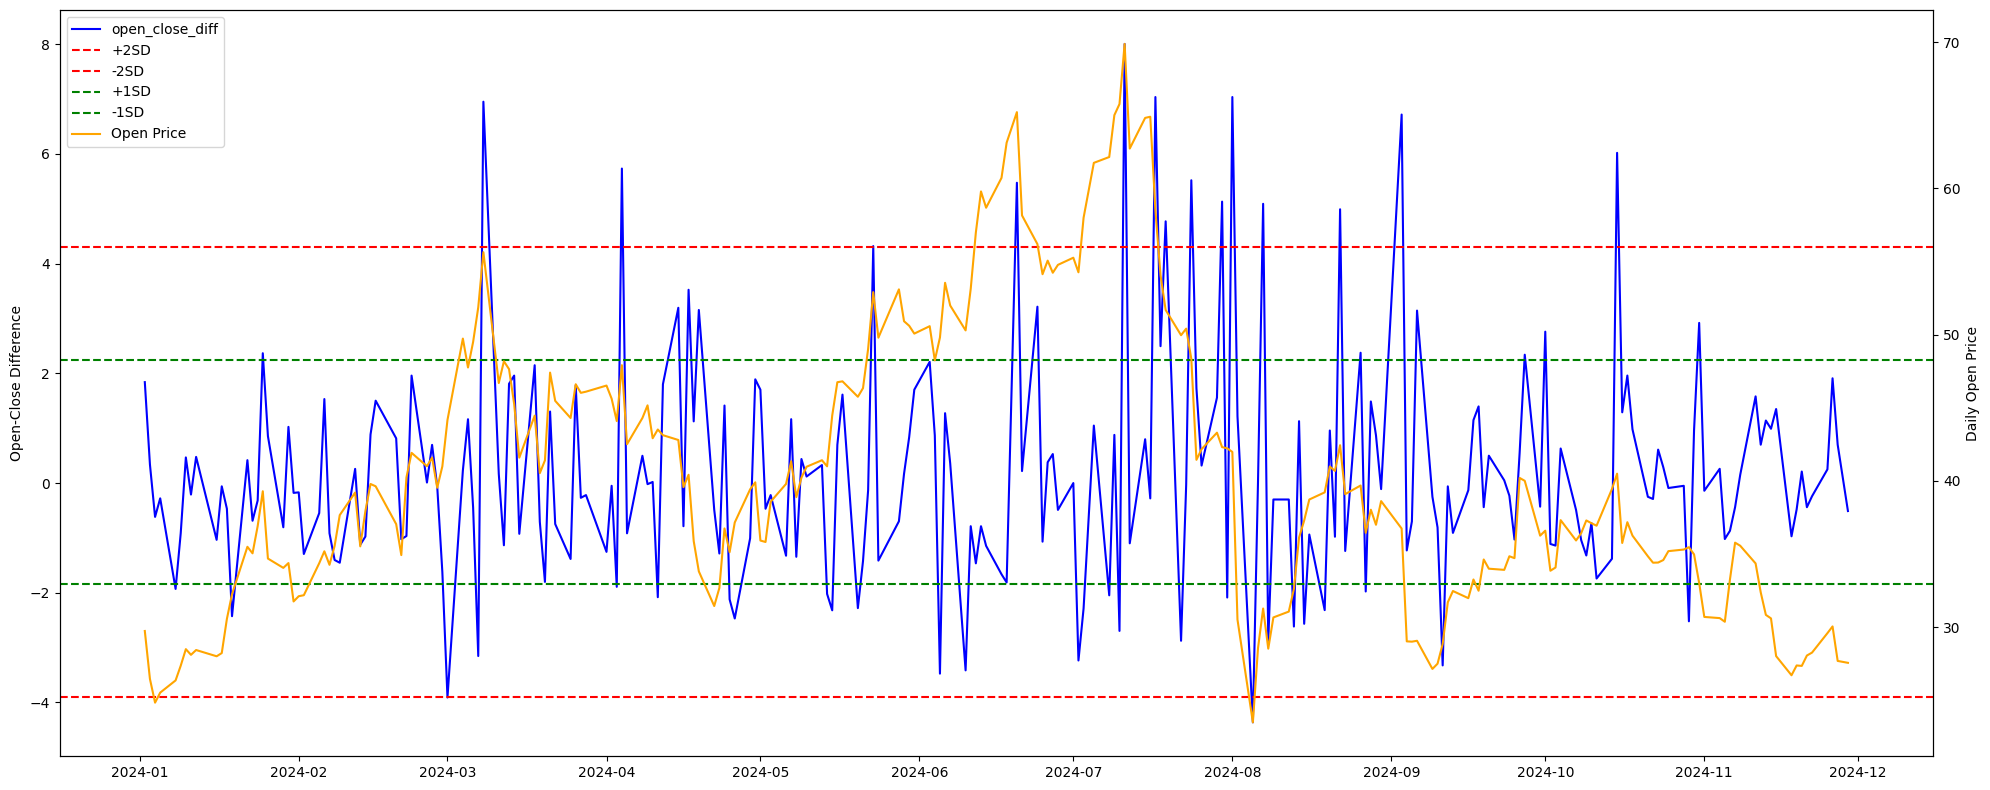

In [6]:
# plot open_close_diff and high_low_diff with 2SD and 1SD lines
plt.figure(figsize=(20, 8))  # Set a wider figure size
fig, ax1 = plt.subplots(figsize=(20, 8))  # Create subplot with wider size

# Plot open_close_diff on left y-axis
ax1.plot(df['open_close_diff'], label='open_close_diff', color='blue')
# plt.plot(df['high_low_diff'], label='high_low_diff')

# Calculate and plot 2 standard deviations and 1 standard deviation
mean = df['open_close_diff'].mean()
std = df['open_close_diff'].std()
ax1.axhline(y=mean + 2*std, color='r', linestyle='--', label='+2SD')
ax1.axhline(y=mean - 2*std, color='r', linestyle='--', label='-2SD')
ax1.axhline(y=mean + std, color='g', linestyle='--', label='+1SD')
ax1.axhline(y=mean - std, color='g', linestyle='--', label='-1SD')

# Create second y-axis and plot Open price
ax2 = ax1.twinx()
ax2.plot(df['Open'], label='Open Price', color='orange')

# Set labels for both y-axes
ax1.set_ylabel('Open-Close Difference')
ax2.set_ylabel('Daily Open Price')

# Add legends for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()  # Adjust layout to use maximum space
plt.show()


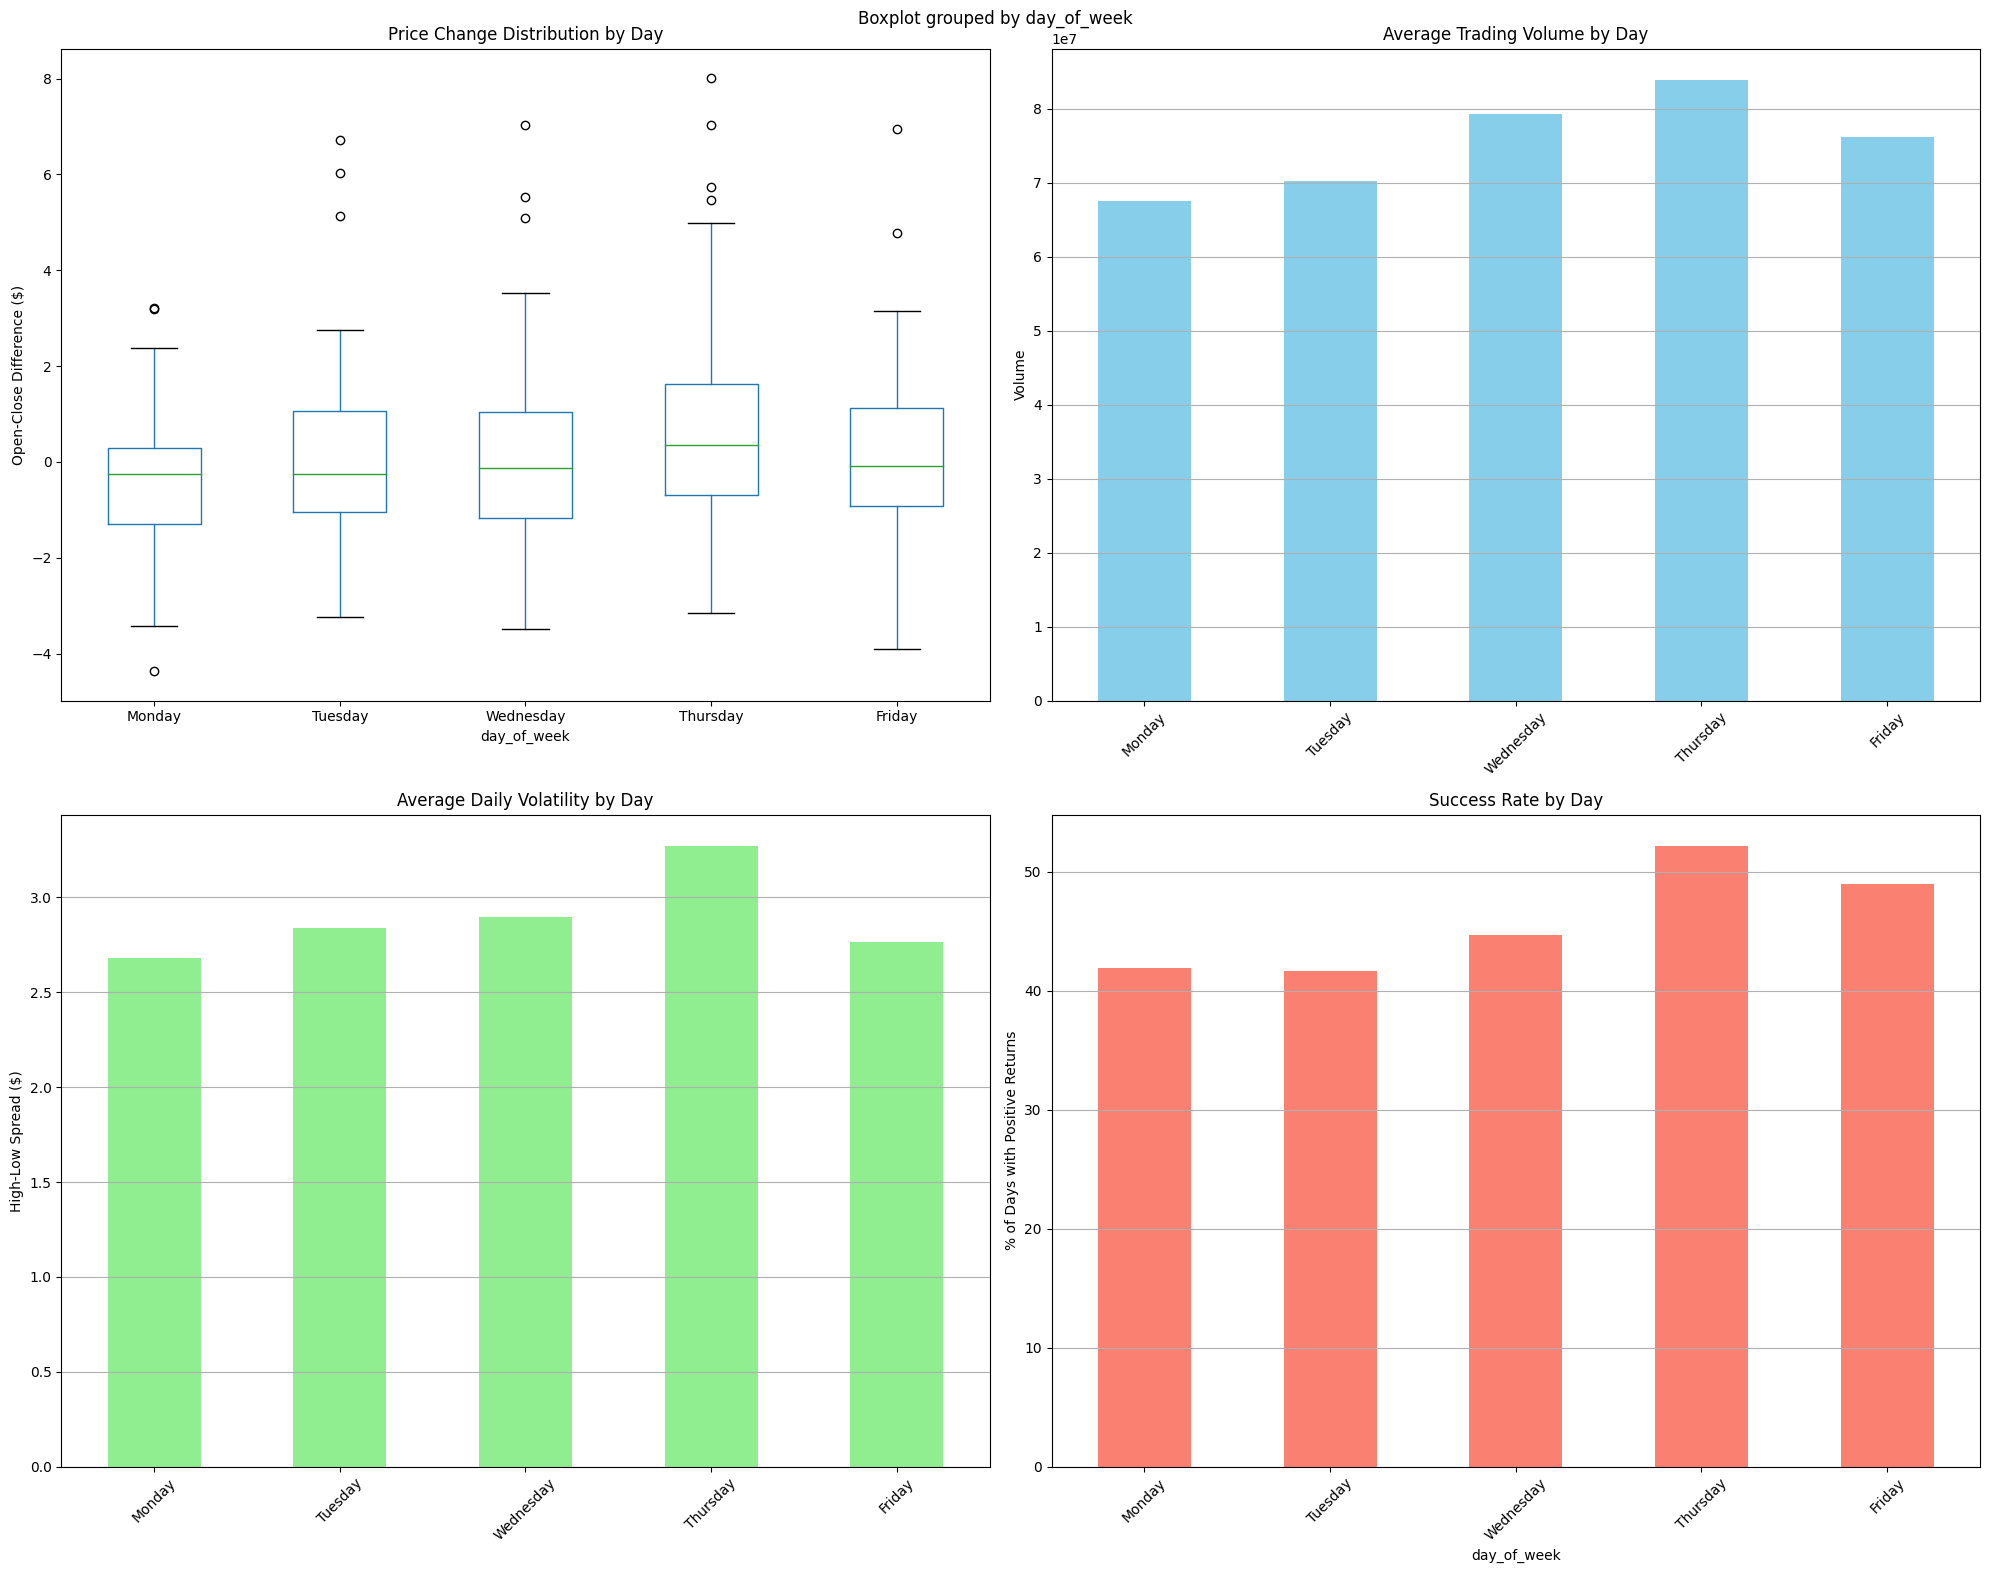


Detailed Statistics by Day of Week:
           Price_Change_Mean  Price_Change_Std  Number_of_Days  \
Monday                -0.288             1.616              43   
Tuesday                0.186             2.006              48   
Wednesday              0.060             2.104              47   
Thursday               0.763             2.481              46   
Friday                 0.259             1.867              47   

           Volatility_Mean  Volatility_Std    Avg_Volume  
Monday               2.678           1.193  6.756266e+07  
Tuesday              2.840           1.325  7.026511e+07  
Wednesday            2.897           1.428  7.932023e+07  
Thursday             3.272           1.983  8.389951e+07  
Friday               2.762           1.456  7.610534e+07  

Success Rate by Day of Week:
day_of_week
0    41.86
1    41.67
2    44.68
3    52.17
4    48.94
Name: open_close_diff, dtype: float64


In [7]:
# Analyze daily patterns for day trading insights

# Create a copy of the dataframe with day of week information
df_weekly = df.copy()
df_weekly['day_of_week'] = df_weekly.index.dayofweek

# Calculate key statistics for each day
daily_stats = df_weekly.groupby('day_of_week').agg({
    'open_close_diff': ['mean', 'std', 'count'],
    'high_low_diff': ['mean', 'std'],
    'Volume': 'mean'
}).round(3)

daily_stats.columns = ['Price_Change_Mean', 'Price_Change_Std', 'Number_of_Days', 
                      'Volatility_Mean', 'Volatility_Std', 'Avg_Volume']
daily_stats.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Create figure with multiple subplots for different metrics
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Day of Week Trading Patterns Analysis', fontsize=16, y=0.95)

# 1. Box plot of price changes by day
df_weekly.boxplot(column='open_close_diff', by='day_of_week', 
                 ax=ax1, grid=False)
ax1.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
ax1.set_title('Price Change Distribution by Day')
ax1.set_ylabel('Open-Close Difference ($)')

# 2. Average volume by day
daily_stats['Avg_Volume'].plot(kind='bar', ax=ax2, color='skyblue')
ax2.set_title('Average Trading Volume by Day')
ax2.set_ylabel('Volume')
ax2.grid(axis='y')

# 3. Volatility (High-Low spread) by day
daily_stats['Volatility_Mean'].plot(kind='bar', ax=ax3, color='lightgreen')
ax3.set_title('Average Daily Volatility by Day')
ax3.set_ylabel('High-Low Spread ($)')
ax3.grid(axis='y')

# 4. Success rate (% of positive price changes) by day
success_rate = (df_weekly.groupby('day_of_week')['open_close_diff']
               .apply(lambda x: (x > 0).mean() * 100)
               .round(2))
success_rate.plot(kind='bar', ax=ax4, color='salmon')
ax4.set_title('Success Rate by Day')
ax4.set_ylabel('% of Days with Positive Returns')
ax4.grid(axis='y')

# Add day names to all x-axes
for ax in [ax2, ax3, ax4]:
    ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 
                       rotation=45)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Statistics by Day of Week:")
print(daily_stats)
print("\nSuccess Rate by Day of Week:")
print(success_rate)


Number of data points: 231

First few rows:
           ds         y
0  2024-01-02  1.840041
1  2024-01-03  0.338170
2  2024-01-04 -0.616664
3  2024-01-05 -0.278494
4  2024-01-08 -1.929558

Last few rows:
             ds         y
226  2024-11-22 -0.240000
227  2024-11-25  0.250000
228  2024-11-26  1.910002
229  2024-11-27  0.700001
230  2024-11-29 -0.510000


11:13:36 - cmdstanpy - INFO - Chain [1] start processing
11:13:36 - cmdstanpy - INFO - Chain [1] done processing


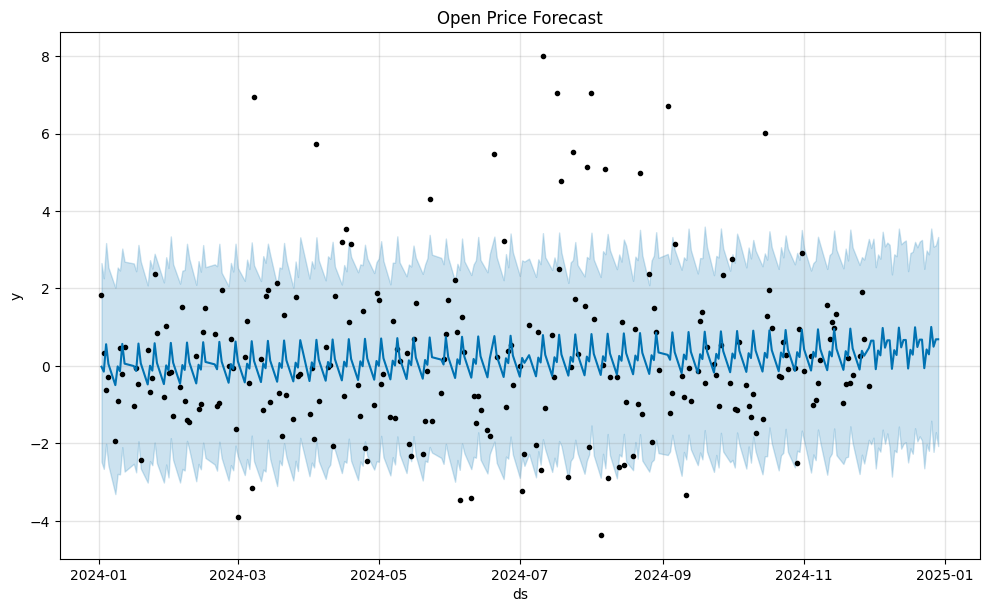

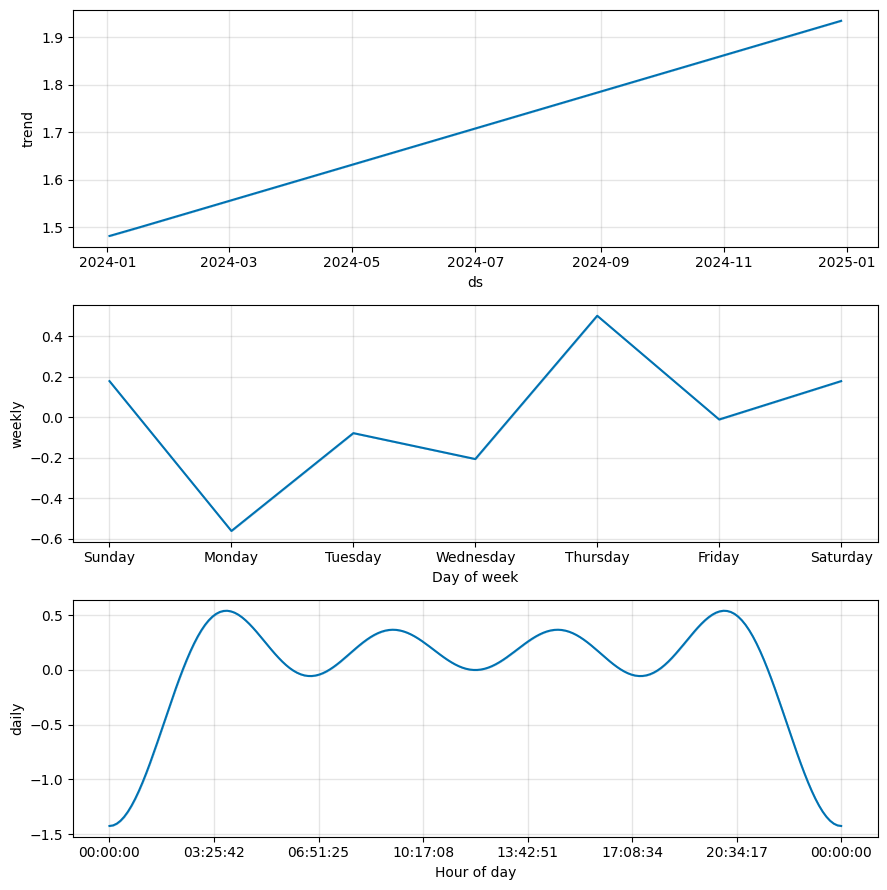


Last few predictions:
            ds      yhat  yhat_lower  yhat_upper
256 2024-12-25  0.298046   -2.194037    2.882005
257 2024-12-26  1.006086   -1.415908    3.548006
258 2024-12-27  0.495656   -2.220831    3.080104
259 2024-12-28  0.686213   -1.712402    3.114378
260 2024-12-29  0.687464   -2.070928    3.330571


In [8]:
# This code uses Facebook's Prophet library to forecast stock prices
# The output shows:
# 1. Data preparation and validation:
#    - 3705 total data points from 2010 to 2024
#    - First rows show prices around $0.59 (March 2010)
#    - Last rows show prices around $27-30 (November 2024)
#    This indicates significant price growth over 14 years

# 2. Model training:
#    - The cmdstanpy output shows the Prophet model training process
#    - Training completed successfully in 2 seconds (15:58:34 to 15:58:36)

# 3. The plots below show:
#    - Forecast plot: Historical data + 30 day future predictions with uncertainty intervals
#    - Components plot: Breakdown of the forecast into:
#      * Overall trend
#      * Yearly seasonality patterns  
#      * Weekly seasonality patterns
#      * Daily seasonality patterns

from prophet import Prophet

# Prepare data for Prophet
prophet_df = pd.DataFrame()
prophet_df['ds'] = df.index.strftime('%Y-%m-%d')  # Convert datetime index to string dates
prophet_df['y'] = df['open_close_diff'].values  # Use values to avoid index issues

# Check for and remove any NaN values
prophet_df = prophet_df.dropna()

# Print data info before proceeding
print(f"Number of data points: {len(prophet_df)}")
print("\nFirst few rows:")
print(prophet_df.head())
print("\nLast few rows:") 
print(prophet_df.tail())

# Verify we have enough data and data quality
if len(prophet_df) < 2:
    print("Error: Not enough valid data points for prediction")
elif prophet_df['y'].isnull().any():
    print("Error: Dataset contains null values in target column")
elif not pd.to_datetime(prophet_df['ds'], errors='coerce').notnull().all():
    print("Error: Dataset contains invalid dates")
else:
    # Initialize and fit Prophet model
    m = Prophet(daily_seasonality=True)
    m.fit(prophet_df)

    # Create future dates dataframe
    future = m.make_future_dataframe(periods=30)

    # Make predictions
    forecast = m.predict(future)

    # Plot the forecast
    fig = m.plot(forecast)
    plt.title('Open Price Forecast')
    plt.show()

    # Plot components of the forecast (trend, seasonality)
    fig2 = m.plot_components(forecast)
    plt.show()

    # Display the last few predictions
    print("\nLast few predictions:")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


In [9]:
# Other out-of-the-box automated forecasting methods:
# 1. PyCaret Time Series Forecasting
# 2. NeuralProphet
# 3. AutoTS
# 4. Nixtla
# 5. TPOT
# 6. sktime
# 7. skforecast

In [10]:
dfgdfgdf

NameError: name 'dfgdfgdf' is not defined

In [14]:
# 1. PyCaret Time Series Forecasting
! pip install pycaret

ERROR: Could not find a version that satisfies the requirement pycaret-ts-forecasting (from versions: none)
ERROR: No matching distribution found for pycaret-ts-forecasting

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [20]:
from pycaret.time_series import TSForecastingExperiment
from pycaret.utils.time_series import clean_time_index

# Convert index to datetime with daily frequency and fill missing dates
df.index = df.index.to_timestamp() # Fixed error by calling to_timestamp() directly on index
df = clean_time_index(data=df, freq='D')

exp = TSForecastingExperiment()
exp.setup(data=df['Open'], fh=7, fold=10, session_id=42, n_jobs=-1, use_gpu=False,
          numeric_imputation_target='mean')  # Enable imputation to handle missing values

,Description,Value
0,session_id,42
1,Target,Open
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(5375, 1)"
5,Transformed data shape,"(5375, 1)"
6,Transformed train set shape,"(5368, 1)"
7,Transformed test set shape,"(7, 1)"
8,Rows with missing values,31.1%
9,Fold Generator,ExpandingWindowSplitter


In [21]:

# Train and compare models
best_model = exp.compare_models(sort='MAE', turbo=True)

# Finalize the model and predict future values
final_model = exp.finalize_model(best_model)
forecast = exp.predict_model(final_model)


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,1.5906,0.6816,2.0235,2.6240,0.0641,0.0638,0.9095,0.4230
exp_smooth,Exponential Smoothing,1.6149,0.7029,2.0544,2.7061,0.0643,0.0629,0.9021,0.8650
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.7051,0.7553,2.1695,2.9076,0.0673,0.0665,0.8966,0.0680
arima,ARIMA,1.7061,0.7499,2.1707,2.8868,0.0676,0.0667,0.8960,0.0660
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,1.7196,0.7515,2.1879,2.8927,0.0693,0.0681,0.8784,0.6150
snaive,Seasonal Naive Forecaster,1.7196,0.7564,2.1879,2.9116,0.0685,0.0677,0.8960,0.2420
stlf,STLF,1.7765,0.7490,2.2597,2.8836,0.0789,0.0796,0.9004,0.0430
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.8959,0.7573,2.4119,2.9155,0.0872,0.0868,0.9010,0.0620
auto_arima,Auto ARIMA,1.9533,0.7698,2.4840,2.9640,0.0985,0.1046,0.8900,82.7920
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.9547,0.7742,2.4865,2.9805,0.0908,0.0897,0.8872,0.4000


In [22]:

# Plot the forecast
exp.plot_model(final_model, plot='forecast')
plt.show()


In [23]:
# 2. NeuralProphet
!pip install neuralprophet

  Obtaining dependency information for neuralprophet from https://files.pythonhosted.org/packages/71/a3/a60eedc2c160f81e841bbfb1f3bd7cba2369ff04187614f732da667fd1c3/neuralprophet-0.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for captum>=0.6.0 from https://files.pythonhosted.org/packages/e1/76/b21bfd2c35cab2e9a4b68b1977f7488c246c8cffa31e3361ee7610e8b5af/captum-0.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for pytorch-lightning>=2.0.0 from https://files.pythonhosted.org/packages/2b/d2/ecd65ff1e0b1ca79f9785dd65d5ced7ec2643a828068aaa24e47e4c84a14/pytorch_lightning-2.4.0-py3-none-any.whl.metadata
  Using cached pytorch_lightning-2.4.0-py3-none-any.whl.metadata (21 kB)
  Obtaining dependency information for torch>=2.0.0 from https://files.pythonhosted.org/packages/3b/55/7192974ab13e5e5577f45d14ce70d42f5a9a686b4f57bbe8c9ab45c4a61a/torch-2.2.2-cp310-none-macosx_10_9_x86_64.whl.metadata
  Using cached torch-2.2.2-cp310-none-macosx_10_9_x86_64.whl.metada

In [32]:
from neuralprophet import NeuralProphet

# Prepare dataframe in required format for NeuralProphet
df_prophet = df.reset_index()
# Convert index to timestamp before proceeding
df_prophet['ds'] = pd.to_datetime(df_prophet.index)
df_prophet = df_prophet[['ds', 'Open']].rename(columns={'Open': 'y'})

m = NeuralProphet()
metrics = m.fit(df_prophet, freq='D')
forecast = m.predict(df_prophet)
fig = m.plot(forecast)
plt.show()

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency N corresponds to 99.981% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency N
INFO - (NP.data.processing._handle_missing_data) - Dropped 1670 rows with NaNs in 'y' column.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (58) is too small than the required number                     for the learning rate finder (239). The results might not be optimal.
2024-11-26 17:02:45.937808: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Finding best initial lr:   0%|          | 0/239 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 64. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 57. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency N corresponds to 99.981% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency N
INFO - (NP.df_utils._infer_frequency) - Major frequency N corresponds to 99.981% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency N


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




In [33]:
# 3. AutoTS
!pip install autots

  Obtaining dependency information for autots from https://files.pythonhosted.org/packages/0a/46/6bb241ad4b504d7022c7bdd780b229ee1c81c5ba677c7544d5fbe879ce4d/autots-0.6.16-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.7/947.7 kB 13.7 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [40]:
from autots import AutoTS

# The index is already a DatetimeIndex, no need to convert
# Just proceed with model creation and fitting
model = AutoTS(
    forecast_length=30,  # Reduced from 365 to 30 days
    frequency='D',
    ensemble='simple', 
    drop_data_older_than_periods=365,
    min_allowed_train_percent=0.2  # Allow smaller training set
)
model = model.fit(df)
prediction = model.predict(forecast_length=30)  # Match the model's forecast length
forecast = prediction.forecast
fig = model.plot(prediction)
plt.show()

Using 4 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 25
Model Number: 2 with model AverageValueNaive in generation 0 of 25
Model Number: 3 with model AverageValueNaive in generation 0 of 25
Model Number: 4 with model DatepartRegression in generation 0 of 25
Model Number: 5 with model DatepartRegression in generation 0 of 25


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` expli

Model Number: 6 with model DatepartRegression in generation 0 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html




Model Number: 7 with model DatepartRegression in generation 0 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3865
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3831 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3810 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3794 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3775 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3730 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3680 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3623 
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3517 
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3434 
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3284 
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3131 
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3051 
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2990 
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2935 
Epoch

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html




Model Number: 24 with model ConstantNaive in generation 0 of 25
Model Number: 25 with model FBProphet in generation 0 of 25


17:05:59 - cmdstanpy - INFO - Chain [1] start processing
17:05:59 - cmdstanpy - INFO - Chain [1] start processing
17:05:59 - cmdstanpy - INFO - Chain [1] start processing
17:05:59 - cmdstanpy - INFO - Chain [1] start processing
17:05:59 - cmdstanpy - INFO - Chain [1] done processing
17:05:59 - cmdstanpy - INFO - Chain [1] done processing
17:05:59 - cmdstanpy - INFO - Chain [1] done processing
17:05:59 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 26 with model DatepartRegression in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 26 in generation 0: DatepartRegression
Model Number: 27 with model SeasonalNaive in generation 0 of 25
Model Number: 28 with model DatepartRegression in generation 0 of 25
Model Number: 29 with model ETS in generation 0 of 25
Model Number: 30 with model ARDL in generation 0 of 25
Model Number: 31 with model UnivariateMotif in generation 0 of 25
Model Number: 32 with model UnivariateMotif in generation 0 of 25
Model Number: 33 with model SectionalMotif in generation 0 of 25
Model Number: 34 with model SectionalMotif in generation 0 of 25
Model Number: 35 with model FBProphet in generation 0 of 25


17:06:08 - cmdstanpy - INFO - Chain [1] start processing
17:06:08 - cmdstanpy - INFO - Chain [1] start processing
17:06:08 - cmdstanpy - INFO - Chain [1] start processing
17:06:08 - cmdstanpy - INFO - Chain [1] start processing
17:06:08 - cmdstanpy - INFO - Chain [1] done processing
17:06:08 - cmdstanpy - INFO - Chain [1] done processing
17:06:08 - cmdstanpy - INFO - Chain [1] done processing
17:06:08 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 36 with model SeasonalNaive in generation 0 of 25
Model Number: 37 with model DatepartRegression in generation 0 of 25
Model Number: 38 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 38 in generation 0: ARCH
Model Number: 39 with model Cassandra in generation 0 of 25
Model Number: 40 with model SeasonalityMotif in generation 0 of 25
Model Number: 41 with model Cassandra in generation 0 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




Model Number: 42 with model Cassandra in generation 0 of 25
FillNA method `pad` not known, returning original
Model Number: 43 with model Cassandra in generation 0 of 25
Model Number: 44 with model SectionalMotif in generation 0 of 25
Model Number: 45 with model FBProphet in generation 0 of 25
Model Number: 46 with model ARDL in generation 0 of 25
Model Number: 47 with model FFT in generation 0 of 25
Model Number: 48 with model BasicLinearModel in generation 0 of 25
Model Number: 49 with model BasicLinearModel in generation 0 of 25
Model Number: 50 with model SeasonalityMotif in generation 0 of 25
Model Number: 51 with model ETS in generation 0 of 25
Model Number: 52 with model FBProphet in generation 0 of 25


17:06:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:06:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:06:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:06:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:06:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


Model Number: 53 with model GLM in generation 0 of 25
Model Number: 54 with model UnivariateMotif in generation 0 of 25
Model Number: 55 with model ARDL in generation 0 of 25
Model Number: 56 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 56 in generation 0: ARCH
Model Number: 57 with model ConstantNaive in generation 0 of 25
Model Number: 58 with model LastValueNaive in generation 0 of 25
Model Number: 59 with model AverageValueNaive in generation 0 of 25
Model Number: 60 with model GLS in generation 0 of 25
Model Number: 61 with model SeasonalNaive in generation 0 of 25
Model Number: 62 with model VAR in generation 0 of 25
Template Eval Error: LinAlgError('7-th leading minor of the array is not positive definite') in model 62 in generation 0: VAR
Model Number: 63 with model WindowRegression in generation 0 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




Model Number: 64 with model DatepartRegression in generation 0 of 25
Model Number: 65 with model SectionalMotif in generation 0 of 25
Model Number: 66 with model RRVAR in generation 0 of 25
Model Number: 67 with model MetricMotif in generation 0 of 25
Model Number: 68 with model Cassandra in generation 0 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/threadpoolctl.py:1214: RuntimeWarning:


Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md





Model Number: 69 with model SeasonalityMotif in generation 0 of 25
Model Number: 70 with model FFT in generation 0 of 25
Model Number: 71 with model BasicLinearModel in generation 0 of 25
Model Number: 72 with model UnivariateMotif in generation 0 of 25
Model Number: 73 with model SeasonalityMotif in generation 0 of 25
Model Number: 74 with model SeasonalityMotif in generation 0 of 25
Model Number: 75 with model MetricMotif in generation 0 of 25
Model Number: 76 with model ConstantNaive in generation 0 of 25
Model Number: 77 with model UnivariateMotif in generation 0 of 25
Template Eval Error: Exception("Transformer RobustScaler failed on fit from params pchip {'0': {'low': 6, 'high': 90, 'K': 1, 'lanczos_factor': False, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '3': {'method': 100}, '4': {'window': None}, '5': {'deci

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.712310091107754e+16, tolerance: 25624661737503.586




Model Number: 101 with model ETS in generation 0 of 25
Model Number: 102 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 102 in generation 0: ARCH
Model Number: 103 with model MetricMotif in generation 0 of 25
Model Number: 104 with model SeasonalNaive in generation 0 of 25
Model Number: 105 with model ConstantNaive in generation 0 of 25
Model Number: 106 with model SeasonalNaive in generation 0 of 25
Model Number: 107 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 107 in generation 0: ARCH
Model Number: 108 with model FFT in generation 0 of 25
Model Number: 109 with model ARDL in generation 0 of 25
Model Number: 110 with model DatepartRegression in generation 0 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params fake_date {'0': {}, '1': {}, '2': {}, '3': {'sigma': 1, 'rolling_window': 90, '

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.




Model Number: 120 with model DatepartRegression in generation 0 of 25
interpolating
Template Eval Error: ValueError('`x` must contain at least 2 elements.') in model 120 in generation 0: DatepartRegression
Model Number: 121 with model SeasonalityMotif in generation 0 of 25
Model Number: 122 with model SeasonalNaive in generation 0 of 25
Model Number: 123 with model MetricMotif in generation 0 of 25
Model Number: 124 with model FFT in generation 0 of 25
Model Number: 125 with model GLM in generation 0 of 25
Model Number: 126 with model AverageValueNaive in generation 0 of 25


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 127 with model UnivariateMotif in generation 0 of 25
Model Number: 128 with model ConstantNaive in generation 0 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=3.40802e-25): result may not be accurate.




Model Number: 129 with model FBProphet in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 129 in generation 0: FBProphet
Model Number: 130 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 130 in generation 0: ARCH
Model Number: 131 with model BasicLinearModel in generation 0 of 25
Model Number: 132 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 132 in generation 0: ARCH
Model Number: 133 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 133 in generation 0: ARCH
Model Number: 134 with model LastValueNaive in generation 0 of 25
Model Number: 135 with model GLM in generation 0 of 25
Model Number: 136 with model MetricMotif in generation 0 of 25


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 137 with model SeasonalityMotif in generation 0 of 25
Model Number: 138 with model VAR in generation 0 of 25
Template Eval Error: LinAlgError('6-th leading minor of the array is not positive definite') in model 138 in generation 0: VAR
Model Number: 139 with model LastValueNaive in generation 0 of 25
Model Number: 140 with model ETS in generation 0 of 25
Model Number: 141 with model SectionalMotif in generation 0 of 25
Model Number: 142 with model ETS in generation 0 of 25
Model Number: 143 with model FFT in generation 0 of 25
Model Number: 144 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 144 in generation 0: ARCH
Model Number: 145 with model GLM in generation 0 of 25


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 145 in generation 0: GLM
Model Number: 146 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 146 in generation 0: ARCH
Model Number: 147 with model ConstantNaive in generation 0 of 25
Model Number: 148 with model FFT in generation 0 of 25
Model Number: 149 with model LastValueNaive in generation 0 of 25
Model Number: 150 with model ConstantNaive in generation 0 of 25
Model Number: 151 with model MetricMotif in generation 0 of 25
Model Number: 152 with model SectionalMotif in generation 0 of 25
Model Number: 153 with model SectionalMotif in generation 0 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 153 in generation 0: SectionalMotif
Model Number: 154 with model LastValueNaive in generation 0 of 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.008953022867046e+16, tolerance: 12561245274112.0




Model Number: 161 with model ARDL in generation 1 of 25
Model Number: 162 with model ARDL in generation 1 of 25
Model Number: 163 with model LastValueNaive in generation 1 of 25
Model Number: 164 with model SeasonalNaive in generation 1 of 25
Model Number: 165 with model ConstantNaive in generation 1 of 25
Model Number: 166 with model ARDL in generation 1 of 25
Model Number: 167 with model GLS in generation 1 of 25
Model Number: 168 with model FFT in generation 1 of 25
Model Number: 169 with model Cassandra in generation 1 of 25
FillNA method `pad` not known, returning original
ValueError('zero-size array to reduction operation minimum which has no identity')
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params pad {'0': {}, '1': {'window_size': 90, 'alpha': 3.0, 'grouping_forward_limit': 4, 'max_level_shifts': 5, 'alignment': 'rolling_diff'}, '2': {'cutoff': 0.1, 'reverse': False, 'on_transform': True, 'on_inverse': False}, '3': {'regression_model':

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 171 with model ConstantNaive in generation 1 of 25
Model Number: 172 with model LastValueNaive in generation 1 of 25
Model Number: 173 with model SeasonalityMotif in generation 1 of 25
Model Number: 174 with model LastValueNaive in generation 1 of 25
Model Number: 175 with model MetricMotif in generation 1 of 25
Model Number: 176 with model SeasonalityMotif in generation 1 of 25
Model Number: 177 with model SectionalMotif in generation 1 of 25
Model Number: 178 with model LastValueNaive in generation 1 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params fake_date {'0': {}, '1': {'span': 12}, '2': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': True, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_para

/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aviralga

Model Number: 182 with model UnivariateMotif in generation 1 of 25
Model Number: 183 with model FBProphet in generation 1 of 25


17:07:08 - cmdstanpy - INFO - Chain [1] start processing
17:07:08 - cmdstanpy - INFO - Chain [1] start processing
17:07:08 - cmdstanpy - INFO - Chain [1] start processing
17:07:08 - cmdstanpy - INFO - Chain [1] start processing
17:07:08 - cmdstanpy - INFO - Chain [1] done processing
17:07:08 - cmdstanpy - INFO - Chain [1] done processing
17:07:08 - cmdstanpy - INFO - Chain [1] done processing
17:07:08 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 184 with model ETS in generation 1 of 25
Model Number: 185 with model SeasonalityMotif in generation 1 of 25
Model Number: 186 with model SectionalMotif in generation 1 of 25
Model Number: 187 with model SectionalMotif in generation 1 of 25
Model Number: 188 with model AverageValueNaive in generation 1 of 25
Model Number: 189 with model LastValueNaive in generation 1 of 25
Model Number: 190 with model DatepartRegression in generation 1 of 25
Model Number: 191 with model BasicLinearModel in generation 1 of 25
Model Number: 192 with model FBProphet in generation 1 of 25
Model Number: 193 with model GLM in generation 1 of 25
Model Number: 194 with model SeasonalNaive in generation 1 of 25
Model Number: 195 with model VAR in generation 1 of 25


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 196 with model BasicLinearModel in generation 1 of 25
Model Number: 197 with model MetricMotif in generation 1 of 25
Model Number: 198 with model GLM in generation 1 of 25
Model Number: 199 with model FBProphet in generation 1 of 25
Model Number: 200 with model GLM in generation 1 of 25
Model Number: 201 with model FBProphet in generation 1 of 25
Model Number: 202 with model MetricMotif in generation 1 of 25
Model Number: 203 with model ConstantNaive in generation 1 of 25
Model Number: 204 with model SectionalMotif in generation 1 of 25
Model Number: 205 with model ETS in generation 1 of 25
Model Number: 206 with model SeasonalNaive in generation 1 of 25
Model Number: 207 with model SectionalMotif in generation 1 of 25
Model Number: 208 with model DatepartRegression in generation 1 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html




Model Number: 209 with model DatepartRegression in generation 1 of 25
Model Number: 210 with model SeasonalityMotif in generation 1 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3214433197345952e+16, tolerance: 5134056767994.564




Model Number: 211 with model UnivariateMotif in generation 1 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning:

Ignoring n_components with whiten=False.




Model Number: 212 with model SeasonalNaive in generation 1 of 25
Model Number: 213 with model ETS in generation 1 of 25
Model Number: 214 with model GLM in generation 1 of 25


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 215 with model SeasonalNaive in generation 1 of 25
Model Number: 216 with model ARDL in generation 1 of 25
Model Number: 217 with model LastValueNaive in generation 1 of 25
Model Number: 218 with model ARDL in generation 1 of 25
Model Number: 219 with model AverageValueNaive in generation 1 of 25
Model Number: 220 with model SeasonalNaive in generation 1 of 25
Model Number: 221 with model LastValueNaive in generation 1 of 25
Model Number: 222 with model FFT in generation 1 of 25
Model Number: 223 with model SeasonalNaive in generation 1 of 25
Model Number: 224 with model LastValueNaive in generation 1 of 25
Model Number: 225 with model ETS in generation 1 of 25
Model Number: 226 with model AverageValueNaive in generation 1 of 25
Model Number: 227 with model AverageValueNaive in generation 1 of 25
Model Number: 228 with model ARDL in generation 1 of 25
Model Number: 229 with model FFT in generation 1 of 25
Model Number: 230 with model SeasonalNaive in generation 1 of 25
Mo

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




Model Number: 235 with model MetricMotif in generation 1 of 25
Model Number: 236 with model SeasonalityMotif in generation 1 of 25
Model Number: 237 with model FBProphet in generation 1 of 25


17:07:26 - cmdstanpy - INFO - Chain [1] start processing
17:07:26 - cmdstanpy - INFO - Chain [1] start processing
17:07:26 - cmdstanpy - INFO - Chain [1] start processing
17:07:26 - cmdstanpy - INFO - Chain [1] start processing
17:07:26 - cmdstanpy - INFO - Chain [1] done processing
17:07:26 - cmdstanpy - INFO - Chain [1] done processing
17:07:26 - cmdstanpy - INFO - Chain [1] done processing
17:07:26 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 238 with model FFT in generation 1 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'window_size': 14, 'alpha': 4.0, 'grouping_forward_limit': 5, 'max_level_shifts': 5, 'alignment': 'rolling_diff_3nn'}} with error ComplexWarning('Casting complex values to real discards the imaginary part')") in model 238 in generation 1: FFT
Model Number: 239 with model LastValueNaive in generation 1 of 25
Model Number: 240 with model ETS in generation 1 of 25
Model Number: 241 with model UnivariateMotif in generation 1 of 25
Model Number: 242 with model SeasonalityMotif in generation 1 of 25
Model Number: 243 with model GLM in generation 1 of 25
Model Number: 244 with model SectionalMotif in generation 1 of 25
Model Number: 245 with model BasicLinearModel in generation 1 of 25
Model Number: 246 with model FFT in generation 1 of 25
Model Number: 247 with

/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralga

Model Number: 258 with model FFT in generation 1 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'window_size': 14, 'alpha': 4.0, 'grouping_forward_limit': 5, 'max_level_shifts': 5, 'alignment': 'rolling_diff_3nn'}, '2': {'model_name': 'local linear stochastic seasonal 7', 'state_transition': [[1, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]], 'process_noise': [[1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'observa

17:07:37 - cmdstanpy - INFO - Chain [1] start processing
17:07:37 - cmdstanpy - INFO - Chain [1] start processing
17:07:37 - cmdstanpy - INFO - Chain [1] start processing
17:07:37 - cmdstanpy - INFO - Chain [1] start processing
17:07:37 - cmdstanpy - INFO - Chain [1] done processing
17:07:37 - cmdstanpy - INFO - Chain [1] done processing
17:07:37 - cmdstanpy - INFO - Chain [1] done processing
17:07:37 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 260 with model SeasonalityMotif in generation 1 of 25
New Generation: 2 of 25
Model Number: 261 with model SeasonalNaive in generation 2 of 25
Model Number: 262 with model SeasonalityMotif in generation 2 of 25
Model Number: 263 with model FFT in generation 2 of 25
Model Number: 264 with model SeasonalityMotif in generation 2 of 25
Model Number: 265 with model Cassandra in generation 2 of 25
Model Number: 266 with model Cassandra in generation 2 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




Model Number: 267 with model UnivariateMotif in generation 2 of 25
Model Number: 268 with model DatepartRegression in generation 2 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html




Model Number: 269 with model DatepartRegression in generation 2 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4511
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4472 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4451 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4418 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4393
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4361 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4302 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4227 
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4176 
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4123 
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4091 
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4028 
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4027 
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3941 
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3941 
Epoch 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.




interpolating
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 276 in generation 2: DatepartRegression
Model Number: 277 with model SeasonalityMotif in generation 2 of 25
Model Number: 278 with model ETS in generation 2 of 25
Model Number: 279 with model AverageValueNaive in generation 2 of 25
Template Eval Error: Exception("Transformer QuantileTransformer failed on fit from params rolling_mean_24 {'0': {'discretization': 'sklearn-kmeans', 'n_bins': 20}, '1': {'model_name': 'AR(2)', 'state_transition': [[1, 1], [0.1, 0]], 'process_noise': [[1, 0], [0, 0]], 'observation_model': [[1, 0]], 'observation_noise': 1.0, 'em_iter': None, 'on_transform': True, 'on_inverse': False}, '2': {'low': 4, 'high': 32, 'K': 3, 'lanczos_factor': False, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '3': {'output_distribution': 'normal', 'n_quantiles': 109}} with error ValueError('Shape of passed values is 

17:08:07 - cmdstanpy - INFO - Chain [1] start processing
17:08:07 - cmdstanpy - INFO - Chain [1] start processing
17:08:07 - cmdstanpy - INFO - Chain [1] start processing
17:08:07 - cmdstanpy - INFO - Chain [1] start processing
17:08:07 - cmdstanpy - INFO - Chain [1] done processing
17:08:07 - cmdstanpy - INFO - Chain [1] done processing
17:08:07 - cmdstanpy - INFO - Chain [1] done processing
17:08:07 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 281 with model ARDL in generation 2 of 25
Model Number: 282 with model FBProphet in generation 2 of 25
Model Number: 283 with model DatepartRegression in generation 2 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2744
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2712 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2716 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2714 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2705 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2698 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2699 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2691 
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2675 
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2652 
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2635 
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2637 
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2606 
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2595 
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2592 
Epoch

17:08:28 - cmdstanpy - INFO - Chain [1] start processing
17:08:28 - cmdstanpy - INFO - Chain [1] start processing
17:08:28 - cmdstanpy - INFO - Chain [1] start processing
17:08:28 - cmdstanpy - INFO - Chain [1] start processing
17:08:28 - cmdstanpy - INFO - Chain [1] done processing
17:08:28 - cmdstanpy - INFO - Chain [1] done processing
17:08:28 - cmdstanpy - INFO - Chain [1] done processing
17:08:28 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 298 with model FFT in generation 2 of 25
Model Number: 299 with model SectionalMotif in generation 2 of 25
Model Number: 300 with model SeasonalityMotif in generation 2 of 25
Model Number: 301 with model SeasonalNaive in generation 2 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params mean {\'0\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 10, \'threshold_method\': \'max\'}, \'1\': {\'rows\': 2}, \'2\': {\'whiten\': True, \'n_components\': 100}} with error ValueError("n_components=100 must be between 0 and min(n_samples, n_features)=7 with svd_solver=\'full\'")') in model 301 in generation 2: SeasonalNaive
Model Number: 302 with model AverageValueNaive in generation 2 of 25
Model Number: 303 with model UnivariateMotif in generation 2 of 25
Model Number: 304 with model ETS in generation 2 of 25
Model Number: 305 with model MetricMotif in generation 2 of 25
Model Number: 306 

17:08:42 - cmdstanpy - INFO - Chain [1] start processing
17:08:42 - cmdstanpy - INFO - Chain [1] start processing
17:08:42 - cmdstanpy - INFO - Chain [1] start processing
17:08:42 - cmdstanpy - INFO - Chain [1] start processing
17:08:42 - cmdstanpy - INFO - Chain [1] done processing
17:08:42 - cmdstanpy - INFO - Chain [1] done processing
17:08:42 - cmdstanpy - INFO - Chain [1] done processing
17:08:42 - cmdstanpy - INFO - Chain [1] done processing
17:08:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:08:42 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 314 with model MetricMotif in generation 2 of 25
Model Number: 315 with model SeasonalityMotif in generation 2 of 25


17:08:42 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 316 with model SectionalMotif in generation 2 of 25
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params fake_date {'0': {'sigma': 3, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.1, 'fit_intercept': True, 'selection': 'cyclic', 'max_iter': 2000}}, 'datepart_method': 'simple', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True, 'lags': None, 'forward_lags': None}, 'holiday_params': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05}, 'fillna': 'rolling_mean_24', 'transform_dict'

/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 320 with model ARDL in generation 2 of 25
Model Number: 321 with model SeasonalNaive in generation 2 of 25
Model Number: 322 with model MetricMotif in generation 2 of 25
Model Number: 323 with model GLS in generation 2 of 25
Model Number: 324 with model ETS in generation 2 of 25
Model Number: 325 with model DatepartRegression in generation 2 of 25
Model Number: 326 with model AverageValueNaive in generation 2 of 25
Model Number: 327 with model ETS in generation 2 of 25
Model Number: 328 with model ARDL in generation 2 of 25
Model Number: 329 with model DatepartRegression in generation 2 of 25
Model Number: 330 with model DatepartRegression in generation 2 of 25
Model Number: 331 with model GLS in generation 2 of 25
Model Number: 332 with model ETS in generation 2 of 25
Model Number: 333 with model ARDL in generation 2 of 25
Model Number: 334 with model VAR in generation 2 of 25
Template Eval Error: IndexError('tuple index out of range') in model 334 in generation 2: VAR
M

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=1.56635e-28): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=1.56635e-28): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=1.56635e-28): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=1.56635e-28): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/cod

Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {}} with error ComplexWarning('Casting complex values to real discards the imaginary part')") in model 338 in generation 2: LastValueNaive
Model Number: 339 with model DatepartRegression in generation 2 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 339 in generation 2: DatepartRegression
Model Number: 340 with model LastValueNaive in generation 2 of 25
Model Number: 341 with model ETS in generation 2 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the nu

Model Number: 342 with model ConstantNaive in generation 2 of 25
Model Number: 343 with model GLS in generation 2 of 25
Model Number: 344 with model LastValueNaive in generation 2 of 25
Model Number: 345 with model BasicLinearModel in generation 2 of 25
Model Number: 346 with model AverageValueNaive in generation 2 of 25
Model Number: 347 with model ETS in generation 2 of 25
Model Number: 348 with model FBProphet in generation 2 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=1.27423e-28): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=1.27423e-28): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=1.27423e-28): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=1.27423e-28): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/cod

Model Number: 349 with model LastValueNaive in generation 2 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}} with error ComplexWarning('Casting complex values to real discards the imaginary part')") in model 349 in generation 2: LastValueNaive
Model Number: 350 with model GLM in generation 2 of 25
Model Number: 351 with model LastValueNaive in generation 2 of 25
Model Number: 352 with model LastValueNaive in generation 2 of 25
Model Number: 353 with model UnivariateMotif in generation 2 of 25
Model Number: 354 with model FFT in generation 2 of 25
Model Number: 355 with model SectionalMotif in generation 2 of 25
Model Number: 356 with model SeasonalityMotif in generation 2 of 25
Model Number: 357 with model ETS i

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html




Model Number: 368 with model GLS in generation 3 of 25
Model Number: 369 with model FBProphet in generation 3 of 25


17:09:05 - cmdstanpy - INFO - Chain [1] start processing
17:09:05 - cmdstanpy - INFO - Chain [1] start processing
17:09:05 - cmdstanpy - INFO - Chain [1] start processing
17:09:05 - cmdstanpy - INFO - Chain [1] start processing
17:09:05 - cmdstanpy - INFO - Chain [1] done processing
17:09:05 - cmdstanpy - INFO - Chain [1] done processing
17:09:05 - cmdstanpy - INFO - Chain [1] done processing
17:09:05 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 370 with model SeasonalNaive in generation 3 of 25
Model Number: 371 with model GLS in generation 3 of 25
Model Number: 372 with model FFT in generation 3 of 25
Model Number: 373 with model Cassandra in generation 3 of 25
Template Eval Error: AttributeError("'float' object has no attribute 'shape'") in model 373 in generation 3: Cassandra
Model Number: 374 with model SeasonalNaive in generation 3 of 25
Model Number: 375 with model LastValueNaive in generation 3 of 25
Model Number: 376 with model FBProphet in generation 3 of 25
Model Number: 377 with model ARDL in generation 3 of 25
Template Eval Error: ValueError("ARDL series Open failed with error IndexError('tuple index out of range') exog train None and predict None") in model 377 in generation 3: ARDL
Model Number: 378 with model FFT in generation 3 of 25
Model Number: 379 with model SeasonalityMotif in generation 3 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params pchip {\'0\': {\'whiten

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html




Model Number: 384 with model SeasonalNaive in generation 3 of 25
Model Number: 385 with model BasicLinearModel in generation 3 of 25
Model Number: 386 with model ETS in generation 3 of 25
Model Number: 387 with model LastValueNaive in generation 3 of 25
Model Number: 388 with model FBProphet in generation 3 of 25


17:09:20 - cmdstanpy - INFO - Chain [1] start processing
17:09:20 - cmdstanpy - INFO - Chain [1] start processing
17:09:20 - cmdstanpy - INFO - Chain [1] start processing
17:09:20 - cmdstanpy - INFO - Chain [1] start processing
17:09:20 - cmdstanpy - INFO - Chain [1] done processing
17:09:20 - cmdstanpy - INFO - Chain [1] done processing
17:09:20 - cmdstanpy - INFO - Chain [1] done processing
17:09:20 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 389 with model ARDL in generation 3 of 25
Model Number: 390 with model BasicLinearModel in generation 3 of 25
Model Number: 391 with model LastValueNaive in generation 3 of 25
Model Number: 392 with model FBProphet in generation 3 of 25
Model Number: 393 with model GLS in generation 3 of 25
Model Number: 394 with model AverageValueNaive in generation 3 of 25
Model Number: 395 with model MetricMotif in generation 3 of 25
Model Number: 396 with model BasicLinearModel in generation 3 of 25
Model Number: 397 with model GLS in generation 3 of 25
Model Number: 398 with model AverageValueNaive in generation 3 of 25
Model Number: 399 with model DatepartRegression in generation 3 of 25
interpolating
Model Number: 400 with model SeasonalNaive in generation 3 of 25
Model Number: 401 with model ARDL in generation 3 of 25
Model Number: 402 with model SectionalMotif in generation 3 of 25
Model Number: 403 with model ARDL in generation 3 of 25
Model Number: 404 with model MetricMotif in

/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 414 with model ETS in generation 3 of 25
Model Number: 415 with model VAR in generation 3 of 25
Template Eval Error: LinAlgError('7-th leading minor of the array is not positive definite') in model 415 in generation 3: VAR
Model Number: 416 with model SectionalMotif in generation 3 of 25
Model Number: 417 with model LastValueNaive in generation 3 of 25
Model Number: 418 with model LastValueNaive in generation 3 of 25
Model Number: 419 with model FBProphet in generation 3 of 25
Model Number: 420 with model BasicLinearModel in generation 3 of 25
Model Number: 421 with model GLS in generation 3 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1137: RuntimeWarning:

overflow encountered in cast


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1143: RuntimeWarning:

overflow encountered in cast


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1354: RuntimeWarning:

invalid value encountered in matmul


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1341: RuntimeWarning:

invalid value encountered in matmul




SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params rolling_mean {'0': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.




Model Number: 424 with model FFT in generation 3 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.




Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean', 'transformations': {'0': 'bkfilter', '1': 'AlignLastValue', '2': 'DatepartRegression', '3': 'DifferencedTransformer'}, 'transformation_params': {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '2': {'regression_model': {'model': 'RadiusRegressor', 'model_params': {}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': 4}, '3': {'lag': 1, 'fill': 'zero'}}}. fail_on_forecast_nan=True") in model 424 in generation 3: FFT
Model Number: 425 with model LastValueNaive in generation 3 of 25
Model Number: 426 with model GLS in generation 3 of 25
Model Number: 427 with model SeasonalityMotif in generation 3 of 25
Model Number: 428 with model SeasonalityMotif in generation 3 of 25
Model Numb

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.869369544902021e+16, tolerance: 21923338786246.652




Model Number: 435 with model FBProphet in generation 3 of 25
Model Number: 436 with model AverageValueNaive in generation 3 of 25
Model Number: 437 with model ARDL in generation 3 of 25
Model Number: 438 with model FFT in generation 3 of 25
Model Number: 439 with model ConstantNaive in generation 3 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered




Model Number: 440 with model Cassandra in generation 3 of 25
FillNA method `pad` not known, returning original
Template Eval Error: ValueError('transformed data is all zeroes') in model 440 in generation 3: Cassandra
Model Number: 441 with model GLM in generation 3 of 25
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 441 in generation 3: GLM
Model Number: 442 with model GLM in generation 3 of 25


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 443 with model Cassandra in generation 3 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




Model Number: 444 with model SeasonalNaive in generation 3 of 25
Model Number: 445 with model MetricMotif in generation 3 of 25
Model Number: 446 with model FFT in generation 3 of 25
Model Number: 447 with model SeasonalityMotif in generation 3 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'rolling_window': 0.1, 'n_tails': 0.05, 'n_future': 0.1, 'method': 'mean', 'macro_micro': True}, '1': {}, '2': {'det_order': 0, 'k_ar_diff': 1}, '3': {}, '4': {'lag_1': 24, 'method': 'Median'}} with error LinAlgError('Matrix is not positive definite')") in model 447 in generation 3: SeasonalityMotif
Model Number: 448 with model UnivariateMotif in generation 3 of 25
Model Number: 449 with model ConstantNaive in generation 3 of 25
Model Number: 450 with model DatepartRegression in generation 3 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 450 in generation 3: DatepartRegression
Model Numbe

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Model Number: 452 with model ETS in generation 3 of 25
Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan  
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan 
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan 
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan 
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan 
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan 
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan 
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan 
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html




Model Number: 459 with model FBProphet in generation 3 of 25


17:09:50 - cmdstanpy - INFO - Chain [1] start processing
17:09:50 - cmdstanpy - INFO - Chain [1] start processing
17:09:50 - cmdstanpy - INFO - Chain [1] start processing
17:09:50 - cmdstanpy - INFO - Chain [1] start processing
17:09:50 - cmdstanpy - INFO - Chain [1] done processing
17:09:50 - cmdstanpy - INFO - Chain [1] done processing
17:09:50 - cmdstanpy - INFO - Chain [1] done processing
17:09:51 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 460 with model UnivariateMotif in generation 3 of 25
Model Number: 461 with model WindowRegression in generation 3 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 462 with model LastValueNaive in generation 3 of 25
Model Number: 463 with model BasicLinearModel in generation 3 of 25
Model Number: 464 with model SectionalMotif in generation 3 of 25
Model Number: 465 with model SeasonalityMotif in generation 3 of 25
Model Number: 466 with model LastValueNaive in generation 3 of 25
Model Number: 467 with model AverageValueNaive in generation 3 of 25
Model Number: 468 with model UnivariateMotif in generation 3 of 25
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 468 in generation 3: UnivariateMotif
Model Number: 469 with model SeasonalityMotif in generation 3 of 25
Model Number: 470 with model MetricMotif in generation 3 of 25
New Generation: 4 of 25


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in divide
  avg = avg_as_array = np.multiply(a, wgt,
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in divide
  avg = avg_as_array = np.multiply(a, wgt,


Model Number: 471 with model VAR in generation 4 of 25
Template Eval Error: LinAlgError('6-th leading minor of the array is not positive definite') in model 471 in generation 4: VAR
Model Number: 472 with model GLS in generation 4 of 25
Model Number: 473 with model MetricMotif in generation 4 of 25
Model Number: 474 with model DatepartRegression in generation 4 of 25
Model Number: 475 with model UnivariateMotif in generation 4 of 25
Model Number: 476 with model FFT in generation 4 of 25
Model Number: 477 with model AverageValueNaive in generation 4 of 25
Model Number: 478 with model FFT in generation 4 of 25
Model Number: 479 with model ConstantNaive in generation 4 of 25
Model Number: 480 with model SeasonalityMotif in generation 4 of 25
Model Number: 481 with model LastValueNaive in generation 4 of 25
Model Number: 482 with model ETS in generation 4 of 25
Model Number: 483 with model SeasonalNaive in generation 4 of 25
Model Number: 484 with model AverageValueNaive in generation 4 of

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.




Model Number: 487 with model FBProphet in generation 4 of 25


17:10:06 - cmdstanpy - INFO - Chain [1] start processing
17:10:06 - cmdstanpy - INFO - Chain [1] start processing
17:10:06 - cmdstanpy - INFO - Chain [1] start processing
17:10:06 - cmdstanpy - INFO - Chain [1] start processing
17:10:07 - cmdstanpy - INFO - Chain [1] done processing
17:10:07 - cmdstanpy - INFO - Chain [1] done processing
17:10:07 - cmdstanpy - INFO - Chain [1] done processing
17:10:07 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 488 with model LastValueNaive in generation 4 of 25
Model Number: 489 with model SeasonalNaive in generation 4 of 25
Model Number: 490 with model SeasonalityMotif in generation 4 of 25
Model Number: 491 with model ARDL in generation 4 of 25
Model Number: 492 with model SectionalMotif in generation 4 of 25
Model Number: 493 with model SeasonalityMotif in generation 4 of 25
Model Number: 494 with model GLS in generation 4 of 25
Model Number: 495 with model AverageValueNaive in generation 4 of 25
Model Number: 496 with model SeasonalityMotif in generation 4 of 25
Model Number: 497 with model FBProphet in generation 4 of 25
Model Number: 498 with model LastValueNaive in generation 4 of 25
Model Number: 499 with model ETS in generation 4 of 25
Model Number: 500 with model LastValueNaive in generation 4 of 25
Model Number: 501 with model VAR in generation 4 of 25
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params quadratic {'0': {'lag_1': 3

/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralga

Model Number: 525 with model ETS in generation 4 of 25
Model Number: 526 with model BasicLinearModel in generation 4 of 25
Model Number: 527 with model VAR in generation 4 of 25
Model Number: 528 with model Cassandra in generation 4 of 25
Model Number: 529 with model GLM in generation 4 of 25


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 530 with model FBProphet in generation 4 of 25
No anomalies detected.


17:10:20 - cmdstanpy - INFO - Chain [1] start processing
17:10:20 - cmdstanpy - INFO - Chain [1] start processing
17:10:20 - cmdstanpy - INFO - Chain [1] start processing
17:10:20 - cmdstanpy - INFO - Chain [1] start processing
17:10:20 - cmdstanpy - INFO - Chain [1] done processing
17:10:20 - cmdstanpy - INFO - Chain [1] done processing
17:10:20 - cmdstanpy - INFO - Chain [1] done processing
17:10:20 - cmdstanpy - INFO - Chain [1] done processing


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'quadratic', 'transformations': {'0': 'PowerTransformer', '1': 'Cointegration', '2': 'LocalLinearTrend'}, 'transformation_params': {'0': {}, '1': {'det_order': 1, 'k_ar_diff': 2}, '2': {'rolling_window': 0.1, 'n_tails': 30, 'n_future': 0.05, 'method': 'median', 'macro_micro': False}}}. fail_on_forecast_nan=True") in model 530 in generation 4: FBProphet
Model Number: 531 with model BasicLinearModel in generation 4 of 25
Model Number: 532 with model BasicLinearModel in generation 4 of 25
Model Number: 533 with model ETS in generation 4 of 25
Model Number: 534 with model FBProphet in generation 4 of 25
Model Number: 535 with model BasicLinearModel in generation 4 of 25
Model Number: 536 with model ARDL in generation 4 of 25
Model Number: 537 with model GLS in generation 4 of 25
Model Number: 538 with model GLM in generation 4 of 25


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in mul

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 538 in generation 4: GLM
Model Number: 539 with model FBProphet in generation 4 of 25


17:10:26 - cmdstanpy - INFO - Chain [1] start processing
17:10:26 - cmdstanpy - INFO - Chain [1] start processing
17:10:26 - cmdstanpy - INFO - Chain [1] start processing
17:10:27 - cmdstanpy - INFO - Chain [1] start processing
17:10:27 - cmdstanpy - INFO - Chain [1] done processing
17:10:27 - cmdstanpy - INFO - Chain [1] done processing
17:10:27 - cmdstanpy - INFO - Chain [1] done processing
17:10:27 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 540 with model UnivariateMotif in generation 4 of 25
Model Number: 541 with model FBProphet in generation 4 of 25
No anomalies detected.


17:10:35 - cmdstanpy - INFO - Chain [1] start processing
17:10:35 - cmdstanpy - INFO - Chain [1] start processing
17:10:35 - cmdstanpy - INFO - Chain [1] start processing
17:10:35 - cmdstanpy - INFO - Chain [1] start processing
17:10:35 - cmdstanpy - INFO - Chain [1] done processing
17:10:35 - cmdstanpy - INFO - Chain [1] done processing
17:10:35 - cmdstanpy - INFO - Chain [1] done processing
17:10:35 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 542 with model Cassandra in generation 4 of 25
Model Number: 543 with model LastValueNaive in generation 4 of 25
Model Number: 544 with model VAR in generation 4 of 25
Model Number: 545 with model MetricMotif in generation 4 of 25
Model Number: 546 with model LastValueNaive in generation 4 of 25
Model Number: 547 with model ETS in generation 4 of 25
Model Number: 548 with model BasicLinearModel in generation 4 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 548 in generation 4: BasicLinearModel
Model Number: 549 with model UnivariateMotif in generation 4 of 25
Model Number: 550 with model UnivariateMotif in generation 4 of 25
Model Number: 551 with model SectionalMotif in generation 4 of 25
Model Number: 552 with model VAR in generation 4 of 25
Model Number: 553 with model SectionalMotif in generation 4 of 25
Model Number: 554 with model GLM in generation 4 of 25


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 555 with model BasicLinearModel in generation 4 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 555 in generation 4: BasicLinearModel
Model Number: 556 with model ARDL in generation 4 of 25
Model Number: 557 with model ARDL in generation 4 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.




Model Number: 558 with model SeasonalNaive in generation 4 of 25
Model Number: 559 with model LastValueNaive in generation 4 of 25
Model Number: 560 with model BasicLinearModel in generation 4 of 25
Model Number: 561 with model SectionalMotif in generation 4 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL

Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params ffill {\'0\': {\'method\': \'savgol_filter\', \'method_args\': {\'window_length\': 91, \'polyorder\': 2, \'deriv\': 0, \'mode\': \'mirror\'}}, \'1\': {\'window_size\': 30, \'alpha\': 2.0, \'grouping_forward_limit\': 4, \'max_level_shifts\': 10, \'alignment\': \'average\'}, \'2\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': None, \'threshold_method\': \'mean\'}, \'3\': {\'model\': \'Tweedie\', \'changepoint_spacing\': 60, \'changepoint_distance_end\': 180, \'datepart_method\': \'common_fourier_rw\'}} with error ValueError("Some value(s) of y are out of the valid range of the loss \'HalfTweedieLoss\'.")') in model 561 in generation 4: SectionalMotif
Model Number: 562 with model SeasonalNaive in generation 4 of 25
Model Number: 563 with model BasicLinearModel in generation 4 of 25
Model Number: 564 with model SeasonalNaive in gener

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




Model Number: 598 with model SeasonalityMotif in generation 5 of 25
Model Number: 599 with model GLS in generation 5 of 25
Model Number: 600 with model WindowRegression in generation 5 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 601 with model AverageValueNaive in generation 5 of 25
Model Number: 602 with model DatepartRegression in generation 5 of 25
Model Number: 603 with model ETS in generation 5 of 25
Model Number: 604 with model SeasonalityMotif in generation 5 of 25
Model Number: 605 with model FBProphet in generation 5 of 25
No anomalies detected.


17:11:17 - cmdstanpy - INFO - Chain [1] start processing
17:11:17 - cmdstanpy - INFO - Chain [1] start processing
17:11:17 - cmdstanpy - INFO - Chain [1] start processing
17:11:17 - cmdstanpy - INFO - Chain [1] start processing
17:11:17 - cmdstanpy - INFO - Chain [1] done processing
17:11:17 - cmdstanpy - INFO - Chain [1] done processing
17:11:17 - cmdstanpy - INFO - Chain [1] done processing
17:11:17 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 606 with model AverageValueNaive in generation 5 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=3.40802e-25): result may not be accurate.




Model Number: 607 with model FBProphet in generation 5 of 25
Model Number: 608 with model MetricMotif in generation 5 of 25
Model Number: 609 with model SeasonalNaive in generation 5 of 25
Model Number: 610 with model VAR in generation 5 of 25
Model Number: 611 with model LastValueNaive in generation 5 of 25
Model Number: 612 with model VAR in generation 5 of 25
Template Eval Error: LinAlgError('6-th leading minor of the array is not positive definite') in model 612 in generation 5: VAR
Model Number: 613 with model MetricMotif in generation 5 of 25
Model Number: 614 with model AverageValueNaive in generation 5 of 25
Model Number: 615 with model ETS in generation 5 of 25
Model Number: 616 with model FBProphet in generation 5 of 25


17:11:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:11:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:11:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:11:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:11:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:11:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


Model Number: 617 with model ETS in generation 5 of 25
Model Number: 618 with model MetricMotif in generation 5 of 25
Model Number: 619 with model UnivariateMotif in generation 5 of 25
Model Number: 620 with model FFT in generation 5 of 25
Model Number: 621 with model ARDL in generation 5 of 25
Model Number: 622 with model SeasonalNaive in generation 5 of 25
Model Number: 623 with model FFT in generation 5 of 25
Model Number: 624 with model LastValueNaive in generation 5 of 25
Model Number: 625 with model FBProphet in generation 5 of 25


17:13:54 - cmdstanpy - INFO - Chain [1] start processing
17:13:54 - cmdstanpy - INFO - Chain [1] start processing
17:13:54 - cmdstanpy - INFO - Chain [1] start processing
17:13:54 - cmdstanpy - INFO - Chain [1] start processing
17:13:54 - cmdstanpy - INFO - Chain [1] done processing
17:13:54 - cmdstanpy - INFO - Chain [1] done processing
17:13:54 - cmdstanpy - INFO - Chain [1] done processing
17:13:54 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 626 with model BasicLinearModel in generation 5 of 25
Model Number: 627 with model MetricMotif in generation 5 of 25
Model Number: 628 with model FBProphet in generation 5 of 25
Model Number: 629 with model FBProphet in generation 5 of 25
Model Number: 630 with model SectionalMotif in generation 5 of 25
Model Number: 631 with model FFT in generation 5 of 25
Model Number: 632 with model Cassandra in generation 5 of 25
Model Number: 633 with model GLS in generation 5 of 25
Model Number: 634 with model SeasonalNaive in generation 5 of 25
Model Number: 635 with model DatepartRegression in generation 5 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 635 in generation 5: DatepartRegression
Model Number: 636 with model GLS in generation 5 of 25
Model Number: 637 with model ETS in generation 5 of 25
Model Number: 638 with model SeasonalityMotif in generation 5 of 25
Model Number: 639 with model MetricMotif in generation 5 of

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html




Model Number: 648 with model Cassandra in generation 5 of 25
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params mean {'0': {}, '1': {'lag_1': 7, 'method': 'LastValue'}, '2': {'sigma': 2, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 3, 'min_samples_split': 1.0}}, 'datepart_method': 'common_fourier_rw', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, 'holiday_params': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.5, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'fake_dat

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.




Model Number: 656 with model SeasonalityMotif in generation 5 of 25
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'zero', 'transformations': {'0': 'Detrend', '1': 'DatepartRegression', '2': 'LocalLinearTrend', '3': 'AlignLastValue', '4': 'AlignLastValue'}, 'transformation_params': {'0': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '1': {'regression_model': {'model': 'RadiusRegressor', 'model_params': {}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': 4}, '2': {'rolling_window': 0.1, 'n_tails': 30, 'n_future': 0.05, 'method': 'median', 'macro_micro': False}, '3': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'thresh

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.064683042517811e+16, tolerance: 17086204084224.0




Model Number: 664 with model DatepartRegression in generation 6 of 25
Model Number: 665 with model SeasonalNaive in generation 6 of 25
Model Number: 666 with model BasicLinearModel in generation 6 of 25
Model Number: 667 with model AverageValueNaive in generation 6 of 25
Model Number: 668 with model GLS in generation 6 of 25
Model Number: 669 with model FFT in generation 6 of 25
Model Number: 670 with model VAR in generation 6 of 25
Model Number: 671 with model BasicLinearModel in generation 6 of 25
Model Number: 672 with model AverageValueNaive in generation 6 of 25
Model Number: 673 with model LastValueNaive in generation 6 of 25
Model Number: 674 with model BasicLinearModel in generation 6 of 25
Model Number: 675 with model MetricMotif in generation 6 of 25
Model Number: 676 with model SeasonalNaive in generation 6 of 25
Model Number: 677 with model VAR in generation 6 of 25
Model Number: 678 with model FBProphet in generation 6 of 25


17:14:11 - cmdstanpy - INFO - Chain [1] start processing
17:14:11 - cmdstanpy - INFO - Chain [1] start processing
17:14:11 - cmdstanpy - INFO - Chain [1] start processing
17:14:11 - cmdstanpy - INFO - Chain [1] start processing
17:14:11 - cmdstanpy - INFO - Chain [1] done processing
17:14:11 - cmdstanpy - INFO - Chain [1] done processing
17:14:11 - cmdstanpy - INFO - Chain [1] done processing
17:14:11 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 679 with model UnivariateMotif in generation 6 of 25
Model Number: 680 with model SectionalMotif in generation 6 of 25
Model Number: 681 with model FFT in generation 6 of 25
Model Number: 682 with model SeasonalityMotif in generation 6 of 25
Model Number: 683 with model VAR in generation 6 of 25
Model Number: 684 with model DatepartRegression in generation 6 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4194
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4150 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4138 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4108 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4068 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4021 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3974 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3858 
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3776 
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3638
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3553 
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3426 
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3327 
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3344 
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3260 
Epoch

/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.338522129852006e+16, tolerance: 

Model Number: 687 with model MetricMotif in generation 6 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params rolling_mean {\'0\': {\'whiten\': False, \'n_components\': 10}} with error ValueError("n_components=10 must be between 0 and min(n_samples, n_features)=7 with svd_solver=\'full\'")') in model 687 in generation 6: MetricMotif
Model Number: 688 with model DatepartRegression in generation 6 of 25
Model Number: 689 with model GLS in generation 6 of 25
Model Number: 690 with model VAR in generation 6 of 25
Model Number: 691 with model VAR in generation 6 of 25
Model Number: 692 with model FFT in generation 6 of 25
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params rolling_mean_24 {\'0\': {}, \'1\': {\'decimals\': 0, \'on_transform\': False, \'on_inverse\': True}, \'2\': {\'low\': 6, \'high\': 90, \'K\': 1, \'lanczos_factor\': True, \'return_diff\': False, \'on_transform\': True, \'on_inverse\': False}, \'3\': {\'model\

17:14:31 - cmdstanpy - INFO - Chain [1] start processing
17:14:31 - cmdstanpy - INFO - Chain [1] start processing
17:14:31 - cmdstanpy - INFO - Chain [1] start processing
17:14:31 - cmdstanpy - INFO - Chain [1] start processing
17:14:31 - cmdstanpy - INFO - Chain [1] done processing
17:14:31 - cmdstanpy - INFO - Chain [1] done processing
17:14:31 - cmdstanpy - INFO - Chain [1] done processing
17:14:31 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 694 with model SeasonalityMotif in generation 6 of 25
Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 694 in generation 6: SeasonalityMotif
Model Number: 695 with model BasicLinearModel in generation 6 of 25
Model Number: 696 with model DatepartRegression in generation 6 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 696 in generation 6: DatepartRegression
Model Number: 697 with model GLS in generation 6 of 25
Model Number: 698 with model GLS in generation 6 of 25
Model Number: 699 with model AverageValueNaive in generation 6 of 25
Model Number: 700 with model FBProphet in generation 6 of 25
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean', 'transformations': {'0': 'PowerTransformer', '1': 'Round', '2': 'STLFilter', '3': 'AlignLastValue', '4': 'MinMaxScaler', '5': 'bkfilte

/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` expli

Model Number: 712 with model SeasonalNaive in generation 6 of 25
Model Number: 713 with model BasicLinearModel in generation 6 of 25
Model Number: 714 with model LastValueNaive in generation 6 of 25
Model Number: 715 with model ARDL in generation 6 of 25
Model Number: 716 with model SeasonalNaive in generation 6 of 25
Model Number: 717 with model ARDL in generation 6 of 25
Model Number: 718 with model MetricMotif in generation 6 of 25
Model Number: 719 with model UnivariateMotif in generation 6 of 25
Model Number: 720 with model GLS in generation 6 of 25
Model Number: 721 with model ETS in generation 6 of 25
Model Number: 722 with model ARDL in generation 6 of 25
Model Number: 723 with model SectionalMotif in generation 6 of 25
Model Number: 724 with model ETS in generation 6 of 25
Model Number: 725 with model FBProphet in generation 6 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'method': 'savgol_filter', 'method_args': 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 727 with model ARDL in generation 6 of 25
Model Number: 728 with model ARDL in generation 6 of 25
Model Number: 729 with model VAR in generation 6 of 25
Model Number: 730 with model LastValueNaive in generation 6 of 25
Model Number: 731 with model LastValueNaive in generation 6 of 25
Model Number: 732 with model WindowRegression in generation 6 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 733 with model UnivariateMotif in generation 6 of 25
Model Number: 734 with model BasicLinearModel in generation 6 of 25
Model Number: 735 with model FFT in generation 6 of 25
Model Number: 736 with model SeasonalityMotif in generation 6 of 25
Model Number: 737 with model AverageValueNaive in generation 6 of 25
Model Number: 738 with model GLS in generation 6 of 25
Model Number: 739 with model MetricMotif in generation 6 of 25
Model Number: 740 with model LastValueNaive in generation 6 of 25
Model Number: 741 with model AverageValueNaive in generation 6 of 25
Model Number: 742 with model UnivariateMotif in generation 6 of 25
Model Number: 743 with model GLM in generation 6 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'det_order': 0, 'k_ar_diff': 0}, '2': {'model_name': 'ho

17:15:10 - cmdstanpy - INFO - Chain [1] start processing
17:15:10 - cmdstanpy - INFO - Chain [1] start processing
17:15:10 - cmdstanpy - INFO - Chain [1] start processing
17:15:10 - cmdstanpy - INFO - Chain [1] start processing
17:15:10 - cmdstanpy - INFO - Chain [1] done processing
17:15:10 - cmdstanpy - INFO - Chain [1] done processing
17:15:10 - cmdstanpy - INFO - Chain [1] done processing
17:15:10 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 787 with model SeasonalNaive in generation 7 of 25
Model Number: 788 with model VAR in generation 7 of 25
Template Eval Error: LinAlgError('6-th leading minor of the array is not positive definite') in model 788 in generation 7: VAR
Model Number: 789 with model WindowRegression in generation 7 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




Model Number: 790 with model SeasonalNaive in generation 7 of 25
Model Number: 791 with model DatepartRegression in generation 7 of 25
Model Number: 792 with model MetricMotif in generation 7 of 25
Model Number: 793 with model SeasonalNaive in generation 7 of 25
Model Number: 794 with model MetricMotif in generation 7 of 25
Model Number: 795 with model ARDL in generation 7 of 25
Model Number: 796 with model FFT in generation 7 of 25
Model Number: 797 with model SeasonalityMotif in generation 7 of 25
Model Number: 798 with model AverageValueNaive in generation 7 of 25
Model Number: 799 with model SeasonalNaive in generation 7 of 25
Model Number: 800 with model MetricMotif in generation 7 of 25
Model Number: 801 with model LastValueNaive in generation 7 of 25
Model Number: 802 with model VAR in generation 7 of 25
Model Number: 803 with model MetricMotif in generation 7 of 25
Model Number: 804 with model ARDL in generation 7 of 25
Model Number: 805 with model SeasonalityMotif in generatio

/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 811 with model AverageValueNaive in generation 7 of 25
Model Number: 812 with model VAR in generation 7 of 25
Template Eval Error: LinAlgError('7-th leading minor of the array is not positive definite') in model 812 in generation 7: VAR
Model Number: 813 with model BasicLinearModel in generation 7 of 25
Model Number: 814 with model SeasonalityMotif in generation 7 of 25
Model Number: 815 with model GLS in generation 7 of 25
Model Number: 816 with model GLS in generation 7 of 25
Model Number: 817 with model UnivariateMotif in generation 7 of 25
Model Number: 818 with model SeasonalNaive in generation 7 of 25
Model Number: 819 with model DatepartRegression in generation 7 of 25
Model Number: 820 with model GLS in generation 7 of 25
Model Number: 821 with model MetricMotif in generation 7 of 25
Model Number: 822 with model SeasonalityMotif in generation 7 of 25
Model Number: 823 with model UnivariateMotif in generation 7 of 25
Model Number: 824 with model WindowRegression in

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 825 with model ARDL in generation 7 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 825 in generation 7: ARDL
Model Number: 826 with model VAR in generation 7 of 25
Template Eval Error: LinAlgError('7-th leading minor of the array is not positive definite') in model 826 in generation 7: VAR
Model Number: 827 with model MetricMotif in generation 7 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {}, '2': {}} with error ComplexWarning('Casting complex values to real discards the imaginary part')") in model 827 in generation 7: MetricMotif
New Generation: 8 of 25
Model Number: 828 with model MetricMotif in generation 8 of 25
Model Number: 829 with model VAR in generation 8 of 25
Model Number: 830 with model AverageValueNaive in generation 8 of 25
Model Number: 831 with model VAR in g

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Template Eval Error: ValueError("ARDL series Open failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             HolidayFlag_US\n2023-11-28             0.0\n2023-11-29             0.0\n2023-11-30             0.0\n2023-12-01             0.0\n2023-12-02             0.0\n...                    ...\n2024-10-23             0.0\n2024-10-24             0.0\n2024-10-25             0.0\n2024-10-26             0.0\n2024-10-27             0.0\n\n[335 rows x 1 columns] and predict             HolidayFlag_US\n2024-10-28             0.0\n2024-10-29             0.0\n2024-10-30             0.0\n2024-10-31             0.0\n2024-11-01             0.0\n2024-11-02             0.0\n2024-11-03             0.0\n2024-11-04             0.0\n2024-11-05             0.0\n2024-11-06             0.0\n2024-11-07             0.0\n2024-11-08             0.0\n2024-11-09             0.0\n2024-11-10             0.0\n2024-11-11             1.0\n2024-11-12             0.0\n202

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 841 with model SeasonalityMotif in generation 8 of 25
Model Number: 842 with model GLS in generation 8 of 25
Model Number: 843 with model SeasonalityMotif in generation 8 of 25
Model Number: 844 with model AverageValueNaive in generation 8 of 25
Model Number: 845 with model SectionalMotif in generation 8 of 25
Model Number: 846 with model MetricMotif in generation 8 of 25
Model Number: 847 with model GLS in generation 8 of 25
Model Number: 848 with model ETS in generation 8 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean {'0': {'constraint_method': 'round', 'constraint_direction': 'upper', 'constraint_regularization': 1.0, 'constraint_value': 2, 'bounds_only': False, 'fillna': None}, '1': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': [52, 'quarter']}, 'fillna': 'mean'}, '2': {}} with error ValueError('The number of classes has to be greater than one; got 1 class')") 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




Model Number: 850 with model SeasonalNaive in generation 8 of 25
Model Number: 851 with model VAR in generation 8 of 25
Model Number: 852 with model SectionalMotif in generation 8 of 25
Model Number: 853 with model GLS in generation 8 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean {'0': {}, '1': {'lag': 2, 'fill': 'bfill'}, '2': {'method': 0.3}, '3': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gblinear', 'max_depth': 9, 'eta': 0.3, 'min_child_weight': 1, 'subsample': 0.5, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 20, 'multi_strategy': 'multi_output_tree', 'tree_method': 'hist'}, 'datepart_method': ['simple_3']}, 'fillna': None}} with error ValueError('Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]')") in model 853 in generation 8: GLS
Model Number: 854 with model FBProphet in generation 8 of 25
Template Eval Error: Exception

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=3.40802e-25): result may not be accurate.




Model Number: 857 with model SeasonalNaive in generation 8 of 25
Model Number: 858 with model FFT in generation 8 of 25
Model Number: 859 with model AverageValueNaive in generation 8 of 25
Model Number: 860 with model LastValueNaive in generation 8 of 25
Model Number: 861 with model SectionalMotif in generation 8 of 25
Model Number: 862 with model SeasonalityMotif in generation 8 of 25
Model Number: 863 with model Cassandra in generation 8 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




Model Number: 864 with model VAR in generation 8 of 25
Template Eval Error: LinAlgError('6-th leading minor of the array is not positive definite') in model 864 in generation 8: VAR
Model Number: 865 with model MetricMotif in generation 8 of 25
Model Number: 866 with model GLS in generation 8 of 25
Model Number: 867 with model LastValueNaive in generation 8 of 25
Model Number: 868 with model ARDL in generation 8 of 25
Model Number: 869 with model AverageValueNaive in generation 8 of 25
Model Number: 870 with model AverageValueNaive in generation 8 of 25
Model Number: 871 with model SeasonalityMotif in generation 8 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=3.40802e-25): result may not be accurate.




Model Number: 872 with model VAR in generation 8 of 25
Model Number: 873 with model VAR in generation 8 of 25
Model Number: 874 with model GLS in generation 8 of 25
Model Number: 875 with model BasicLinearModel in generation 8 of 25
Model Number: 876 with model MetricMotif in generation 8 of 25
Model Number: 877 with model WindowRegression in generation 8 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




Model Number: 878 with model ETS in generation 8 of 25
Model Number: 879 with model MetricMotif in generation 8 of 25
Model Number: 880 with model MetricMotif in generation 8 of 25
Model Number: 881 with model ARDL in generation 8 of 25
Model Number: 882 with model AverageValueNaive in generation 8 of 25
Model Number: 883 with model ETS in generation 8 of 25
Model Number: 884 with model ETS in generation 8 of 25
Model Number: 885 with model VAR in generation 8 of 25
Model Number: 886 with model ARDL in generation 8 of 25
Model Number: 887 with model BasicLinearModel in generation 8 of 25
Model Number: 888 with model WindowRegression in generation 8 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=3.40802e-25): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages

Model Number: 889 with model VAR in generation 8 of 25
Template Eval Error: LinAlgError('7-th leading minor of the array is not positive definite') in model 889 in generation 8: VAR
Model Number: 890 with model MetricMotif in generation 8 of 25
Model Number: 891 with model GLS in generation 8 of 25
Model Number: 892 with model SeasonalNaive in generation 8 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




Model Number: 893 with model WindowRegression in generation 8 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 894 with model DatepartRegression in generation 8 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 894 in generation 8: DatepartRegression
Model Number: 895 with model UnivariateMotif in generation 8 of 25
Template Eval Error: Exception("Transformer FastICA failed on fit from params linear {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 4, 'deriv': 0, 'mode': 'nearest'}}, '1': {'rows': 1, 'lag': 28, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '2': {'algorithm': 'parallel', 'fun': 'exp', 'max_iter': 250, 'whiten': 'unit-variance'}} with error ValueError('illegal value in 4th argument of internal gesdd')") in model 895 in generation 8: UnivariateMotif
Model Number: 896 with model MetricMotif in generation 8 of 25
Model Number: 897 with model BasicLinearModel in generation 8 of 25
Template Eval Error: ValueError

17:16:51 - cmdstanpy - INFO - Chain [1] start processing
17:16:51 - cmdstanpy - INFO - Chain [1] start processing
17:16:51 - cmdstanpy - INFO - Chain [1] start processing
17:16:51 - cmdstanpy - INFO - Chain [1] start processing
17:16:51 - cmdstanpy - INFO - Chain [1] done processing
17:16:51 - cmdstanpy - INFO - Chain [1] done processing
17:16:51 - cmdstanpy - INFO - Chain [1] done processing
17:16:51 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 913 with model VAR in generation 9 of 25
Model Number: 914 with model GLS in generation 9 of 25
Model Number: 915 with model VAR in generation 9 of 25
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'Slice', '1': 'CenterLastValue', '2': 'PowerTransformer', '3': 'FIRFilter', '4': 'AlignLastValue'}, 'transformation_params': {'0': {'method': 100}, '1': {'rows': 2}, '2': {}, '3': {'numtaps': 128, 'cutoff_hz': 20, 'window': 'hann', 'sampling_frequency': 364, 'on_transform': True, 'on_inverse': False}, '4': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}}}. fail_on_forecast_nan=True") in model 915 in generation 9: VAR
Model Number: 916 with model SeasonalityMotif in generation 9 of 25
Model Number: 917 with model MetricMotif in generation 9 of 25
Model Number: 918 with model VAR in generation 9 of 25
Model Numbe

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Model Number: 926 with model WindowRegression in generation 9 of 25
Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 53638378553344.0000  
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 53638374359040.0000
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 53638370164736.0000
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 53606984187904.0000
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 53626760331264.0000
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 53638361776128.0000
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 53883418181632.0000
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 53638344998912.0000
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 53638328221696.0000
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53638319833088.0000
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 53638303055872.0000
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Model Number: 927 with model FBProphet in generation 9 of 25
Model Number: 928 with model AverageValueNaive in generation 9 of 25
Model Number: 929 with model MetricMotif in generation 9 of 25
Model Number: 930 with model VAR in generation 9 of 25
Model Number: 931 with model MetricMotif in generation 9 of 25
Model Number: 932 with model GLS in generation 9 of 25
Model Number: 933 with model LastValueNaive in generation 9 of 25
Model Number: 934 with model GLS in generation 9 of 25
Model Number: 935 with model AverageValueNaive in generation 9 of 25
Model Number: 936 with model VAR in generation 9 of 25
Model Number: 937 with model BasicLinearModel in generation 9 of 25
Model Number: 938 with model DatepartRegression in generation 9 of 25
Model Number: 939 with model FFT in generation 9 of 25
Model Number: 940 with model ARDL in generation 9 of 25
Model Number: 941 with model SeasonalNaive in generation 9 of 25
Model Number: 942 with model MetricMo

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.




Model Number: 952 with model DatepartRegression in generation 9 of 25
interpolating
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 952 in generation 9: DatepartRegression
Model Number: 953 with model FFT in generation 9 of 25
Model Number: 954 with model LastValueNaive in generation 9 of 25
Model Number: 955 with model GLS in generation 9 of 25
Model Number: 956 with model GLS in generation 9 of 25
Model Number: 957 with model ETS in generation 9 of 25
Model Number: 958 with model ARDL in generation 9 of 25
Model Number: 959 with model LastValueNaive in generation 9 of 25
Model Number: 960 with model ETS in generation 9 of 25
Model Number: 961 with model FFT in generation 9 of 25
Model Number: 962 with model UnivariateMotif in generation 9 of 25
Model Number: 963 with model ETS in generation 9 of 25
Model Number: 964 with model GLS in generation 9 of 25
Model Number: 965 with model BasicLinearModel in 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1460979569197056e+16, tolerance: 2458874281984.0




Model Number: 972 with model FBProphet in generation 9 of 25


17:17:18 - cmdstanpy - INFO - Chain [1] start processing
17:17:18 - cmdstanpy - INFO - Chain [1] start processing
17:17:18 - cmdstanpy - INFO - Chain [1] start processing
17:17:18 - cmdstanpy - INFO - Chain [1] start processing
17:17:18 - cmdstanpy - INFO - Chain [1] done processing
17:17:18 - cmdstanpy - INFO - Chain [1] done processing
17:17:18 - cmdstanpy - INFO - Chain [1] done processing
17:17:18 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 973 with model LastValueNaive in generation 9 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'cutoff': 0.005, 'reverse': False, 'on_transform': True, 'on_inverse': False}, '1': {'det_order': -1, 'k_ar_diff': 1}, '2': {'method': 0.5}} with error LinAlgError('Matrix is not positive definite')") in model 973 in generation 9: LastValueNaive
Model Number: 974 with model VAR in generation 9 of 25
Template Eval Error: LinAlgError('6-th leading minor of the array is not positive definite') in model 974 in generation 9: VAR
Model Number: 975 with model GLS in generation 9 of 25
Model Number: 976 with model MetricMotif in generation 9 of 25
Model Number: 977 with model ARDL in generation 9 of 25
Model Number: 978 with model LastValueNaive in generation 9 of 25
Model Number: 979 with model AverageValueNaive in generation 9 of 25
Model Number: 980 with model MetricMotif in generation 9 of 25
Model Number: 981 with model S

17:17:39 - cmdstanpy - INFO - Chain [1] start processing
17:17:39 - cmdstanpy - INFO - Chain [1] start processing
17:17:39 - cmdstanpy - INFO - Chain [1] start processing
17:17:39 - cmdstanpy - INFO - Chain [1] start processing
17:17:39 - cmdstanpy - INFO - Chain [1] done processing
17:17:39 - cmdstanpy - INFO - Chain [1] done processing
17:17:39 - cmdstanpy - INFO - Chain [1] done processing
17:17:39 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1026 with model DatepartRegression in generation 10 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.888360219620147e+16, tolerance: 17064791113728.0




Model Number: 1027 with model BasicLinearModel in generation 10 of 25
Model Number: 1028 with model SeasonalNaive in generation 10 of 25
Model Number: 1029 with model SeasonalNaive in generation 10 of 25
Model Number: 1030 with model SectionalMotif in generation 10 of 25
Model Number: 1031 with model GLS in generation 10 of 25
Model Number: 1032 with model BasicLinearModel in generation 10 of 25
Model Number: 1033 with model LastValueNaive in generation 10 of 25
Model Number: 1034 with model FFT in generation 10 of 25
Model Number: 1035 with model VAR in generation 10 of 25
Model Number: 1036 with model SeasonalityMotif in generation 10 of 25
Model Number: 1037 with model MetricMotif in generation 10 of 25
Model Number: 1038 with model DatepartRegression in generation 10 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5254814103502848.0, tolerance: 9645622034432.0




Model Number: 1039 with model VAR in generation 10 of 25
Template Eval Error: LinAlgError('6-th leading minor of the array is not positive definite') in model 1039 in generation 10: VAR
Model Number: 1040 with model SeasonalNaive in generation 10 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Model Number: 1041 with model SeasonalityMotif in generation 10 of 25
Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2376116.5000 
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2376115.7500 
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2376115.5000 
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2376114.7500 
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2376114.0000 
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2376113.5000 
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2376113.0000
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2376112.2500 
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2376112.0000 
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2376111.5000 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Model Number: 1042 with model AverageValueNaive in gener

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 1047 with model UnivariateMotif in generation 10 of 25
Model Number: 1048 with model VAR in generation 10 of 25
Template Eval Error: LinAlgError('7-th leading minor of the array is not positive definite') in model 1048 in generation 10: VAR
Model Number: 1049 with model VAR in generation 10 of 25
Template Eval Error: LinAlgError('6-th leading minor of the array is not positive definite') in model 1049 in generation 10: VAR
Model Number: 1050 with model MetricMotif in generation 10 of 25
Model Number: 1051 with model LastValueNaive in generation 10 of 25
Model Number: 1052 with model VAR in generation 10 of 25
Model Number: 1053 with model ARDL in generation 10 of 25
Model Number: 1054 with model GLS in generation 10 of 25
Model Number: 1055 with model GLS in generation 10 of 25
Model Number: 1056 with model FBProphet in generation 10 of 25


17:18:01 - cmdstanpy - INFO - Chain [1] start processing
17:18:01 - cmdstanpy - INFO - Chain [1] start processing
17:18:01 - cmdstanpy - INFO - Chain [1] start processing
17:18:01 - cmdstanpy - INFO - Chain [1] start processing
17:18:01 - cmdstanpy - INFO - Chain [1] done processing
17:18:01 - cmdstanpy - INFO - Chain [1] done processing
17:18:01 - cmdstanpy - INFO - Chain [1] done processing
17:18:01 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1057 with model BasicLinearModel in generation 10 of 25
Model Number: 1058 with model ARDL in generation 10 of 25
New Generation: 11 of 25
Model Number: 1059 with model GLS in generation 11 of 25
Model Number: 1060 with model GLS in generation 11 of 25
Model Number: 1061 with model MetricMotif in generation 11 of 25
Model Number: 1062 with model ARDL in generation 11 of 25
Model Number: 1063 with model SeasonalityMotif in generation 11 of 25
Model Number: 1064 with model BasicLinearModel in generation 11 of 25
Model Number: 1065 with model SeasonalNaive in generation 11 of 25
Model Number: 1066 with model MetricMotif in generation 11 of 25
Model Number: 1067 with model AverageValueNaive in generation 11 of 25
Model Number: 1068 with model VAR in generation 11 of 25
Template Eval Error: IndexError('tuple index out of range') in model 1068 in generation 11: VAR
Model Number: 1069 with model MetricMotif in generation 11 of 25
Model Number: 1070 with model GLS in generation 1

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.786839890152653e+16, tolerance: 13840966221824.0




Model Number: 1092 with model MetricMotif in generation 11 of 25
Model Number: 1093 with model GLS in generation 11 of 25
Model Number: 1094 with model MetricMotif in generation 11 of 25
Model Number: 1095 with model VAR in generation 11 of 25
Model Number: 1096 with model VAR in generation 11 of 25
Model Number: 1097 with model ARDL in generation 11 of 25
Model Number: 1098 with model FFT in generation 11 of 25
Model Number: 1099 with model MetricMotif in generation 11 of 25
Model Number: 1100 with model MetricMotif in generation 11 of 25
Model Number: 1101 with model BasicLinearModel in generation 11 of 25
Model Number: 1102 with model ETS in generation 11 of 25
Model Number: 1103 with model MetricMotif in generation 11 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




Model Number: 1104 with model WindowRegression in generation 11 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 1105 with model SeasonalityMotif in generation 11 of 25
Model Number: 1106 with model MetricMotif in generation 11 of 25
Model Number: 1107 with model LastValueNaive in generation 11 of 25
Model Number: 1108 with model BasicLinearModel in generation 11 of 25
Model Number: 1109 with model UnivariateMotif in generation 11 of 25
Model Number: 1110 with model MetricMotif in generation 11 of 25
Model Number: 1111 with model GLS in generation 11 of 25
Model Number: 1112 with model SeasonalNaive in generation 11 of 25
Model Number: 1113 with model VAR in generation 11 of 25
Template Eval Error: LinAlgError('2-th leading minor of the array is not positive definite') in model 1113 in generation 11: VAR
Model Number: 1114 with model AverageValueNaive in generation 11 of 25
Model Number: 1115 with model ETS in generation 11 of 25
Model Number: 1116 with model GLS in generation 11 of 25
Model Number: 1117 with model ARDL in generation 11 of 25
Template Eval Error: ValueError("regress

17:18:27 - cmdstanpy - INFO - Chain [1] start processing
17:18:27 - cmdstanpy - INFO - Chain [1] start processing
17:18:27 - cmdstanpy - INFO - Chain [1] start processing
17:18:27 - cmdstanpy - INFO - Chain [1] start processing
17:18:27 - cmdstanpy - INFO - Chain [1] done processing
17:18:27 - cmdstanpy - INFO - Chain [1] done processing
17:18:27 - cmdstanpy - INFO - Chain [1] done processing
17:18:27 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1124 with model FFT in generation 12 of 25
Model Number: 1125 with model UnivariateMotif in generation 12 of 25
Model Number: 1126 with model AverageValueNaive in generation 12 of 25
Model Number: 1127 with model MetricMotif in generation 12 of 25
Model Number: 1128 with model SeasonalNaive in generation 12 of 25
Model Number: 1129 with model BasicLinearModel in generation 12 of 25
Model Number: 1130 with model SeasonalityMotif in generation 12 of 25
Model Number: 1131 with model BasicLinearModel in generation 12 of 25
Model Number: 1132 with model LastValueNaive in generation 12 of 25
Model Number: 1133 with model BasicLinearModel in generation 12 of 25
Model Number: 1134 with model GLS in generation 12 of 25
Model Number: 1135 with model SeasonalNaive in generation 12 of 25
Model Number: 1136 with model GLS in generation 12 of 25
Model Number: 1137 with model WindowRegression in generation 12 of 25
Template Eval Error: ValueError("regression_type='User' but no future_re

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Model Number: 1154 with model DatepartRegression in generation 12 of 25
Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9190931169280.0000  
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9190931169280.0000
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 9190931169280.0000
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9190932217856.0000 
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 9190932217856.0000
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9190932217856.0000
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 9190931169280.0000
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 9190931169280.0000
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 9190931169280.0000
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 9190931169280.0000
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 9190932217856.0000
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 919

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




Model Number: 1155 with model WindowRegression in generation 12 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 1156 with model AverageValueNaive in generation 12 of 25
Model Number: 1157 with model GLS in generation 12 of 25
Model Number: 1158 with model MetricMotif in generation 12 of 25
Model Number: 1159 with model BasicLinearModel in generation 12 of 25
Model Number: 1160 with model SeasonalNaive in generation 12 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1137: RuntimeWarning:

overflow encountered in cast


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1143: RuntimeWarning:

overflow encountered in cast


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1354: RuntimeWarning:

overflow encountered in matmul


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1341: RuntimeWarning:

invalid value encountered in matmul


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1359: RuntimeWarning:

overflow encountered in multiply


WARNING - (py.warnings._showwarn

SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params rolling_mean_24 {'0': {}, '1': {'rows': 7, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '3': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'obse

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.


17:18:53 - cmdstanpy - INFO - Chain [1] start processing
17:18:53 - cmdstanpy - INFO - Chain [1] start processing
17:18:53 - cmdstanpy - INFO - Chain [1] start processing
17:18:53 - cmdstanpy - INFO - Chain [1] start processing
17:18:54 - cmdstanpy - INFO - Chain [1] done processing
17:18:54 - cmdstanpy - INFO - Chain [1] done processing
17:18:54 - cmdstanpy - INFO - Chain [1] done processing
17:18:54 - cmdstanpy - INFO - Chain [1] done processing


New Generation: 13 of 25
Model Number: 1185 with model DatepartRegression in generation 13 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2349004859834368e+16, tolerance: 2650614267904.0




Model Number: 1186 with model GLS in generation 13 of 25
Model Number: 1187 with model MetricMotif in generation 13 of 25
Model Number: 1188 with model MetricMotif in generation 13 of 25
Model Number: 1189 with model GLS in generation 13 of 25
Model Number: 1190 with model LastValueNaive in generation 13 of 25
Model Number: 1191 with model MetricMotif in generation 13 of 25
Model Number: 1192 with model MetricMotif in generation 13 of 25
Model Number: 1193 with model BasicLinearModel in generation 13 of 25
Model Number: 1194 with model MetricMotif in generation 13 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.




Model Number: 1195 with model DatepartRegression in generation 13 of 25
interpolating
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1195 in generation 13: DatepartRegression
Model Number: 1196 with model FFT in generation 13 of 25
Model Number: 1197 with model BasicLinearModel in generation 13 of 25
Model Number: 1198 with model AverageValueNaive in generation 13 of 25
Model Number: 1199 with model BasicLinearModel in generation 13 of 25
Model Number: 1200 with model AverageValueNaive in generation 13 of 25
Model Number: 1201 with model SeasonalNaive in generation 13 of 25
Model Number: 1202 with model BasicLinearModel in generation 13 of 25
Model Number: 1203 with model SeasonalityMotif in generation 13 of 25
Model Number: 1204 with model GLS in generation 13 of 25
Model Number: 1205 with model ARDL in generation 13 of 25
Model Number: 1206 with model FBProphet in generation 13 of 25
Model Number: 12

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=2.31297e-27): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=2.31297e-27): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=2.31297e-27): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=2.31297e-27): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/cod

Model Number: 1220 with model MetricMotif in generation 13 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'lag_1': 7, 'method': 'LastValue'}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '2': {'rolling_window': 0.1, 'n_tails': 30, 'n_future': 0.05, 'method': 'median', 'macro_micro': False}} with error ComplexWarning('Casting complex values to real discards the imaginary part')") in model 1220 in generation 13: MetricMotif
Model Number: 1221 with model VAR in generation 13 of 25
Template Eval Error: LinAlgError('7-th leading minor of the array is not positive definite') in model 1221 in generation 13: VAR
Model Number: 1222 with model AverageValueNaive in generation 13 of 25
Model Number: 1223 with model ARDL in generation 13 of 25
Model Number: 1224 with model AverageValueNaive in generation 13 of 25
Model Number: 1225 with model GLS in generation 13 of 25
Model Number: 1226 with model ETS in

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 17388632276992.0000
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17388632276992.0000
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17388632276992.0000
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17388632276992.0000
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17388632276992.0000
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17388632276992.0000
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17388632276992.0000
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 17388632276992.0000
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17388632276992.0000
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17388632276992.0000
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17388632276992.0000
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17690511015936.0000
Epoch 13/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1137: RuntimeWarning:

overflow encountered in cast


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1143: RuntimeWarning:

overflow encountered in cast


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1341: RuntimeWarning:

overflow encountered in matmul


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1354: RuntimeWarning:

invalid value encountered in matmul


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1341: RuntimeWarning:

invalid value encountered in matmul


WARNING - (py.warnings._showw

SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params ffill_mean_biased {'0': {}, '1': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 1, 1, 1, 1, 1]], 'observation_noise': 0.1, 'em_iter': 10, 'on_transform': False, 'on_inverse': True}, '2': {'method': 'rolling_zscore', 'method_params': {'distribution': 'gamma', 'alpha': 0.05, 'rolling_periods': 90, 'center': False}, 'fillna': 'fake

17:19:26 - cmdstanpy - INFO - Chain [1] start processing
17:19:26 - cmdstanpy - INFO - Chain [1] start processing
17:19:26 - cmdstanpy - INFO - Chain [1] start processing
17:19:26 - cmdstanpy - INFO - Chain [1] start processing
17:19:26 - cmdstanpy - INFO - Chain [1] done processing
17:19:26 - cmdstanpy - INFO - Chain [1] done processing
17:19:26 - cmdstanpy - INFO - Chain [1] done processing
17:19:26 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/s

Model Number: 1261 with model WindowRegression in generation 14 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 1262 with model MetricMotif in generation 14 of 25
Model Number: 1263 with model GLS in generation 14 of 25
Model Number: 1264 with model LastValueNaive in generation 14 of 25
Model Number: 1265 with model ETS in generation 14 of 25
Model Number: 1266 with model VAR in generation 14 of 25
Model Number: 1267 with model GLS in generation 14 of 25
Model Number: 1268 with model MetricMotif in generation 14 of 25
Model Number: 1269 with model AverageValueNaive in generation 14 of 25
Model Number: 1270 with model GLS in generation 14 of 25
Model Number: 1271 with model MetricMotif in generation 14 of 25
Model Number: 1272 with model GLS in generation 14 of 25
Model Number: 1273 with model GLS in generation 14 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.




Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'pchip', 'transformations': {'0': 'AlignLastValue', '1': 'LocalLinearTrend', '2': 'StandardScaler', '3': 'AnomalyRemoval', '4': 'DatepartRegression'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1, 'threshold_method': 'max'}, '1': {'rolling_window': 30, 'n_tails': 0.1, 'n_future': 0.2, 'method': 'mean', 'macro_micro': False}, '2': {}, '3': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'mean', 'transform_dict': None, 'isolated_only': False, 'on_inverse': False}, '4': {'regression_model': {'model': 'RadiusRegressor', 'model_params': {}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': 2, 'forward_lags': None}}}. fail_on_forecast_nan=True") in model 1273 in generation 14: GL

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.182145861091328e+16, tolerance: 12491992072192.0




Model Number: 1285 with model DatepartRegression in generation 14 of 25
Model Number: 1286 with model SeasonalNaive in generation 14 of 25
Model Number: 1287 with model GLS in generation 14 of 25
Model Number: 1288 with model LastValueNaive in generation 14 of 25
Model Number: 1289 with model AverageValueNaive in generation 14 of 25
Model Number: 1290 with model ARDL in generation 14 of 25
Model Number: 1291 with model MetricMotif in generation 14 of 25
Model Number: 1292 with model VAR in generation 14 of 25
Model Number: 1293 with model SeasonalNaive in generation 14 of 25
Model Number: 1294 with model GLS in generation 14 of 25
Model Number: 1295 with model SeasonalNaive in generation 14 of 25
Model Number: 1296 with model SeasonalNaive in generation 14 of 25
Model Number: 1297 with model GLS in generation 14 of 25
Model Number: 1298 with model BasicLinearModel in generation 14 of 25
Model Number: 1299 with model GLS in generation 14 of 25
Model Number: 1300 with model GLS in genera

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Model Number: 1303 with model DatepartRegression in generation 14 of 25
Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16833726906368.0000
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16833727954944.0000
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 16833726906368.0000
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16833726906368.0000
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 16833726906368.0000
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 16833725857792.0000
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 16775293960192.0000 
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 16833724809216.0000
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 16833724809216.0000
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 16833723760640.0000
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 16833723760640.0000
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/ste

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Model Number: 1304 with model DatepartRegression in generation 14 of 25
Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 53327001812992.0000 
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53327001812992.0000
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53777491034112.0000
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 53326997618688.0000
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53326997618688.0000
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53326997618688.0000
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 53326997618688.0000
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53326993424384.0000
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 53326989230080.0000
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53326989230080.0000
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53326985035776.0000
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53

17:19:43 - cmdstanpy - INFO - Chain [1] start processing
17:19:43 - cmdstanpy - INFO - Chain [1] start processing
17:19:43 - cmdstanpy - INFO - Chain [1] start processing
17:19:43 - cmdstanpy - INFO - Chain [1] start processing
17:19:44 - cmdstanpy - INFO - Chain [1] done processing
17:19:44 - cmdstanpy - INFO - Chain [1] done processing
17:19:44 - cmdstanpy - INFO - Chain [1] done processing
17:19:44 - cmdstanpy - INFO - Chain [1] done processing


New Generation: 15 of 25
Model Number: 1311 with model ETS in generation 15 of 25
Model Number: 1312 with model UnivariateMotif in generation 15 of 25
Model Number: 1313 with model FFT in generation 15 of 25
Model Number: 1314 with model AverageValueNaive in generation 15 of 25
Model Number: 1315 with model FBProphet in generation 15 of 25


17:19:53 - cmdstanpy - INFO - Chain [1] start processing
17:19:53 - cmdstanpy - INFO - Chain [1] start processing
17:19:53 - cmdstanpy - INFO - Chain [1] start processing
17:19:53 - cmdstanpy - INFO - Chain [1] start processing
17:19:53 - cmdstanpy - INFO - Chain [1] done processing
17:19:53 - cmdstanpy - INFO - Chain [1] done processing
17:19:53 - cmdstanpy - INFO - Chain [1] done processing
17:19:53 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1316 with model GLS in generation 15 of 25
Model Number: 1317 with model FBProphet in generation 15 of 25
Model Number: 1318 with model AverageValueNaive in generation 15 of 25
Model Number: 1319 with model MetricMotif in generation 15 of 25
Model Number: 1320 with model AverageValueNaive in generation 15 of 25
Model Number: 1321 with model VAR in generation 15 of 25
Template Eval Error: LinAlgError('6-th leading minor of the array is not positive definite') in model 1321 in generation 15: VAR
Model Number: 1322 with model SeasonalNaive in generation 15 of 25
Model Number: 1323 with model ETS in generation 15 of 25
Model Number: 1324 with model AverageValueNaive in generation 15 of 25
Model Number: 1325 with model ETS in generation 15 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {}, '1': {'cutoff': 0.05, 'reverse': False, 'on_transform': True, 'on_inverse': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'str

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.575930609126605e+16, tolerance: 15262158946304.0




Model Number: 1345 with model AverageValueNaive in generation 15 of 25
Model Number: 1346 with model AverageValueNaive in generation 15 of 25
Model Number: 1347 with model DatepartRegression in generation 15 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 356724244480.0000
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 356724113408.0000
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 356723982336.0000
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 356723785728.0000
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 356723556352.0000
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 356723261440.0000
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 356722835456.0000
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 356722376704.0000
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 357213601792.0000
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 356721131520.0000
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 356720410624.0000
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 356719525888.0000
Epoch 13/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 3556

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 403080298364928.0, tolerance: 2650614267904.0


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Model Number: 1366 with model DatepartRegression in generation 15 of 25
Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2177329920.0000  
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 533916928.0000 
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148129008.0000 
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20280744.0000 
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4841625.5000 
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 575959.5000
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 334128.0312 
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 781985.9375 
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 654695.2500 
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 312926.9375 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Model Number: 1367 with model FBProphet in generation 15 of 25


17:20:09 - cmdstanpy - INFO - Chain [1] start processing
17:20:09 - cmdstanpy - INFO - Chain [1] start processing
17:20:09 - cmdstanpy - INFO - Chain [1] start processing
17:20:09 - cmdstanpy - INFO - Chain [1] start processing
17:20:09 - cmdstanpy - INFO - Chain [1] done processing
17:20:09 - cmdstanpy - INFO - Chain [1] done processing
17:20:09 - cmdstanpy - INFO - Chain [1] done processing
17:20:09 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1368 with model LastValueNaive in generation 15 of 25
Model Number: 1369 with model AverageValueNaive in generation 15 of 25
Model Number: 1370 with model MetricMotif in generation 15 of 25
Model Number: 1371 with model VAR in generation 15 of 25
Model Number: 1372 with model VAR in generation 15 of 25
Template Eval Error: LinAlgError('7-th leading minor of the array is not positive definite') in model 1372 in generation 15: VAR
Model Number: 1373 with model ETS in generation 15 of 25
New Generation: 16 of 25
Model Number: 1374 with model MetricMotif in generation 16 of 25
Model Number: 1375 with model BasicLinearModel in generation 16 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1375 in generation 16: BasicLinearModel
Model Number: 1376 with model VAR in generation 16 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params mean {\'0\': {\'whiten\': False, \'n_components\': 10}, \'1\': {

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Model Number: 1380 with model DatepartRegression in generation 16 of 25
Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0240  
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 0.9718
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.9579
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.9487
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.9412
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 0.9349
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.9297
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.9253
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.9218
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.9152
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.9165
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 0.9140
Epoch 13/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.9116
Epoch 14/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the nu

Model Number: 1388 with model FBProphet in generation 16 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1388 in generation 16: FBProphet
Model Number: 1389 with model AverageValueNaive in generation 16 of 25
Model Number: 1390 with model FBProphet in generation 16 of 25
Model Number: 1391 with model MetricMotif in generation 16 of 25
Model Number: 1392 with model SeasonalNaive in generation 16 of 25
Model Number: 1393 with model FFT in generation 16 of 25
Model Number: 1394 with model SeasonalNaive in generation 16 of 25
Model Number: 1395 with model GLS in generation 16 of 25
Model Number: 1396 with model BasicLinearModel in generation 16 of 25
Model Number: 1397 with model AverageValueNaive in generation 16 of 25
Template Eval Error: Exception("Transformer Detrend failed on fit from params fake_date {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 615384323457024.0, tolerance: 2458874281984.0




Model Number: 1400 with model GLS in generation 16 of 25
Model Number: 1401 with model VAR in generation 16 of 25
Template Eval Error: IndexError('index 0 is out of bounds for axis 0 with size 0') in model 1401 in generation 16: VAR
Model Number: 1402 with model DatepartRegression in generation 16 of 25
Template Eval Error: InvalidParameterError("The 'alpha' parameter of MLPRegressor must be a float in the range [0.0, inf). Got None instead.") in model 1402 in generation 16: DatepartRegression
Model Number: 1403 with model SeasonalNaive in generation 16 of 25
Model Number: 1404 with model SeasonalNaive in generation 16 of 25
Model Number: 1405 with model VAR in generation 16 of 25
Model Number: 1406 with model AverageValueNaive in generation 16 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.982414767672525e+16, tolerance: 6981272207360.0




Model Number: 1407 with model DatepartRegression in generation 16 of 25
Model Number: 1408 with model BasicLinearModel in generation 16 of 25
Model Number: 1409 with model BasicLinearModel in generation 16 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1409 in generation 16: BasicLinearModel
Model Number: 1410 with model VAR in generation 16 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params mean {\'0\': {\'whiten\': False, \'n_components\': 10}, \'1\': {\'output_distribution\': \'uniform\', \'n_quantiles\': 1000}, \'2\': {\'method\': \'rolling_zscore\', \'method_params\': {\'distribution\': \'norm\', \'alpha\': 0.05, \'rolling_periods\': 300, \'center\': False}, \'fillna\': \'linear\', \'transform_dict\': {\'fillna\': None, \'transformations\': {\'0\': \'EWMAFilter\'}, \'transformation_params\': {\'0\': {\'span\': 7}}}, \'isolated_only\': False, \'on_inverse\': False}, \'3\': {}, \'4\': {}} with e

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.




Model Number: 1413 with model BasicLinearModel in generation 16 of 25
Model Number: 1414 with model FBProphet in generation 16 of 25


17:20:25 - cmdstanpy - INFO - Chain [1] start processing
17:20:25 - cmdstanpy - INFO - Chain [1] start processing
17:20:25 - cmdstanpy - INFO - Chain [1] start processing
17:20:25 - cmdstanpy - INFO - Chain [1] start processing
17:20:25 - cmdstanpy - INFO - Chain [1] done processing
17:20:25 - cmdstanpy - INFO - Chain [1] done processing
17:20:25 - cmdstanpy - INFO - Chain [1] done processing
17:20:25 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1415 with model ETS in generation 16 of 25
Model Number: 1416 with model LastValueNaive in generation 16 of 25
Model Number: 1417 with model BasicLinearModel in generation 16 of 25
Model Number: 1418 with model VAR in generation 16 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning:

Ignoring n_components with whiten=False.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:161: RuntimeWarning:

overflow encountered in power


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:161: RuntimeWarning:

overflow encountered in square


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:118: RuntimeWarning:

invalid value encountered in subtract




Model Number: 1419 with model GLS in generation 16 of 25
Template Eval Error: Exception("Transformer FastICA failed on fit from params zero {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 4, 'deriv': 0, 'mode': 'nearest'}}, '1': {}, '2': {'lag_1': 12, 'method': 'LastValue'}, '3': {'algorithm': 'parallel', 'fun': 'cube', 'max_iter': 250, 'whiten': False}} with error ValueError('array must not contain infs or NaNs')") in model 1419 in generation 16: GLS
Model Number: 1420 with model SeasonalNaive in generation 16 of 25
Model Number: 1421 with model FBProphet in generation 16 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.




Model Number: 1422 with model BasicLinearModel in generation 16 of 25
Model Number: 1423 with model LastValueNaive in generation 16 of 25
Model Number: 1424 with model SeasonalityMotif in generation 16 of 25
Model Number: 1425 with model GLS in generation 16 of 25
Model Number: 1426 with model ETS in generation 16 of 25
Model Number: 1427 with model GLS in generation 16 of 25
Model Number: 1428 with model UnivariateMotif in generation 16 of 25
Template Eval Error: ValueError('kth(=100) out of bounds (64)') in model 1428 in generation 16: UnivariateMotif
Model Number: 1429 with model FBProphet in generation 16 of 25


17:20:36 - cmdstanpy - INFO - Chain [1] start processing
17:20:36 - cmdstanpy - INFO - Chain [1] start processing
17:20:36 - cmdstanpy - INFO - Chain [1] start processing
17:20:36 - cmdstanpy - INFO - Chain [1] start processing
17:20:36 - cmdstanpy - INFO - Chain [1] done processing
17:20:36 - cmdstanpy - INFO - Chain [1] done processing
17:20:36 - cmdstanpy - INFO - Chain [1] done processing
17:20:36 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1430 with model DatepartRegression in generation 16 of 25
Template Eval Error: InvalidParameterError("The 'alpha' parameter of MLPRegressor must be a float in the range [0.0, inf). Got None instead.") in model 1430 in generation 16: DatepartRegression
Model Number: 1431 with model SeasonalityMotif in generation 16 of 25
Model Number: 1432 with model DatepartRegression in generation 16 of 25
Template Eval Error: InvalidParameterError("The 'alpha' parameter of MLPRegressor must be a float in the range [0.0, inf). Got None instead.") in model 1432 in generation 16: DatepartRegression
Model Number: 1433 with model MetricMotif in generation 16 of 25
Template Eval Error: ValueError('cannot reshape array of size 17010 into shape (30,7,100)') in model 1433 in generation 16: MetricMotif
Model Number: 1434 with model LastValueNaive in generation 16 of 25
Model Number: 1435 with model FFT in generation 16 of 25
Model Number: 1436 with model FFT in generation 16 of 25
New Generation:

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 34346165600256.0, tolerance: 2650614267904.0




Model Number: 1449 with model FFT in generation 17 of 25
Model Number: 1450 with model GLS in generation 17 of 25
Model Number: 1451 with model AverageValueNaive in generation 17 of 25
Model Number: 1452 with model GLS in generation 17 of 25
Model Number: 1453 with model DatepartRegression in generation 17 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.




interpolating
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1453 in generation 17: DatepartRegression
Model Number: 1454 with model AverageValueNaive in generation 17 of 25
Model Number: 1455 with model LastValueNaive in generation 17 of 25
Model Number: 1456 with model BasicLinearModel in generation 17 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1137: RuntimeWarning:

overflow encountered in cast


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1354: RuntimeWarning:

invalid value encountered in matmul


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1341: RuntimeWarning:

invalid value encountered in matmul




SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params linear {'0': {}, '1': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9998520419557735, 0.017201575418260506, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.017201575418260506, 0.9998520419557735, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9994082116062598, 0.03439806061360801, 0

17:20:45 - cmdstanpy - INFO - Chain [1] start processing
17:20:45 - cmdstanpy - INFO - Chain [1] start processing
17:20:45 - cmdstanpy - INFO - Chain [1] start processing
17:20:45 - cmdstanpy - INFO - Chain [1] start processing
17:20:45 - cmdstanpy - INFO - Chain [1] done processing
17:20:45 - cmdstanpy - INFO - Chain [1] done processing
17:20:45 - cmdstanpy - INFO - Chain [1] done processing
17:20:45 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1461 with model UnivariateMotif in generation 17 of 25
Model Number: 1462 with model FBProphet in generation 17 of 25


17:20:54 - cmdstanpy - INFO - Chain [1] start processing
17:20:54 - cmdstanpy - INFO - Chain [1] start processing
17:20:54 - cmdstanpy - INFO - Chain [1] start processing
17:20:54 - cmdstanpy - INFO - Chain [1] done processing
17:20:54 - cmdstanpy - INFO - Chain [1] done processing
17:20:54 - cmdstanpy - INFO - Chain [1] start processing
17:20:54 - cmdstanpy - INFO - Chain [1] done processing
17:20:54 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1463 with model SeasonalityMotif in generation 17 of 25
Model Number: 1464 with model AverageValueNaive in generation 17 of 25
Model Number: 1465 with model FBProphet in generation 17 of 25
Model Number: 1466 with model MetricMotif in generation 17 of 25
Model Number: 1467 with model BasicLinearModel in generation 17 of 25
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean', 'transformations': {'0': 'ScipyFilter', '1': 'MinMaxScaler', '2': 'PowerTransformer'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 4, 'deriv': 0, 'mode': 'nearest'}}, '1': {}, '2': {}}}. fail_on_forecast_nan=True") in model 1467 in generation 17: BasicLinearModel
Model Number: 1468 with model AverageValueNaive in generation 17 of 25
Model Number: 1469 with model GLS in generation 17 of 25
Model Number: 1470 with model FBProphet in generation 17 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/_loss/link.py:173: RuntimeWarning:

divide by zero encountered in log


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/_loss/link.py:173: RuntimeWarning:

divide by zero encountered in log


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Incre

Model Number: 1471 with model SeasonalNaive in generation 17 of 25
Model Number: 1472 with model DatepartRegression in generation 17 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1472 in generation 17: DatepartRegression
Model Number: 1473 with model MetricMotif in generation 17 of 25
Model Number: 1474 with model SeasonalNaive in generation 17 of 25
Model Number: 1475 with model FFT in generation 17 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean {'0': {}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': 'recurring'}, 'fillna': 'mean'}, '3': {'lag': 1, 'fill': 'zero'}} with error ValueError('The number of classes has to be greater than one; got 1 class')") in model 1475 in generation 17: FFT
Model Number: 1476 with model MetricMotif in generation

17:21:05 - cmdstanpy - INFO - Chain [1] start processing
17:21:05 - cmdstanpy - INFO - Chain [1] start processing
17:21:05 - cmdstanpy - INFO - Chain [1] start processing
17:21:05 - cmdstanpy - INFO - Chain [1] start processing
17:21:05 - cmdstanpy - INFO - Chain [1] done processing
17:21:05 - cmdstanpy - INFO - Chain [1] done processing
17:21:05 - cmdstanpy - INFO - Chain [1] done processing
17:21:06 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.89088485590958e+16, tolerance: 17878787031040.0




Model Number: 1496 with model DatepartRegression in generation 17 of 25
Model Number: 1497 with model FBProphet in generation 17 of 25
Model Number: 1498 with model SeasonalNaive in generation 17 of 25
Model Number: 1499 with model FBProphet in generation 17 of 25
New Generation: 18 of 25
Model Number: 1500 with model SeasonalNaive in generation 18 of 25
Model Number: 1501 with model LastValueNaive in generation 18 of 25
Model Number: 1502 with model FBProphet in generation 18 of 25
Model Number: 1503 with model GLS in generation 18 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 116477533356032.0, tolerance: 4783159115776.0




Model Number: 1504 with model DatepartRegression in generation 18 of 25
Model Number: 1505 with model ARDL in generation 18 of 25
Model Number: 1506 with model SeasonalNaive in generation 18 of 25
Model Number: 1507 with model LastValueNaive in generation 18 of 25
Model Number: 1508 with model DatepartRegression in generation 18 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1508 in generation 18: DatepartRegression
Model Number: 1509 with model AverageValueNaive in generation 18 of 25
Model Number: 1510 with model SeasonalityMotif in generation 18 of 25
Model Number: 1511 with model SeasonalNaive in generation 18 of 25
Model Number: 1512 with model GLS in generation 18 of 25
Model Number: 1513 with model FBProphet in generation 18 of 25
Model Number: 1514 with model ETS in generation 18 of 25
Model Number: 1515 with model GLS in generation 18 of 25
Model Number: 1516 with model BasicLinearModel in generation 18 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3386: RuntimeWarning:

overflow encountered in power




Model Number: 1517 with model BasicLinearModel in generation 18 of 25
Model Number: 1518 with model FBProphet in generation 18 of 25
Model Number: 1519 with model BasicLinearModel in generation 18 of 25
Model Number: 1520 with model FFT in generation 18 of 25
Model Number: 1521 with model DatepartRegression in generation 18 of 25
Template Eval Error: Exception("Transformer Detrend failed on fit from params fake_date {'0': {}, '1': {'model': 'Tweedie', 'phi': 1, 'window': 90, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}} with error ValueError('Found input variables with inconsistent numbers of samples: [90, 230]')") in model 1521 in generation 18: DatepartRegression
Model Number: 1522 with model BasicLinearModel in generation 18 of 25
Model Number: 1523 with model SeasonalityMotif in generation 18 of 25
Model Number: 1524 with model AverageValueNaive in generation 18 of 25
Model Number: 1525 with model GLS in ge

17:21:18 - cmdstanpy - INFO - Chain [1] start processing
17:21:18 - cmdstanpy - INFO - Chain [1] start processing
17:21:18 - cmdstanpy - INFO - Chain [1] start processing
17:21:18 - cmdstanpy - INFO - Chain [1] done processing
17:21:18 - cmdstanpy - INFO - Chain [1] start processing
17:21:18 - cmdstanpy - INFO - Chain [1] done processing
17:21:18 - cmdstanpy - INFO - Chain [1] done processing
17:21:18 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1535 with model SeasonalNaive in generation 18 of 25
Model Number: 1536 with model SeasonalNaive in generation 18 of 25
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params zero {'0': {}, '1': {'regression_model': {'model': 'RandomForest', 'model_params': {'n_estimators': 300, 'min_samples_leaf': 1, 'bootstrap': True}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': {'fillna': 'nearest', 'transformations': {'0': 'HistoricValues', '1': 'Slice'}, 'transformation_params': {'0': {'window': None}, '1': {'method': 0.5}}}, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, '2': {}, '3': {}, '4': {'method': 'butter', 'method_args': {'N': 1, 'window_size': 24, 'btype': 'lowpass', 'analog': False, 'output': 'sos'}}} with error ValueError('Found input variables with inconsistent numbers of samples: [335, 167]')") in model 1536 in generation 18: SeasonalNaive
Model Number: 1537 with model Metric

17:21:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:21:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:21:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:21:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:21:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:21:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


Model Number: 1552 with model MetricMotif in generation 18 of 25
Model Number: 1553 with model FBProphet in generation 18 of 25
Model Number: 1554 with model MetricMotif in generation 18 of 25
Model Number: 1555 with model MetricMotif in generation 18 of 25
Model Number: 1556 with model AverageValueNaive in generation 18 of 25
Model Number: 1557 with model ETS in generation 18 of 25
Model Number: 1558 with model AverageValueNaive in generation 18 of 25
Model Number: 1559 with model DatepartRegression in generation 18 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1559 in generation 18: DatepartRegression
Model Number: 1560 with model BasicLinearModel in generation 18 of 25
Model Number: 1561 with model FBProphet in generation 18 of 25
Model Number: 1562 with model DatepartRegression in generation 18 of 25
New Generation: 19 of 25
Model Number: 1563 with model LastValueNaive in generation 19 of 25
Model Number: 1564 with model GLS

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=3.40802e-25): result may not be accurate.




Model Number: 1566 with model FFT in generation 19 of 25
Model Number: 1567 with model ETS in generation 19 of 25
Model Number: 1568 with model FBProphet in generation 19 of 25
Model Number: 1569 with model VAR in generation 19 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'det_order': 0, 'k_ar_diff': 0}} with error LinAlgError('Matrix is not positive definite')") in model 1569 in generation 19: VAR
Model Number: 1570 with model MetricMotif in generation 19 of 25
Model Number: 1571 with model SeasonalityMotif in generation 19 of 25
Model Number: 1572 with model SeasonalNaive in generation 19 of 25
Model Number: 1573 with model FFT in generation 19 of 25
Model Number: 1574 with model BasicLinearModel in generation 19 of 25
Model Number: 1575 with model VAR in generation 19 of 25
Model Number: 1576 with model BasicLinearModel in generation 19 of 25
Model Number: 1577 with model BasicLinearModel in generation 19 of 25
Model N

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Model Number: 1579 with model DatepartRegression in generation 19 of 25
Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60.2686 
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24.7096
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.7343
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.4880 
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.2515 
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.7087 
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.6270 
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.2480 
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.6804 
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.6662
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.0827
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.0440 
Epoch 13/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.7091 
Epoch 14/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning:

Ignoring n_components with whiten=False.




Model Number: 1585 with model VAR in generation 19 of 25
Model Number: 1586 with model MetricMotif in generation 19 of 25
Model Number: 1587 with model FBProphet in generation 19 of 25
Model Number: 1588 with model FBProphet in generation 19 of 25
Model Number: 1589 with model UnivariateMotif in generation 19 of 25
Model Number: 1590 with model DatepartRegression in generation 19 of 25
Model Number: 1591 with model FFT in generation 19 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.




Model Number: 1592 with model AverageValueNaive in generation 19 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.




Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'time', 'transformations': {'0': 'SeasonalDifference', '1': 'SeasonalDifference', '2': 'ThetaTransformer', '3': 'DatepartRegression'}, 'transformation_params': {'0': {'lag_1': 364, 'method': 'LastValue'}, '1': {'lag_1': 7, 'method': 'LastValue'}, '2': {'theta_values': [0.2, 1.8]}, '3': {'regression_model': {'model': 'RadiusRegressor', 'model_params': {}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True, 'lags': 2, 'forward_lags': None}}}. fail_on_forecast_nan=True") in model 1592 in generation 19: AverageValueNaive
Model Number: 1593 with model AverageValueNaive in generation 19 of 25
Model Number: 1594 with model MetricMotif in generation 19 of 25
Model Number: 1595 with model FBProphet in generation 19 of 25


17:21:42 - cmdstanpy - INFO - Chain [1] start processing
17:21:42 - cmdstanpy - INFO - Chain [1] start processing
17:21:42 - cmdstanpy - INFO - Chain [1] start processing
17:21:42 - cmdstanpy - INFO - Chain [1] start processing
17:21:42 - cmdstanpy - INFO - Chain [1] done processing
17:21:42 - cmdstanpy - INFO - Chain [1] done processing
17:21:42 - cmdstanpy - INFO - Chain [1] done processing
17:21:42 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1596 with model FBProphet in generation 19 of 25
Model Number: 1597 with model AverageValueNaive in generation 19 of 25
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params rolling_mean {'0': {}, '1': {'lag': 1, 'fill': 'bfill'}, '2': {'span': 364}, '3': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.1, 'fit_intercept': True, 'selection': 'cyclic', 'max_iter': 1000}}, 'datepart_method': 'simple', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': 3}, 'holiday_params': {'threshold': 0.9, 'splash_threshold': 0.85, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_p

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.




Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill_mean_biased', 'transformations': {'0': 'AlignLastValue', '1': 'SeasonalDifference', '2': 'ThetaTransformer', '3': 'DatepartRegression', '4': 'ReplaceConstant', '5': 'LevelShiftTransformer'}, 'transformation_params': {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '1': {'lag_1': 7, 'method': 'LastValue'}, '2': {'theta_values': [0.2, 1.8]}, '3': {'regression_model': {'model': 'RadiusRegressor', 'model_params': {}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True, 'lags': 2, 'forward_lags': None}, '4': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 3, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': ['dayofweek', [365.25, 14]]}, 'fillna': 'linear'}, '5': {'window_si

17:21:54 - cmdstanpy - INFO - Chain [1] start processing
17:21:54 - cmdstanpy - INFO - Chain [1] start processing
17:21:54 - cmdstanpy - INFO - Chain [1] start processing
17:21:54 - cmdstanpy - INFO - Chain [1] done processing
17:21:54 - cmdstanpy - INFO - Chain [1] start processing
17:21:54 - cmdstanpy - INFO - Chain [1] done processing
17:21:54 - cmdstanpy - INFO - Chain [1] done processing
17:21:54 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=5.09767e-27): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=5.09767e-27): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.ven

Model Number: 1617 with model GLS in generation 19 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {'rolling_window': 30, 'n_tails': 180, 'n_future': 0.2, 'method': 'mean', 'macro_micro': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '2': {'lag_1': 12, 'method': 'LastValue'}, '3': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}} with error ComplexWarning('Casting complex values to real discards the imaginary part')") in model 1617 in generation 19: GLS
Model Number: 1618 with model SeasonalNaive in generation 19 of 25
Model Number: 1619 with model DatepartRegression in generation 19 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'rolling_window': 30, 'n_tails': 0.

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 8000048214310912.0, tolerance: 14370515976192.0




Model Number: 1629 with model FBProphet in generation 20 of 25
Model Number: 1630 with model DatepartRegression in generation 20 of 25
Model Number: 1631 with model FFT in generation 20 of 25
Model Number: 1632 with model FBProphet in generation 20 of 25
Model Number: 1633 with model GLS in generation 20 of 25
Model Number: 1634 with model FBProphet in generation 20 of 25
Model Number: 1635 with model SeasonalNaive in generation 20 of 25
Model Number: 1636 with model BasicLinearModel in generation 20 of 25
Model Number: 1637 with model BasicLinearModel in generation 20 of 25
Model Number: 1638 with model DatepartRegression in generation 20 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1638 in generation 20: DatepartRegression
Model Number: 1639 with model BasicLinearModel in generation 20 of 25
Model Number: 1640 with model FBProphet in generation 20 of 25


17:21:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:21:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:21:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:21:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


Model Number: 1641 with model FBProphet in generation 20 of 25
Model Number: 1642 with model DatepartRegression in generation 20 of 25
Model Number: 1643 with model FBProphet in generation 20 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5183813462261760.0, tolerance: 9199849308160.0




Model Number: 1644 with model DatepartRegression in generation 20 of 25
Model Number: 1645 with model GLS in generation 20 of 25
Model Number: 1646 with model GLS in generation 20 of 25
Model Number: 1647 with model FFT in generation 20 of 25
Model Number: 1648 with model ETS in generation 20 of 25
Model Number: 1649 with model SeasonalNaive in generation 20 of 25
Model Number: 1650 with model FFT in generation 20 of 25
Model Number: 1651 with model FBProphet in generation 20 of 25
Model Number: 1652 with model ETS in generation 20 of 25
Model Number: 1653 with model FBProphet in generation 20 of 25
Model Number: 1654 with model GLS in generation 20 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning:

Ignoring n_components with whiten=False.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/models/basics.py:3526: RuntimeWarning:

overflow encountered in square


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning:

overflow encountered in reduce




Model Number: 1655 with model BasicLinearModel in generation 20 of 25
Template Eval Error: Exception('Transformer FastICA failed on inverse from params rolling_mean {\'0\': {\'method\': \'savgol_filter\', \'method_args\': {\'window_length\': 31, \'polyorder\': 4, \'deriv\': 0, \'mode\': \'nearest\'}}, \'1\': {\'algorithm\': \'parallel\', \'fun\': \'logcosh\', \'max_iter\': 250, \'whiten\': False}, \'2\': {\'lag_1\': 12, \'method\': \'LastValue\'}} with ValueError("Input contains infinity or a value too large for dtype(\'float64\').")') in model 1655 in generation 20: BasicLinearModel
Model Number: 1656 with model SeasonalNaive in generation 20 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 4, 'deriv': 0, 'mode': 'nearest'}}, '1': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, '

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power




Model Number: 1668 with model FBProphet in generation 21 of 25
Model Number: 1669 with model FBProphet in generation 21 of 25
Model Number: 1670 with model FFT in generation 21 of 25
Model Number: 1671 with model FBProphet in generation 21 of 25
Model Number: 1672 with model MetricMotif in generation 21 of 25
Model Number: 1673 with model AverageValueNaive in generation 21 of 25
Model Number: 1674 with model BasicLinearModel in generation 21 of 25
Model Number: 1675 with model FBProphet in generation 21 of 25
Template Eval Error: Exception('Transformer DatepartRegression failed on fit from params rolling_mean {\'0\': {\'method\': \'savgol_filter\', \'method_args\': {\'window_length\': 31, \'polyorder\': 4, \'deriv\': 0, \'mode\': \'nearest\'}}, \'1\': {\'regression_model\': {\'model\': \'MLP\', \'model_params\': {\'hidden_layer_sizes\': [72, 36, 72], \'max_iter\': 250, \'activation\': \'tanh\', \'solver\': \'lbfgs\', \'early_stopping\': False, \'learning_rate_init\': 0.001, \'alpha\': 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.




Model Number: 1697 with model BasicLinearModel in generation 21 of 25
Model Number: 1698 with model DatepartRegression in generation 21 of 25
Model Number: 1699 with model FBProphet in generation 21 of 25
Model Number: 1700 with model GLS in generation 21 of 25
Model Number: 1701 with model SeasonalNaive in generation 21 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: Fu

Model Number: 1702 with model FBProphet in generation 21 of 25
Model Number: 1703 with model SeasonalNaive in generation 21 of 25
Model Number: 1704 with model ARDL in generation 21 of 25
Model Number: 1705 with model SeasonalNaive in generation 21 of 25
Model Number: 1706 with model SeasonalNaive in generation 21 of 25
Model Number: 1707 with model FFT in generation 21 of 25
Model Number: 1708 with model FBProphet in generation 21 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.




Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'zero', 'transformations': {'0': 'ScipyFilter', '1': 'DatepartRegression', '2': 'SeasonalDifference'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 4, 'deriv': 0, 'mode': 'nearest'}}, '1': {'regression_model': {'model': 'RadiusRegressor', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, '2': {'lag_1': 12, 'method': 'LastValue'}}}. fail_on_forecast_nan=True") in model 1708 in generation 21: FBProphet
Model Number: 1709 with model FBProphet in generation 21 of 25
New Generation: 22 of 25
Model Number: 1710 with model SeasonalNaive in generation 22 of 25
Model Number: 1711 with model GLS in generation 22 of 25
Model Number: 1712 with model BasicLinearModel in generation 22 of 25
Model Number: 1713 with model

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=3.40802e-25): result may not be accurate.




Model Number: 1729 with model SeasonalNaive in generation 22 of 25
Model Number: 1730 with model BasicLinearModel in generation 22 of 25
Model Number: 1731 with model ARDL in generation 22 of 25
Model Number: 1732 with model FBProphet in generation 22 of 25


17:22:27 - cmdstanpy - INFO - Chain [1] start processing
17:22:27 - cmdstanpy - INFO - Chain [1] start processing
17:22:27 - cmdstanpy - INFO - Chain [1] start processing
17:22:27 - cmdstanpy - INFO - Chain [1] start processing
17:22:27 - cmdstanpy - INFO - Chain [1] done processing
17:22:27 - cmdstanpy - INFO - Chain [1] done processing
17:22:27 - cmdstanpy - INFO - Chain [1] done processing
17:22:27 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1733 with model BasicLinearModel in generation 22 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=3.40802e-25): result may not be accurate.




Model Number: 1734 with model AverageValueNaive in generation 22 of 25
Model Number: 1735 with model GLS in generation 22 of 25
Model Number: 1736 with model FBProphet in generation 22 of 25
Model Number: 1737 with model DatepartRegression in generation 22 of 25
Model Number: 1738 with model BasicLinearModel in generation 22 of 25
Model Number: 1739 with model FBProphet in generation 22 of 25
Model Number: 1740 with model BasicLinearModel in generation 22 of 25
Model Number: 1741 with model SeasonalNaive in generation 22 of 25
Model Number: 1742 with model FFT in generation 22 of 25
Model Number: 1743 with model BasicLinearModel in generation 22 of 25
Model Number: 1744 with model FFT in generation 22 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1137: RuntimeWarning:

overflow encountered in cast


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1143: RuntimeWarning:

overflow encountered in cast


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1354: RuntimeWarning:

invalid value encountered in matmul


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1341: RuntimeWarning:

invalid value encountered in matmul




SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '1': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1

17:22:40 - cmdstanpy - INFO - Chain [1] start processing
17:22:40 - cmdstanpy - INFO - Chain [1] start processing
17:22:40 - cmdstanpy - INFO - Chain [1] start processing
17:22:40 - cmdstanpy - INFO - Chain [1] start processing
17:22:40 - cmdstanpy - INFO - Chain [1] done processing
17:22:40 - cmdstanpy - INFO - Chain [1] done processing
17:22:40 - cmdstanpy - INFO - Chain [1] done processing
17:22:40 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1756 with model FBProphet in generation 23 of 25
Model Number: 1757 with model SeasonalNaive in generation 23 of 25
Model Number: 1758 with model SeasonalNaive in generation 23 of 25
Model Number: 1759 with model BasicLinearModel in generation 23 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.




Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}, '1': {'algorithm': 'parallel', 'fun': 'logcosh', 'max_iter': 250, 'whiten': 'unit-variance'}, '2': {'det_order': 0, 'k_ar_diff': 1}} with error LinAlgError('Matrix is not positive definite')") in model 1759 in generation 23: BasicLinearModel
Model Number: 1760 with model BasicLinearModel in generation 23 of 25
Model Number: 1761 with model FFT in generation 23 of 25
Model Number: 1762 with model FBProphet in generation 23 of 25
Model Number: 1763 with model ETS in generation 23 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.




Model Number: 1764 with model DatepartRegression in generation 23 of 25
interpolating
Model Number: 1765 with model FFT in generation 23 of 25
Model Number: 1766 with model BasicLinearModel in generation 23 of 25
Model Number: 1767 with model DatepartRegression in generation 23 of 25
Model Number: 1768 with model FBProphet in generation 23 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1768 in generation 23: FBProphet
Model Number: 1769 with model FBProphet in generation 23 of 25
Model Number: 1770 with model FBProphet in generation 23 of 25
Model Number: 1771 with model SeasonalNaive in generation 23 of 25
Model Number: 1772 with model FBProphet in generation 23 of 25
Model Number: 1773 with model SeasonalNaive in generation 23 of 25
Model Number: 1774 with model GLS in generation 23 of 25
Model Number: 1775 with model DatepartRegression in generation 23 of 25
Model Number: 1776 with model AverageValueNaive in generation 23 of 2

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.




Model Number: 1781 with model BasicLinearModel in generation 23 of 25
Model Number: 1782 with model GLS in generation 23 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning:

overflow encountered in reduce


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/window_functions.py:605: RuntimeWarning:

overflow encountered in multiply


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/window_functions.py:605: RuntimeWarning:

invalid value encountered in subtract


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/autots/tools/transform.py:3536: RuntimeWarning:

invalid value encountered in add




Model Number: 1783 with model ARDL in generation 23 of 25
Template Eval Error: ValueError("ARDL series Low failed with error MissingDataError('exog contains inf or nans') exog train             HolidayFlag_US\n2023-11-28             0.0\n2023-11-29             0.0\n2023-11-30             0.0\n2023-12-01             0.0\n2023-12-02             0.0\n...                    ...\n2024-10-23             0.0\n2024-10-24             0.0\n2024-10-25             0.0\n2024-10-26             0.0\n2024-10-27             0.0\n\n[335 rows x 1 columns] and predict             HolidayFlag_US\n2024-10-28             0.0\n2024-10-29             0.0\n2024-10-30             0.0\n2024-10-31             0.0\n2024-11-01             0.0\n2024-11-02             0.0\n2024-11-03             0.0\n2024-11-04             0.0\n2024-11-05             0.0\n2024-11-06             0.0\n2024-11-07             0.0\n2024-11-08             0.0\n2024-11-09             0.0\n2024-11-10             0.0\n2024-11-11             1.

17:22:50 - cmdstanpy - INFO - Chain [1] start processing
17:22:50 - cmdstanpy - INFO - Chain [1] start processing
17:22:50 - cmdstanpy - INFO - Chain [1] done processing
17:22:50 - cmdstanpy - INFO - Chain [1] start processing
17:22:50 - cmdstanpy - INFO - Chain [1] start processing
17:22:50 - cmdstanpy - INFO - Chain [1] done processing
17:22:50 - cmdstanpy - INFO - Chain [1] done processing
17:22:50 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1785 with model LastValueNaive in generation 23 of 25
Model Number: 1786 with model FFT in generation 23 of 25
Model Number: 1787 with model GLS in generation 23 of 25
Model Number: 1788 with model ETS in generation 23 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Model Number: 1789 with model DatepartRegression in generation 23 of 25
Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - loss: 867852.0625
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 869144.2500
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 867847.1250
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 867845.8750
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 867845.0000
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 867844.5625
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 867844.3750
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 867844.3750
Epoch 9/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 867844.3750
Epoch 10/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 867844.3750
Epoch 11/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 867844.3750
Epoch 12/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 867844.3750
Epoch 13/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 

17:23:02 - cmdstanpy - INFO - Chain [1] start processing
17:23:02 - cmdstanpy - INFO - Chain [1] start processing
17:23:02 - cmdstanpy - INFO - Chain [1] start processing
17:23:02 - cmdstanpy - INFO - Chain [1] start processing
17:23:02 - cmdstanpy - INFO - Chain [1] done processing
17:23:02 - cmdstanpy - INFO - Chain [1] done processing
17:23:02 - cmdstanpy - INFO - Chain [1] done processing
17:23:02 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1818 with model LastValueNaive in generation 24 of 25
Model Number: 1819 with model DatepartRegression in generation 24 of 25
Model Number: 1820 with model GLS in generation 24 of 25
Model Number: 1821 with model DatepartRegression in generation 24 of 25
Model Number: 1822 with model GLS in generation 24 of 25
Model Number: 1823 with model FBProphet in generation 24 of 25
Model Number: 1824 with model BasicLinearModel in generation 24 of 25
Model Number: 1825 with model SeasonalNaive in generation 24 of 25
Model Number: 1826 with model FBProphet in generation 24 of 25
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params cubic {'0': {'sigma': 3, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 3, 'min_samples_split': 1.0}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': Fals

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Model Number: 1849 with model DatepartRegression in generation 25 of 25
Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10181869043712.0000
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 10181869043712.0000
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 10103962992640.0000
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 10181869043712.0000
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 10202653917184.0000
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 10181869043712.0000
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 10181869043712.0000
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10181869043712.0000
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 10103962992640.0000
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 10181869043712.0000
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 10181869043712.0000
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/st

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7007305987981312e+16, tolerance: 22672075390976.0


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.699215068377907e+16, tolerance: 18406654869504.0




Model Number: 1857 with model DatepartRegression in generation 25 of 25
Model Number: 1858 with model SeasonalNaive in generation 25 of 25
Model Number: 1859 with model FFT in generation 25 of 25
Model Number: 1860 with model GLS in generation 25 of 25
Model Number: 1861 with model FBProphet in generation 25 of 25


17:23:22 - cmdstanpy - INFO - Chain [1] start processing
17:23:22 - cmdstanpy - INFO - Chain [1] start processing
17:23:22 - cmdstanpy - INFO - Chain [1] start processing
17:23:22 - cmdstanpy - INFO - Chain [1] done processing
17:23:22 - cmdstanpy - INFO - Chain [1] done processing
17:23:22 - cmdstanpy - INFO - Chain [1] start processing
17:23:22 - cmdstanpy - INFO - Chain [1] done processing
17:23:22 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1862 with model ETS in generation 25 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning:

Ignoring n_components with whiten=False.




Model Number: 1863 with model AverageValueNaive in generation 25 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.




Model Number: 1864 with model SeasonalNaive in generation 25 of 25
Model Number: 1865 with model AverageValueNaive in generation 25 of 25
Model Number: 1866 with model DatepartRegression in generation 25 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 593564010545152.0, tolerance: 4441814073344.0




Model Number: 1867 with model FFT in generation 25 of 25
Model Number: 1868 with model FFT in generation 25 of 25
Model Number: 1869 with model DatepartRegression in generation 25 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1869 in generation 25: DatepartRegression
Model Number: 1870 with model FBProphet in generation 25 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1870 in generation 25: FBProphet
Model Number: 1871 with model ETS in generation 25 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.




Model Number: 1872 with model FBProphet in generation 25 of 25
Model Number: 1873 with model SeasonalNaive in generation 25 of 25
Model Number: 1874 with model LastValueNaive in generation 25 of 25
Model Number: 1875 with model SeasonalNaive in generation 25 of 25
Model Number: 1876 with model FBProphet in generation 25 of 25
Model Number: 1877 with model ETS in generation 25 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 34346165600256.0, tolerance: 2650614267904.0




Model Number: 1878 with model Ensemble in generation 26 of Ensembles


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 34346165600256.0, tolerance: 2650614267904.0




Model Number: 1891 with model Ensemble in generation 26 of Ensembles
Model Number: 1904 with model Ensemble in generation 26 of Ensembles
Model Number: 1917 with model Ensemble in generation 26 of Ensembles


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 34346165600256.0, tolerance: 2650614267904.0




Model Number: 1930 with model Ensemble in generation 26 of Ensembles


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 34346165600256.0, tolerance: 2650614267904.0




Model Number: 1943 with model Ensemble in generation 26 of Ensembles


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 34346165600256.0, tolerance: 2650614267904.0




Model Number: 1956 with model Ensemble in generation 26 of Ensembles


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 34346165600256.0, tolerance: 2650614267904.0




Model Number: 1969 with model Ensemble in generation 26 of Ensembles
Model Number: 1982 with model Ensemble in generation 26 of Ensembles


17:23:39 - cmdstanpy - INFO - Chain [1] start processing
17:23:39 - cmdstanpy - INFO - Chain [1] start processing
17:23:39 - cmdstanpy - INFO - Chain [1] start processing
17:23:39 - cmdstanpy - INFO - Chain [1] done processing
17:23:39 - cmdstanpy - INFO - Chain [1] done processing
17:23:39 - cmdstanpy - INFO - Chain [1] start processing
17:23:39 - cmdstanpy - INFO - Chain [1] done processing
17:23:39 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1995 with model Ensemble in generation 26 of Ensembles


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87078314442752.0, tolerance: 2515907641344.0




Validation Round: 1
Model Number: 1 of 301 with model Ensemble for Validation 1


17:23:48 - cmdstanpy - INFO - Chain [1] start processing
17:23:48 - cmdstanpy - INFO - Chain [1] start processing
17:23:48 - cmdstanpy - INFO - Chain [1] done processing
17:23:48 - cmdstanpy - INFO - Chain [1] done processing
17:23:48 - cmdstanpy - INFO - Chain [1] start processing
17:23:48 - cmdstanpy - INFO - Chain [1] start processing
17:23:48 - cmdstanpy - INFO - Chain [1] done processing
17:23:48 - cmdstanpy - INFO - Chain [1] done processing


📈 1 - Ensemble with avg smape 46.27: 
2 - Ensemble with avg smape 46.27: 
📈 3 - Ensemble with avg smape 34.19: 
4 - Ensemble with avg smape 38.27: 
5 - Ensemble with avg smape 36.05: 
📈 6 - Ensemble with avg smape 33.04: 
7 - Ensemble with avg smape 35.37: 
8 - Ensemble with avg smape 44.51: 
📈 9 - Ensemble with avg smape 27.44: 
10 - Ensemble with avg smape 40.7: 
11 - Ensemble with avg smape 38.27: 
12 - Ensemble with avg smape 47.78: 
13 - Ensemble with avg smape 33.0: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87078314442752.0, tolerance: 2515907641344.0




Model Number: 14 of 301 with model Ensemble for Validation 1
14 - Ensemble with avg smape 45.81: 
15 - Ensemble with avg smape 45.81: 
16 - Ensemble with avg smape 34.02: 
17 - Ensemble with avg smape 38.02: 
18 - Ensemble with avg smape 36.08: 
19 - Ensemble with avg smape 33.04: 
20 - Ensemble with avg smape 35.01: 
21 - Ensemble with avg smape 44.1: 
22 - Ensemble with avg smape 27.52: 
23 - Ensemble with avg smape 40.2: 
24 - Ensemble with avg smape 38.61: 
25 - Ensemble with avg smape 47.3: 
26 - Ensemble with avg smape 33.18: 
Model Number: 27 of 301 with model Ensemble for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87078314442752.0, tolerance: 2515907641344.0




27 - Ensemble with avg smape 47.49: 
28 - Ensemble with avg smape 47.49: 
29 - Ensemble with avg smape 33.73: 
30 - Ensemble with avg smape 37.88: 
31 - Ensemble with avg smape 36.14: 
32 - Ensemble with avg smape 33.04: 
33 - Ensemble with avg smape 35.2: 
34 - Ensemble with avg smape 45.64: 
📈 35 - Ensemble with avg smape 27.42: 
36 - Ensemble with avg smape 40.75: 
37 - Ensemble with avg smape 39.4: 
38 - Ensemble with avg smape 48.92: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87078314442752.0, tolerance: 2515907641344.0




39 - Ensemble with avg smape 32.89: 
Model Number: 40 of 301 with model Ensemble for Validation 1
40 - Ensemble with avg smape 47.49: 
41 - Ensemble with avg smape 47.49: 
42 - Ensemble with avg smape 33.73: 
43 - Ensemble with avg smape 37.88: 
44 - Ensemble with avg smape 36.14: 
45 - Ensemble with avg smape 33.04: 
46 - Ensemble with avg smape 35.2: 
47 - Ensemble with avg smape 45.64: 
48 - Ensemble with avg smape 27.42: 
49 - Ensemble with avg smape 40.75: 
50 - Ensemble with avg smape 39.4: 
51 - Ensemble with avg smape 48.92: 
52 - Ensemble with avg smape 32.89: 
Model Number: 53 of 301 with model Ensemble for Validation 1
53 - Ensemble with avg smape 46.47: 
54 - Ensemble with avg smape 46.47: 
55 - Ensemble with avg smape 33.91: 
56 - Ensemble with avg smape 37.95: 
57 - Ensemble with avg smape 36.11: 
58 - Ensemble with avg smape 33.04: 
59 - Ensemble with avg smape 34.93: 
60 - Ensemble with avg smape 44.69: 
📈 61 - Ensemble with avg smape 27.37: 
62 - Ensemble with avg smap

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87078314442752.0, tolerance: 2515907641344.0




64 - Ensemble with avg smape 47.91: 
65 - Ensemble with avg smape 32.96: 
Model Number: 66 of 301 with model Ensemble for Validation 1
66 - Ensemble with avg smape 47.49: 
67 - Ensemble with avg smape 47.49: 
68 - Ensemble with avg smape 33.73: 
69 - Ensemble with avg smape 37.88: 
70 - Ensemble with avg smape 36.14: 
71 - Ensemble with avg smape 33.04: 
72 - Ensemble with avg smape 35.2: 
73 - Ensemble with avg smape 45.64: 
74 - Ensemble with avg smape 27.42: 
75 - Ensemble with avg smape 40.75: 
76 - Ensemble with avg smape 39.4: 
77 - Ensemble with avg smape 48.92: 
78 - Ensemble with avg smape 32.89: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87078314442752.0, tolerance: 2515907641344.0




Model Number: 79 of 301 with model Ensemble for Validation 1
79 - Ensemble with avg smape 47.49: 
80 - Ensemble with avg smape 47.49: 
81 - Ensemble with avg smape 33.73: 
82 - Ensemble with avg smape 37.88: 
83 - Ensemble with avg smape 36.14: 
84 - Ensemble with avg smape 33.04: 
85 - Ensemble with avg smape 35.2: 
86 - Ensemble with avg smape 45.64: 
87 - Ensemble with avg smape 27.42: 
88 - Ensemble with avg smape 40.75: 
89 - Ensemble with avg smape 39.4: 
90 - Ensemble with avg smape 48.92: 
91 - Ensemble with avg smape 32.89: 
Model Number: 92 of 301 with model Ensemble for Validation 1
92 - Ensemble with avg smape 42.48: 
93 - Ensemble with avg smape 42.48: 
94 - Ensemble with avg smape 31.94: 
95 - Ensemble with avg smape 39.48: 
96 - Ensemble with avg smape 35.89: 
97 - Ensemble with avg smape 33.04: 
98 - Ensemble with avg smape 32.83: 
99 - Ensemble with avg smape 42.35: 
100 - Ensemble with avg smape 30.07: 
101 - Ensemble with avg smape 40.71: 
102 - Ensemble with avg sma

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87078314442752.0, tolerance: 2515907641344.0




Model Number: 118 of 301 with model Ensemble for Validation 1


17:24:03 - cmdstanpy - INFO - Chain [1] start processing
17:24:03 - cmdstanpy - INFO - Chain [1] start processing
17:24:03 - cmdstanpy - INFO - Chain [1] start processing
17:24:03 - cmdstanpy - INFO - Chain [1] done processing
17:24:03 - cmdstanpy - INFO - Chain [1] done processing
17:24:03 - cmdstanpy - INFO - Chain [1] start processing
17:24:03 - cmdstanpy - INFO - Chain [1] done processing
17:24:03 - cmdstanpy - INFO - Chain [1] done processing


118 - Ensemble with avg smape 46.27: 
119 - Ensemble with avg smape 46.27: 
120 - Ensemble with avg smape 34.19: 
121 - Ensemble with avg smape 38.27: 
122 - Ensemble with avg smape 36.05: 
123 - Ensemble with avg smape 33.04: 
124 - Ensemble with avg smape 35.37: 
125 - Ensemble with avg smape 44.51: 
126 - Ensemble with avg smape 27.44: 
127 - Ensemble with avg smape 40.7: 
128 - Ensemble with avg smape 38.27: 
129 - Ensemble with avg smape 47.78: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87078314442752.0, tolerance: 2515907641344.0




130 - Ensemble with avg smape 33.0: 
Model Number: 131 of 301 with model Ensemble for Validation 1
131 - Ensemble with avg smape 45.81: 
132 - Ensemble with avg smape 45.81: 
133 - Ensemble with avg smape 34.02: 
134 - Ensemble with avg smape 38.02: 
135 - Ensemble with avg smape 36.08: 
136 - Ensemble with avg smape 33.04: 
137 - Ensemble with avg smape 35.01: 
138 - Ensemble with avg smape 44.1: 
139 - Ensemble with avg smape 27.52: 
140 - Ensemble with avg smape 40.2: 
141 - Ensemble with avg smape 38.61: 
142 - Ensemble with avg smape 47.3: 
143 - Ensemble with avg smape 33.18: 
Model Number: 144 of 301 with model Ensemble for Validation 1
144 - Ensemble with avg smape 46.47: 
145 - Ensemble with avg smape 46.47: 
146 - Ensemble with avg smape 33.91: 
147 - Ensemble with avg smape 37.95: 
148 - Ensemble with avg smape 36.11: 
149 - Ensemble with avg smape 33.04: 
150 - Ensemble with avg smape 34.93: 
151 - Ensemble with avg smape 44.69: 
152 - Ensemble with avg smape 27.37: 
153 - 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87078314442752.0, tolerance: 2515907641344.0




Model Number: 157 of 301 with model Ensemble for Validation 1
157 - Ensemble with avg smape 40.31: 
158 - Ensemble with avg smape 40.31: 
159 - Ensemble with avg smape 34.53: 
160 - Ensemble with avg smape 38.95: 
161 - Ensemble with avg smape 35.99: 
162 - Ensemble with avg smape 33.04: 
163 - Ensemble with avg smape 35.83: 
164 - Ensemble with avg smape 39.76: 
165 - Ensemble with avg smape 27.69: 
166 - Ensemble with avg smape 37.63: 
167 - Ensemble with avg smape 35.99: 
168 - Ensemble with avg smape 41.5: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87078314442752.0, tolerance: 2515907641344.0




169 - Ensemble with avg smape 32.73: 
Model Number: 170 of 301 with model DatepartRegression for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87078314442752.0, tolerance: 2515907641344.0




170 - DatepartRegression with avg smape 48.38: 
Model Number: 171 of 301 with model Ensemble for Validation 1
171 - Ensemble with avg smape 39.7: 
172 - Ensemble with avg smape 39.7: 
173 - Ensemble with avg smape 34.58: 
174 - Ensemble with avg smape 39.07: 
175 - Ensemble with avg smape 35.98: 
176 - Ensemble with avg smape 33.04: 
177 - Ensemble with avg smape 35.6: 
178 - Ensemble with avg smape 39.24: 
179 - Ensemble with avg smape 27.74: 
180 - Ensemble with avg smape 37.39: 
181 - Ensemble with avg smape 35.81: 
182 - Ensemble with avg smape 40.86: 
183 - Ensemble with avg smape 32.73: 
Model Number: 184 of 301 with model Ensemble for Validation 1
184 - Ensemble with avg smape 35.71: 
185 - Ensemble with avg smape 35.71: 
186 - Ensemble with avg smape 35.37: 
187 - Ensemble with avg smape 39.22: 
188 - Ensemble with avg smape 36.01: 
189 - Ensemble with avg smape 33.06: 
190 - Ensemble with avg smape 35.92: 
191 - Ensemble with avg smape 33.47: 
192 - Ensemble with avg smape 29.

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87078314442752.0, tolerance: 2515907641344.0




Model Number: 197 of 301 with model Ensemble for Validation 1
197 - Ensemble with avg smape 40.31: 
198 - Ensemble with avg smape 40.31: 
199 - Ensemble with avg smape 34.53: 
200 - Ensemble with avg smape 38.95: 
201 - Ensemble with avg smape 35.99: 
202 - Ensemble with avg smape 33.04: 
203 - Ensemble with avg smape 35.83: 
204 - Ensemble with avg smape 39.76: 
205 - Ensemble with avg smape 27.69: 
206 - Ensemble with avg smape 37.63: 
207 - Ensemble with avg smape 35.99: 
208 - Ensemble with avg smape 41.5: 
209 - Ensemble with avg smape 32.73: 
Model Number: 210 of 301 with model SeasonalNaive for Validation 1
210 - SeasonalNaive with avg smape 45.9: 
Model Number: 211 of 301 with model FBProphet for Validation 1


17:24:15 - cmdstanpy - INFO - Chain [1] start processing
17:24:15 - cmdstanpy - INFO - Chain [1] start processing
17:24:15 - cmdstanpy - INFO - Chain [1] start processing
17:24:15 - cmdstanpy - INFO - Chain [1] done processing
17:24:15 - cmdstanpy - INFO - Chain [1] done processing
17:24:15 - cmdstanpy - INFO - Chain [1] start processing
17:24:15 - cmdstanpy - INFO - Chain [1] done processing
17:24:15 - cmdstanpy - INFO - Chain [1] done processing


211 - FBProphet with avg smape 48.77: 
Model Number: 212 of 301 with model FBProphet for Validation 1
212 - FBProphet with avg smape 45.2: 
Model Number: 213 of 301 with model FBProphet for Validation 1
213 - FBProphet with avg smape 48.63: 
Model Number: 214 of 301 with model FFT for Validation 1
214 - FFT with avg smape 45.4: 
Model Number: 215 of 301 with model FBProphet for Validation 1
215 - FBProphet with avg smape 48.94: 
Model Number: 216 of 301 with model SeasonalNaive for Validation 1
216 - SeasonalNaive with avg smape 48.87: 
Model Number: 217 of 301 with model FBProphet for Validation 1
217 - FBProphet with avg smape 49.79: 
Model Number: 218 of 301 with model FBProphet for Validation 1
218 - FBProphet with avg smape 45.71: 
Model Number: 219 of 301 with model FBProphet for Validation 1
219 - FBProphet with avg smape 48.83: 
Model Number: 220 of 301 with model BasicLinearModel for Validation 1
220 - BasicLinearModel with avg smape 45.1: 
Model Number: 221 of 301 with model 

17:24:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:24:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:24:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


226 - FBProphet with avg smape 47.46: 
Model Number: 227 of 301 with model FBProphet for Validation 1
227 - FBProphet with avg smape 48.9: 
Model Number: 228 of 301 with model GLS for Validation 1
228 - GLS with avg smape 46.46: 
Model Number: 229 of 301 with model GLS for Validation 1
229 - GLS with avg smape 46.46: 
Model Number: 230 of 301 with model GLS for Validation 1
230 - GLS with avg smape 46.46: 
Model Number: 231 of 301 with model GLS for Validation 1
231 - GLS with avg smape 46.46: 
Model Number: 232 of 301 with model GLS for Validation 1
232 - GLS with avg smape 46.46: 
Model Number: 233 of 301 with model GLS for Validation 1
233 - GLS with avg smape 46.46: 
Model Number: 234 of 301 with model GLS for Validation 1
234 - GLS with avg smape 46.46: 
Model Number: 235 of 301 with model FBProphet for Validation 1
235 - FBProphet with avg smape 45.66: 
Model Number: 236 of 301 with model BasicLinearModel for Validation 1
236 - BasicLinearModel with avg smape 44.85: 
Model Number

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




238 - BasicLinearModel with avg smape 45.12: 
Model Number: 239 of 301 with model DatepartRegression for Validation 1
Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 946858.8750   
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 946856.0000
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 946854.0625
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 946852.5625
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 946851.6875
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 946851.1875
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 946850.9375
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 946850.8125
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 946850.8125 
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 946850.8125
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 946850.8125 
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 946850.8125
Epoch 13/20
39

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 986789137350656.0, tolerance: 2515907641344.0




242 - FBProphet with avg smape 45.34: 
Model Number: 243 of 301 with model DatepartRegression for Validation 1
243 - DatepartRegression with avg smape 45.15: 
Model Number: 244 of 301 with model BasicLinearModel for Validation 1
244 - BasicLinearModel with avg smape 44.84: 
Model Number: 245 of 301 with model BasicLinearModel for Validation 1
245 - BasicLinearModel with avg smape 44.84: 
Model Number: 246 of 301 with model GLS for Validation 1
246 - GLS with avg smape 45.37: 
Model Number: 247 of 301 with model GLS for Validation 1
247 - GLS with avg smape 45.37: 
Model Number: 248 of 301 with model GLS for Validation 1
248 - GLS with avg smape 45.37: 
Model Number: 249 of 301 with model GLS for Validation 1
249 - GLS with avg smape 45.37: 
Model Number: 250 of 301 with model GLS for Validation 1
250 - GLS with avg smape 45.37: 
Model Number: 251 of 301 with model GLS for Validation 1
251 - GLS with avg smape 45.37: 
Model Number: 252 of 301 with model GLS for Validation 1
252 - GLS wi

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 13010322063360.0000
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 13010322063360.0000
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 13010322063360.0000
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 13010322063360.0000
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13010322063360.0000
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 13010322063360.0000
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 12932861657088.0000
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 13010322063360.0000
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 13010322063360.0000
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 13010322063360.0000
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 13010322063360.0000
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 13010322063360.0000
Epoch 13/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1650704380788736e+16, tolerance: 2515907641344.0




273 - FBProphet with avg smape 45.59: 
Model Number: 274 of 301 with model DatepartRegression for Validation 1
274 - DatepartRegression with avg smape 45.49: 
Model Number: 275 of 301 with model SeasonalNaive for Validation 1
275 - SeasonalNaive with avg smape 46.79: 
Model Number: 276 of 301 with model MetricMotif for Validation 1
276 - MetricMotif with avg smape 36.08: 
Model Number: 277 of 301 with model SeasonalNaive for Validation 1
277 - SeasonalNaive with avg smape 43.94: 
Model Number: 278 of 301 with model DatepartRegression for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 952918152839168.0, tolerance: 4999812743168.0




278 - DatepartRegression with avg smape 40.71: 
Model Number: 279 of 301 with model BasicLinearModel for Validation 1
279 - BasicLinearModel with avg smape 45.33: 
Model Number: 280 of 301 with model BasicLinearModel for Validation 1
280 - BasicLinearModel with avg smape 45.3: 
Model Number: 281 of 301 with model BasicLinearModel for Validation 1
281 - BasicLinearModel with avg smape 35.8: 
Model Number: 282 of 301 with model FFT for Validation 1
282 - FFT with avg smape 40.98: 
Model Number: 283 of 301 with model SeasonalNaive for Validation 1
283 - SeasonalNaive with avg smape 39.74: 
Model Number: 284 of 301 with model SeasonalNaive for Validation 1
284 - SeasonalNaive with avg smape 44.17: 
Model Number: 285 of 301 with model AverageValueNaive for Validation 1
285 - AverageValueNaive with avg smape 45.7: 
Model Number: 286 of 301 with model FFT for Validation 1
286 - FFT with avg smape 43.44: 
Model Number: 287 of 301 with model FFT for Validation 1
287 - FFT with avg smape 44.19: 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - loss: 1.1783 
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1206 
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1120
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 1.1056
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 1.1002
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 1.0954
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 1.0916
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 1.0886
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 1.0860
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 1.0842
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 1.0825
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 1.0807
Epoch 13/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0789 
Epoch 14/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 1.0773
Epoch 15/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




326 - DatepartRegression with avg smape 42.52: 
Model Number: 327 of 301 with model DatepartRegression for Validation 1
Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12452814127104.0000 
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 12452814127104.0000
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12452814127104.0000
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 12452814127104.0000
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 12452814127104.0000
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 12452814127104.0000
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 12308057161728.0000
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12452814127104.0000
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 12452814127104.0000
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 12452814127104.0000
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 12452814127104.0000
Epo

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 939833870516224.0, tolerance: 2421323726848.0




341 - DatepartRegression with avg smape 44.0: 
Model Number: 342 of 301 with model LastValueNaive for Validation 1
342 - LastValueNaive with avg smape 32.89: 
Model Number: 343 of 301 with model FFT for Validation 1
343 - FFT with avg smape 42.48: 
Model Number: 344 of 301 with model SeasonalityMotif for Validation 1
344 - SeasonalityMotif with avg smape 37.74: 
Model Number: 345 of 301 with model MetricMotif for Validation 1
345 - MetricMotif with avg smape 45.21: 
Model Number: 346 of 301 with model FFT for Validation 1
346 - FFT with avg smape 41.72: 
Model Number: 347 of 301 with model AverageValueNaive for Validation 1
347 - AverageValueNaive with avg smape 41.11: 
Model Number: 348 of 301 with model LastValueNaive for Validation 1
348 - LastValueNaive with avg smape 39.1: 
Model Number: 349 of 301 with model LastValueNaive for Validation 1
349 - LastValueNaive with avg smape 39.1: 
Model Number: 350 of 301 with model LastValueNaive for Validation 1
350 - LastValueNaive with avg s

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1179899729477632e+16, tolerance: 2421323726848.0




358 - LastValueNaive with avg smape 31.38: 
Model Number: 359 of 301 with model DatepartRegression for Validation 1
359 - DatepartRegression with avg smape 43.95: 
Model Number: 360 of 301 with model MetricMotif for Validation 1
360 - MetricMotif with avg smape 44.65: 
Model Number: 361 of 301 with model UnivariateMotif for Validation 1
361 - UnivariateMotif with avg smape 42.36: 
Model Number: 362 of 301 with model ARDL for Validation 1
362 - ARDL with avg smape 44.15: 
Model Number: 363 of 301 with model MetricMotif for Validation 1
363 - MetricMotif with avg smape 33.64: 
Model Number: 364 of 301 with model MetricMotif for Validation 1
364 - MetricMotif with avg smape 44.41: 
Model Number: 365 of 301 with model MetricMotif for Validation 1
365 - MetricMotif with avg smape 43.77: 
Model Number: 366 of 301 with model SeasonalityMotif for Validation 1
366 - SeasonalityMotif with avg smape 38.56: 
Model Number: 367 of 301 with model UnivariateMotif for Validation 1
367 - UnivariateMotif

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




370 - DatepartRegression with avg smape 49.71: 
Model Number: 371 of 301 with model DatepartRegression for Validation 1
Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 24009492135936.0000 
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24009492135936.0000
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23721762881536.0000
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 24009492135936.0000
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24009494233088.0000
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 24009494233088.0000
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 24009494233088.0000
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 24009494233088.0000
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 24009494233088.0000
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 24009494233088.0000
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 24009494233088.0000
Epoch

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

378 - ETS with avg smape 40.78: 
Model Number: 379 of 301 with model WindowRegression for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

379 - WindowRegression with avg smape 45.65: 
Model Number: 380 of 301 with model ARDL for Validation 1
380 - ARDL with avg smape 43.75: 
Model Number: 381 of 301 with model ETS for Validation 1
381 - ETS with avg smape 40.01: 
Model Number: 382 of 301 with model ETS for Validation 1
382 - ETS with avg smape 40.81: 
Model Number: 383 of 301 with model LastValueNaive for Validation 1
383 - LastValueNaive with avg smape 36.3: 
Model Number: 384 of 301 with model ARDL for Validation 1
384 - ARDL with avg smape 44.09: 
Model Number: 385 of 301 with model AverageValueNaive for Validation 1
385 - AverageValueNaive with avg smape 33.52: 
Model Number: 386 of 301 with model ARDL for Validation 1
386 - ARDL with avg smape 42.83: 
Model Number: 387 of 301 with model LastValueNaive for Validation 1
387 - LastValueNaive with avg smape 39.16: 
Model Number: 388 of 301 with model ETS for Validation 1
388 - ETS with avg smape 40.73: 
Model Number: 389 of 301 with model AverageValueNaive for Validatio

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




389 - AverageValueNaive with avg smape 44.29: 
Model Number: 390 of 301 with model WindowRegression for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

390 - WindowRegression with avg smape 42.17: 
Model Number: 391 of 301 with model AverageValueNaive for Validation 1
391 - AverageValueNaive with avg smape 44.58: 
Model Number: 392 of 301 with model ETS for Validation 1
392 - ETS with avg smape 40.26: 
Model Number: 393 of 301 with model ARDL for Validation 1
393 - ARDL with avg smape 43.45: 
Model Number: 394 of 301 with model ETS for Validation 1
394 - ETS with avg smape 40.55: 
Model Number: 395 of 301 with model AverageValueNaive for Validation 1
395 - AverageValueNaive with avg smape 44.04: 
Model Number: 396 of 301 with model ETS for Validation 1
396 - ETS with avg smape 41.58: 
Model Number: 397 of 301 with model SeasonalityMotif for Validation 1
397 - SeasonalityMotif with avg smape 38.01: 
Model Number: 398 of 301 with model ARDL for Validation 1
398 - ARDL with avg smape 42.83: 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names





Model Number: 399 of 301 with model WindowRegression for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

399 - WindowRegression with avg smape 48.88: 
Model Number: 400 of 301 with model SeasonalityMotif for Validation 1
400 - SeasonalityMotif with avg smape 38.22: 
Model Number: 401 of 301 with model ARDL for Validation 1
401 - ARDL with avg smape 42.64: 
Model Number: 402 of 301 with model VAR for Validation 1
402 - VAR with avg smape 44.95: 
Model Number: 403 of 301 with model ARDL for Validation 1
403 - ARDL with avg smape 42.84: 
Model Number: 404 of 301 with model ARDL for Validation 1
404 - ARDL with avg smape 43.7: 
Model Number: 405 of 301 with model DatepartRegression for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.916104794846003e+16, tolerance: 8951753080832.0




405 - DatepartRegression with avg smape 39.63: 
Model Number: 406 of 301 with model VAR for Validation 1
406 - VAR with avg smape 45.05: 
Model Number: 407 of 301 with model VAR for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

407 - VAR with avg smape 45.11: 
Model Number: 408 of 301 with model WindowRegression for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

408 - WindowRegression with avg smape 43.43: 
Model Number: 409 of 301 with model ARDL for Validation 1
409 - ARDL with avg smape 38.67: 
Model Number: 410 of 301 with model SeasonalityMotif for Validation 1
410 - SeasonalityMotif with avg smape 41.41: 
Model Number: 411 of 301 with model SectionalMotif for Validation 1
Template Eval Error: IndexError('index 161 is out of bounds for axis 0 with size 152') in model 411 in generation 0: SectionalMotif
Model Number: 412 of 301 with model SeasonalityMotif for Validation 1
412 - SeasonalityMotif with avg smape 33.19: 
Model Number: 413 of 301 with model SeasonalityMotif for Validation 1
413 - SeasonalityMotif with avg smape 42.89: 
Model Number: 414 of 301 with model SeasonalityMotif for Validation 1
414 - SeasonalityMotif with avg smape 45.67: 
Model Number: 415 of 301 with model UnivariateMotif for Validation 1
415 - UnivariateMotif with avg smape 45.5: 
Model Number: 416 of 301 with model ARDL for Validation 1
416 - ARDL with avg smape 3

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

427 - WindowRegression with avg smape 49.11: 
Model Number: 428 of 301 with model SeasonalityMotif for Validation 1
428 - SeasonalityMotif with avg smape 31.03: 
Model Number: 429 of 301 with model SeasonalityMotif for Validation 1
429 - SeasonalityMotif with avg smape 37.45: 
Model Number: 430 of 301 with model UnivariateMotif for Validation 1
430 - UnivariateMotif with avg smape 34.74: 
Model Number: 431 of 301 with model WindowRegression for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

431 - WindowRegression with avg smape 46.02: 
Model Number: 432 of 301 with model WindowRegression for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




432 - WindowRegression with avg smape 50.37: 
Model Number: 433 of 301 with model UnivariateMotif for Validation 1
433 - UnivariateMotif with avg smape 56.62: 
Model Number: 434 of 301 with model UnivariateMotif for Validation 1
434 - UnivariateMotif with avg smape 41.6: 
Model Number: 435 of 301 with model WindowRegression for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

435 - WindowRegression with avg smape 42.05: 
Model Number: 436 of 301 with model SectionalMotif for Validation 1
436 - SectionalMotif with avg smape 40.65: 
Model Number: 437 of 301 with model Cassandra for Validation 1
437 - Cassandra with avg smape 43.06: 
Model Number: 438 of 301 with model UnivariateMotif for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

438 - UnivariateMotif with avg smape 37.22: 
Model Number: 439 of 301 with model WindowRegression for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

439 - WindowRegression with avg smape 39.01: 
Model Number: 440 of 301 with model SectionalMotif for Validation 1
440 - SectionalMotif with avg smape 46.92: 
Model Number: 441 of 301 with model SectionalMotif for Validation 1
441 - SectionalMotif with avg smape 48.98: 
Model Number: 442 of 301 with model UnivariateMotif for Validation 1
442 - UnivariateMotif with avg smape 39.83: 
Model Number: 443 of 301 with model UnivariateMotif for Validation 1
443 - UnivariateMotif with avg smape 44.11: 
Model Number: 444 of 301 with model Cassandra for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




444 - Cassandra with avg smape 40.48: 
Model Number: 445 of 301 with model UnivariateMotif for Validation 1
445 - UnivariateMotif with avg smape 39.21: 
Model Number: 446 of 301 with model UnivariateMotif for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

446 - UnivariateMotif with avg smape 43.88: 
Model Number: 447 of 301 with model WindowRegression for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

447 - WindowRegression with avg smape 50.76: 
Model Number: 448 of 301 with model UnivariateMotif for Validation 1
448 - UnivariateMotif with avg smape 40.14: 
Model Number: 449 of 301 with model SectionalMotif for Validation 1
449 - SectionalMotif with avg smape 46.15: 
Model Number: 450 of 301 with model GLM for Validation 1


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


450 - GLM with avg smape 41.51: 
Model Number: 451 of 301 with model UnivariateMotif for Validation 1
451 - UnivariateMotif with avg smape 48.52: 
Model Number: 452 of 301 with model UnivariateMotif for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




452 - UnivariateMotif with avg smape 46.18: 
Model Number: 453 of 301 with model Cassandra for Validation 1
453 - Cassandra with avg smape 40.0: 
Model Number: 454 of 301 with model SectionalMotif for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

454 - SectionalMotif with avg smape 46.0: 
Model Number: 455 of 301 with model WindowRegression for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

455 - WindowRegression with avg smape 33.4: 
Model Number: 456 of 301 with model Cassandra for Validation 1
456 - Cassandra with avg smape 33.62: 
Model Number: 457 of 301 with model GLM for Validation 1
457 - GLM with avg smape 35.64: 
Model Number: 458 of 301 with model SectionalMotif for Validation 1
458 - SectionalMotif with avg smape 37.48: 
Model Number: 459 of 301 with model SectionalMotif for Validation 1
459 - SectionalMotif with avg smape 37.13: 
Model Number: 460 of 301 with model GLM for Validation 1
460 - GLM with avg smape 32.99: 
Model Number: 461 of 301 with model SectionalMotif for Validation 1
461 - SectionalMotif with avg smape 53.33: 
Model Number: 462 of 301 with model SectionalMotif for Validation 1
462 - SectionalMotif with avg smape 52.06: 
Model Number: 463 of 301 with model SectionalMotif for Validation 1
463 - SectionalMotif with avg smape 39.43: 
Model Number: 464 of 301 with model Cassandra for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


464 - Cassandra with avg smape 41.13: 
Model Number: 465 of 301 with model GLM for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=3.47721e-25): result may not be accurate.




465 - GLM with avg smape 40.1: 
Model Number: 466 of 301 with model WindowRegression for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

466 - WindowRegression with avg smape 121.77: 
Model Number: 467 of 301 with model GLM for Validation 1
467 - GLM with avg smape 35.45: 
Model Number: 468 of 301 with model GLM for Validation 1
468 - GLM with avg smape 35.45: 
Model Number: 469 of 301 with model SectionalMotif for Validation 1
469 - SectionalMotif with avg smape 36.78: 
Model Number: 470 of 301 with model SectionalMotif for Validation 1
470 - SectionalMotif with avg smape 37.59: 
Model Number: 471 of 301 with model Cassandra for Validation 1
FillNA method `pad` not known, returning original
471 - Cassandra with avg smape 41.57: 
Model Number: 472 of 301 with model SectionalMotif for Validation 1
472 - SectionalMotif with avg smape 39.91: 
Model Number: 473 of 301 with model WindowRegression for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html




473 - WindowRegression with avg smape 40.37: 
Model Number: 474 of 301 with model ConstantNaive for Validation 1


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


474 - ConstantNaive with avg smape 36.71: 
Model Number: 475 of 301 with model GLM for Validation 1
475 - GLM with avg smape 41.49: 
Model Number: 476 of 301 with model GLM for Validation 1
476 - GLM with avg smape 41.03: 
Model Number: 477 of 301 with model Cassandra for Validation 1
477 - Cassandra with avg smape 32.2: 
Model Number: 478 of 301 with model Cassandra for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




478 - Cassandra with avg smape 49.53: 
Model Number: 479 of 301 with model GLM for Validation 1
479 - GLM with avg smape 40.39: 
Model Number: 480 of 301 with model ConstantNaive for Validation 1
480 - ConstantNaive with avg smape 35.6: 
Model Number: 481 of 301 with model Cassandra for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




481 - Cassandra with avg smape 39.19: 
Model Number: 482 of 301 with model GLM for Validation 1


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


482 - GLM with avg smape 50.23: 
Model Number: 483 of 301 with model WindowRegression for Validation 1
483 - WindowRegression with avg smape 36.34: 
Model Number: 484 of 301 with model GLM for Validation 1
484 - GLM with avg smape 40.38: 
Model Number: 485 of 301 with model Cassandra for Validation 1
485 - Cassandra with avg smape 39.96: 
Model Number: 486 of 301 with model GLM for Validation 1
486 - GLM with avg smape 44.3: 
Model Number: 487 of 301 with model ConstantNaive for Validation 1
487 - ConstantNaive with avg smape 41.73: 
Model Number: 488 of 301 with model ConstantNaive for Validation 1
488 - ConstantNaive with avg smape 33.11: 
Model Number: 489 of 301 with model ConstantNaive for Validation 1
489 - ConstantNaive with avg smape 33.11: 
Model Number: 490 of 301 with model GLM for Validation 1
490 - GLM with avg smape 64.75: 
Model Number: 491 of 301 with model ConstantNaive for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the nu

491 - ConstantNaive with avg smape 35.94: 
Model Number: 492 of 301 with model ConstantNaive for Validation 1
492 - ConstantNaive with avg smape 53.82: 
Model Number: 493 of 301 with model WindowRegression for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 227689805905920.0, tolerance: 3590669729792.0




493 - WindowRegression with avg smape 41.94: 
Validation Round: 2
Model Number: 1 of 301 with model Ensemble for Validation 2


17:26:12 - cmdstanpy - INFO - Chain [1] start processing
17:26:12 - cmdstanpy - INFO - Chain [1] start processing
17:26:12 - cmdstanpy - INFO - Chain [1] start processing
17:26:12 - cmdstanpy - INFO - Chain [1] start processing
17:26:12 - cmdstanpy - INFO - Chain [1] done processing
17:26:12 - cmdstanpy - INFO - Chain [1] done processing
17:26:12 - cmdstanpy - INFO - Chain [1] done processing
17:26:12 - cmdstanpy - INFO - Chain [1] done processing


📈 1 - Ensemble with avg smape 48.97: 
📈 2 - Ensemble with avg smape 48.32: 
📈 3 - Ensemble with avg smape 41.48: 
📈 4 - Ensemble with avg smape 39.57: 
5 - Ensemble with avg smape 47.84: 
6 - Ensemble with avg smape 44.91: 
📈 7 - Ensemble with avg smape 38.7: 
8 - Ensemble with avg smape 47.53: 
9 - Ensemble with avg smape 40.95: 
10 - Ensemble with avg smape 39.24: 
📈 11 - Ensemble with avg smape 36.03: 
12 - Ensemble with avg smape 49.43: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 227689805905920.0, tolerance: 3590669729792.0




13 - Ensemble with avg smape 50.29: 
Model Number: 14 of 301 with model Ensemble for Validation 2
14 - Ensemble with avg smape 49.02: 
15 - Ensemble with avg smape 48.54: 
16 - Ensemble with avg smape 41.35: 
17 - Ensemble with avg smape 39.94: 
18 - Ensemble with avg smape 47.41: 
19 - Ensemble with avg smape 44.91: 
20 - Ensemble with avg smape 38.52: 
21 - Ensemble with avg smape 47.63: 
22 - Ensemble with avg smape 40.92: 
23 - Ensemble with avg smape 39.3: 
24 - Ensemble with avg smape 36.29: 
25 - Ensemble with avg smape 49.67: 
26 - Ensemble with avg smape 49.87: 
Model Number: 27 of 301 with model Ensemble for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 227689805905920.0, tolerance: 3590669729792.0




27 - Ensemble with avg smape 47.7: 
28 - Ensemble with avg smape 47.07: 
29 - Ensemble with avg smape 41.5: 
30 - Ensemble with avg smape 39.22: 
31 - Ensemble with avg smape 47.8: 
32 - Ensemble with avg smape 44.91: 
33 - Ensemble with avg smape 38.01: 
34 - Ensemble with avg smape 46.21: 
35 - Ensemble with avg smape 40.86: 
36 - Ensemble with avg smape 38.78: 
📈 37 - Ensemble with avg smape 35.91: 
38 - Ensemble with avg smape 48.15: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 227689805905920.0, tolerance: 3590669729792.0




39 - Ensemble with avg smape 50.33: 
Model Number: 40 of 301 with model Ensemble for Validation 2
40 - Ensemble with avg smape 47.7: 
41 - Ensemble with avg smape 47.07: 
42 - Ensemble with avg smape 41.5: 
43 - Ensemble with avg smape 39.22: 
44 - Ensemble with avg smape 47.8: 
45 - Ensemble with avg smape 44.91: 
46 - Ensemble with avg smape 38.01: 
47 - Ensemble with avg smape 46.21: 
48 - Ensemble with avg smape 40.86: 
49 - Ensemble with avg smape 38.78: 
50 - Ensemble with avg smape 35.91: 
51 - Ensemble with avg smape 48.15: 
52 - Ensemble with avg smape 50.33: 
Model Number: 53 of 301 with model Ensemble for Validation 2
53 - Ensemble with avg smape 49.04: 
54 - Ensemble with avg smape 48.46: 
55 - Ensemble with avg smape 41.19: 
56 - Ensemble with avg smape 39.69: 
57 - Ensemble with avg smape 47.38: 
58 - Ensemble with avg smape 44.91: 
59 - Ensemble with avg smape 37.88: 
60 - Ensemble with avg smape 47.76: 
61 - Ensemble with avg smape 40.7: 
62 - Ensemble with avg smape 38

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 227689805905920.0, tolerance: 3590669729792.0




66 - Ensemble with avg smape 47.7: 
67 - Ensemble with avg smape 47.07: 
68 - Ensemble with avg smape 41.5: 
69 - Ensemble with avg smape 39.22: 
70 - Ensemble with avg smape 47.8: 
71 - Ensemble with avg smape 44.91: 
72 - Ensemble with avg smape 38.01: 
73 - Ensemble with avg smape 46.21: 
74 - Ensemble with avg smape 40.86: 
75 - Ensemble with avg smape 38.78: 
76 - Ensemble with avg smape 35.91: 
77 - Ensemble with avg smape 48.15: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 227689805905920.0, tolerance: 3590669729792.0




78 - Ensemble with avg smape 50.33: 
Model Number: 79 of 301 with model Ensemble for Validation 2
79 - Ensemble with avg smape 47.7: 
80 - Ensemble with avg smape 47.07: 
81 - Ensemble with avg smape 41.5: 
82 - Ensemble with avg smape 39.22: 
83 - Ensemble with avg smape 47.8: 
84 - Ensemble with avg smape 44.91: 
85 - Ensemble with avg smape 38.01: 
86 - Ensemble with avg smape 46.21: 
87 - Ensemble with avg smape 40.86: 
88 - Ensemble with avg smape 38.78: 
89 - Ensemble with avg smape 35.91: 
90 - Ensemble with avg smape 48.15: 
91 - Ensemble with avg smape 50.33: 
Model Number: 92 of 301 with model Ensemble for Validation 2
92 - Ensemble with avg smape 41.25: 
93 - Ensemble with avg smape 41.19: 
94 - Ensemble with avg smape 39.68: 
95 - Ensemble with avg smape 38.26: 
96 - Ensemble with avg smape 42.17: 
97 - Ensemble with avg smape 44.91: 
98 - Ensemble with avg smape 37.76: 
99 - Ensemble with avg smape 39.08: 
100 - Ensemble with avg smape 41.34: 
101 - Ensemble with avg smape

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 227689805905920.0, tolerance: 3590669729792.0




117 - Ensemble with avg smape 53.08: 
Model Number: 118 of 301 with model Ensemble for Validation 2


17:26:26 - cmdstanpy - INFO - Chain [1] start processing
17:26:26 - cmdstanpy - INFO - Chain [1] start processing
17:26:26 - cmdstanpy - INFO - Chain [1] start processing
17:26:26 - cmdstanpy - INFO - Chain [1] start processing
17:26:26 - cmdstanpy - INFO - Chain [1] done processing
17:26:26 - cmdstanpy - INFO - Chain [1] done processing
17:26:26 - cmdstanpy - INFO - Chain [1] done processing
17:26:26 - cmdstanpy - INFO - Chain [1] done processing


118 - Ensemble with avg smape 48.97: 
119 - Ensemble with avg smape 48.32: 
120 - Ensemble with avg smape 41.48: 
121 - Ensemble with avg smape 39.57: 
122 - Ensemble with avg smape 47.84: 
123 - Ensemble with avg smape 44.91: 
124 - Ensemble with avg smape 38.7: 
125 - Ensemble with avg smape 47.53: 
126 - Ensemble with avg smape 40.95: 
127 - Ensemble with avg smape 39.24: 
128 - Ensemble with avg smape 36.03: 
129 - Ensemble with avg smape 49.43: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 227689805905920.0, tolerance: 3590669729792.0




130 - Ensemble with avg smape 50.29: 
Model Number: 131 of 301 with model Ensemble for Validation 2
131 - Ensemble with avg smape 49.02: 
132 - Ensemble with avg smape 48.54: 
133 - Ensemble with avg smape 41.35: 
134 - Ensemble with avg smape 39.94: 
135 - Ensemble with avg smape 47.41: 
136 - Ensemble with avg smape 44.91: 
137 - Ensemble with avg smape 38.52: 
138 - Ensemble with avg smape 47.63: 
139 - Ensemble with avg smape 40.92: 
140 - Ensemble with avg smape 39.3: 
141 - Ensemble with avg smape 36.29: 
142 - Ensemble with avg smape 49.67: 
143 - Ensemble with avg smape 49.87: 
Model Number: 144 of 301 with model Ensemble for Validation 2
144 - Ensemble with avg smape 49.04: 
145 - Ensemble with avg smape 48.46: 
146 - Ensemble with avg smape 41.19: 
147 - Ensemble with avg smape 39.69: 
148 - Ensemble with avg smape 47.38: 
149 - Ensemble with avg smape 44.91: 
150 - Ensemble with avg smape 37.88: 
151 - Ensemble with avg smape 47.76: 
152 - Ensemble with avg smape 40.7: 
153 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 227689805905920.0, tolerance: 3590669729792.0




156 - Ensemble with avg smape 49.87: 
Model Number: 157 of 301 with model Ensemble for Validation 2
157 - Ensemble with avg smape 45.71: 
158 - Ensemble with avg smape 45.19: 
159 - Ensemble with avg smape 43.08: 
160 - Ensemble with avg smape 41.38: 
161 - Ensemble with avg smape 47.38: 
162 - Ensemble with avg smape 44.91: 
163 - Ensemble with avg smape 39.3: 
164 - Ensemble with avg smape 44.17: 
165 - Ensemble with avg smape 43.98: 
166 - Ensemble with avg smape 39.82: 
📈 167 - Ensemble with avg smape 33.99: 
168 - Ensemble with avg smape 46.53: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 227689805905920.0, tolerance: 3590669729792.0




169 - Ensemble with avg smape 52.64: 
Model Number: 170 of 301 with model DatepartRegression for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 227689805905920.0, tolerance: 3590669729792.0




170 - DatepartRegression with avg smape 45.56: 
Model Number: 171 of 301 with model Ensemble for Validation 2
171 - Ensemble with avg smape 45.62: 
172 - Ensemble with avg smape 45.12: 
173 - Ensemble with avg smape 43.25: 
174 - Ensemble with avg smape 41.64: 
175 - Ensemble with avg smape 47.36: 
176 - Ensemble with avg smape 44.91: 
177 - Ensemble with avg smape 39.65: 
178 - Ensemble with avg smape 44.22: 
179 - Ensemble with avg smape 44.3: 
180 - Ensemble with avg smape 39.86: 
📈 181 - Ensemble with avg smape 33.88: 
182 - Ensemble with avg smape 46.49: 
183 - Ensemble with avg smape 52.82: 
Model Number: 184 of 301 with model Ensemble for Validation 2
184 - Ensemble with avg smape 47.42: 
185 - Ensemble with avg smape 46.93: 
186 - Ensemble with avg smape 44.18: 
187 - Ensemble with avg smape 43.33: 
188 - Ensemble with avg smape 47.03: 
189 - Ensemble with avg smape 44.91: 
190 - Ensemble with avg smape 40.65: 
191 - Ensemble with avg smape 46.24: 
192 - Ensemble with avg smape

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 227689805905920.0, tolerance: 3590669729792.0




196 - Ensemble with avg smape 53.08: 
Model Number: 197 of 301 with model Ensemble for Validation 2
197 - Ensemble with avg smape 45.71: 
198 - Ensemble with avg smape 45.19: 
199 - Ensemble with avg smape 43.08: 
200 - Ensemble with avg smape 41.38: 
201 - Ensemble with avg smape 47.38: 
202 - Ensemble with avg smape 44.91: 
203 - Ensemble with avg smape 39.3: 
204 - Ensemble with avg smape 44.17: 
205 - Ensemble with avg smape 43.98: 
206 - Ensemble with avg smape 39.82: 
207 - Ensemble with avg smape 33.99: 
208 - Ensemble with avg smape 46.53: 
209 - Ensemble with avg smape 52.64: 
Model Number: 210 of 301 with model SeasonalNaive for Validation 2
210 - SeasonalNaive with avg smape 49.19: 
Model Number: 211 of 301 with model FBProphet for Validation 2


17:26:38 - cmdstanpy - INFO - Chain [1] start processing
17:26:38 - cmdstanpy - INFO - Chain [1] start processing
17:26:39 - cmdstanpy - INFO - Chain [1] start processing
17:26:39 - cmdstanpy - INFO - Chain [1] done processing
17:26:39 - cmdstanpy - INFO - Chain [1] done processing
17:26:39 - cmdstanpy - INFO - Chain [1] done processing
17:26:39 - cmdstanpy - INFO - Chain [1] start processing
17:26:39 - cmdstanpy - INFO - Chain [1] done processing


211 - FBProphet with avg smape 48.81: 
Model Number: 212 of 301 with model FBProphet for Validation 2
212 - FBProphet with avg smape 48.99: 
Model Number: 213 of 301 with model FBProphet for Validation 2
213 - FBProphet with avg smape 48.81: 
Model Number: 214 of 301 with model FFT for Validation 2
214 - FFT with avg smape 49.25: 
Model Number: 215 of 301 with model FBProphet for Validation 2
215 - FBProphet with avg smape 48.83: 
Model Number: 216 of 301 with model SeasonalNaive for Validation 2
216 - SeasonalNaive with avg smape 49.89: 
Model Number: 217 of 301 with model FBProphet for Validation 2
217 - FBProphet with avg smape 51.69: 
Model Number: 218 of 301 with model FBProphet for Validation 2
218 - FBProphet with avg smape 48.9: 
Model Number: 219 of 301 with model FBProphet for Validation 2
219 - FBProphet with avg smape 48.84: 
Model Number: 220 of 301 with model BasicLinearModel for Validation 2
220 - BasicLinearModel with avg smape 48.78: 
Model Number: 221 of 301 with mode

17:26:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:26:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:26:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


226 - FBProphet with avg smape 45.69: 
Model Number: 227 of 301 with model FBProphet for Validation 2
227 - FBProphet with avg smape 48.85: 
Model Number: 228 of 301 with model GLS for Validation 2
228 - GLS with avg smape 47.59: 
Model Number: 229 of 301 with model GLS for Validation 2
229 - GLS with avg smape 47.59: 
Model Number: 230 of 301 with model GLS for Validation 2
230 - GLS with avg smape 47.59: 
Model Number: 231 of 301 with model GLS for Validation 2
231 - GLS with avg smape 47.59: 
Model Number: 232 of 301 with model GLS for Validation 2
232 - GLS with avg smape 47.59: 
Model Number: 233 of 301 with model GLS for Validation 2
233 - GLS with avg smape 47.59: 
Model Number: 234 of 301 with model GLS for Validation 2
234 - GLS with avg smape 47.59: 
Model Number: 235 of 301 with model FBProphet for Validation 2
235 - FBProphet with avg smape 48.88: 
Model Number: 236 of 301 with model BasicLinearModel for Validation 2
236 - BasicLinearModel with avg smape 48.45: 
Model Numbe

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




238 - BasicLinearModel with avg smape 48.72: 
Model Number: 239 of 301 with model DatepartRegression for Validation 2
Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - loss: 1353649.5000
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 1353646.7500
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 1353644.8750
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 1353643.5000
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 1353642.5000
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 1353641.8750
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 1353641.6250
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 1353641.5000
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 1353641.5000
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 1353641.5000
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 1353641.5000
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 1353641.3750
Epo

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3262871622385664.0, tolerance: 3590669729792.0




242 - FBProphet with avg smape 49.05: 
Model Number: 243 of 301 with model DatepartRegression for Validation 2
243 - DatepartRegression with avg smape 49.32: 
Model Number: 244 of 301 with model BasicLinearModel for Validation 2
244 - BasicLinearModel with avg smape 48.45: 
Model Number: 245 of 301 with model BasicLinearModel for Validation 2
245 - BasicLinearModel with avg smape 48.45: 
Model Number: 246 of 301 with model GLS for Validation 2
246 - GLS with avg smape 49.07: 
Model Number: 247 of 301 with model GLS for Validation 2
247 - GLS with avg smape 49.07: 
Model Number: 248 of 301 with model GLS for Validation 2
248 - GLS with avg smape 49.07: 
Model Number: 249 of 301 with model GLS for Validation 2
249 - GLS with avg smape 49.07: 
Model Number: 250 of 301 with model GLS for Validation 2
250 - GLS with avg smape 49.07: 
Model Number: 251 of 301 with model GLS for Validation 2
251 - GLS with avg smape 49.07: 
Model Number: 252 of 301 with model GLS for Validation 2
252 - GLS wi

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Model Number: 255 of 301 with model DatepartRegression for Validation 2
Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20800849575936.0000
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 20800849575936.0000
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 20800849575936.0000
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 20800849575936.0000
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20800849575936.0000
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 20800849575936.0000
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 20800847478784.0000
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 20800847478784.0000
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 20800847478784.0000
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 20800847478784.0000
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 20800847478784.0000
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/st

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7384716575440896e+16, tolerance: 3590669729792.0




273 - FBProphet with avg smape 48.8: 
Model Number: 274 of 301 with model DatepartRegression for Validation 2
274 - DatepartRegression with avg smape 48.82: 
Model Number: 275 of 301 with model SeasonalNaive for Validation 2
275 - SeasonalNaive with avg smape 51.2: 
Model Number: 276 of 301 with model MetricMotif for Validation 2
276 - MetricMotif with avg smape 51.04: 
Model Number: 277 of 301 with model SeasonalNaive for Validation 2
277 - SeasonalNaive with avg smape 49.82: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4529400032788480.0, tolerance: 5005825277952.0




Model Number: 278 of 301 with model DatepartRegression for Validation 2
278 - DatepartRegression with avg smape 51.42: 
Model Number: 279 of 301 with model BasicLinearModel for Validation 2
279 - BasicLinearModel with avg smape 48.73: 
Model Number: 280 of 301 with model BasicLinearModel for Validation 2
280 - BasicLinearModel with avg smape 48.64: 
Model Number: 281 of 301 with model BasicLinearModel for Validation 2
281 - BasicLinearModel with avg smape 52.8: 
Model Number: 282 of 301 with model FFT for Validation 2
282 - FFT with avg smape 51.06: 
Model Number: 283 of 301 with model SeasonalNaive for Validation 2
283 - SeasonalNaive with avg smape 42.23: 
Model Number: 284 of 301 with model SeasonalNaive for Validation 2
284 - SeasonalNaive with avg smape 50.56: 
Model Number: 285 of 301 with model AverageValueNaive for Validation 2
285 - AverageValueNaive with avg smape 49.04: 
Model Number: 286 of 301 with model FFT for Validation 2
286 - FFT with avg smape 52.86: 
Model Number: 2

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1213   
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 1.0666
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 1.0571
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0490
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0420
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 1.0361
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 1.0314
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 1.0278
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 1.0247
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 1.0221
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 1.0203
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 1.0190
Epoch 13/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0175
Epoch 14/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 1.0166
Epoch 15/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 1

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




326 - DatepartRegression with avg smape 48.93: 
Model Number: 327 of 301 with model DatepartRegression for Validation 2
Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10122051977216.00000
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10122050928640.0000
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 10122050928640.0000
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10122050928640.0000
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10122050928640.0000
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 10122050928640.0000
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10122050928640.0000
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 10122050928640.0000
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10024402288640.0000
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 10122050928640.0000
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10122050928640.0000 
Epoch 12/2

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 646160985358336.0, tolerance: 2106187448320.0




341 - DatepartRegression with avg smape 51.08: 
Model Number: 342 of 301 with model LastValueNaive for Validation 2
342 - LastValueNaive with avg smape 49.39: 
Model Number: 343 of 301 with model FFT for Validation 2
343 - FFT with avg smape 52.91: 
Model Number: 344 of 301 with model SeasonalityMotif for Validation 2
344 - SeasonalityMotif with avg smape 50.57: 
Model Number: 345 of 301 with model MetricMotif for Validation 2
345 - MetricMotif with avg smape 56.75: 
Model Number: 346 of 301 with model FFT for Validation 2
346 - FFT with avg smape 51.82: 
Model Number: 347 of 301 with model AverageValueNaive for Validation 2
347 - AverageValueNaive with avg smape 53.57: 
Model Number: 348 of 301 with model LastValueNaive for Validation 2
348 - LastValueNaive with avg smape 52.1: 
Model Number: 349 of 301 with model LastValueNaive for Validation 2
349 - LastValueNaive with avg smape 52.1: 
Model Number: 350 of 301 with model LastValueNaive for Validation 2
350 - LastValueNaive with avg 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0081476875911168e+16, tolerance: 2106187448320.0




359 - DatepartRegression with avg smape 50.52: 
Model Number: 360 of 301 with model MetricMotif for Validation 2
360 - MetricMotif with avg smape 50.58: 
Model Number: 361 of 301 with model UnivariateMotif for Validation 2
361 - UnivariateMotif with avg smape 48.02: 
Model Number: 362 of 301 with model ARDL for Validation 2
362 - ARDL with avg smape 50.7: 
Model Number: 363 of 301 with model MetricMotif for Validation 2
363 - MetricMotif with avg smape 51.79: 
Model Number: 364 of 301 with model MetricMotif for Validation 2
364 - MetricMotif with avg smape 50.72: 
Model Number: 365 of 301 with model MetricMotif for Validation 2
365 - MetricMotif with avg smape 50.43: 
Model Number: 366 of 301 with model SeasonalityMotif for Validation 2
366 - SeasonalityMotif with avg smape 53.46: 
Model Number: 367 of 301 with model UnivariateMotif for Validation 2
367 - UnivariateMotif with avg smape 47.65: 
Model Number: 368 of 301 with model VAR for Validation 2
368 - VAR with avg smape 51.99: 
Mod

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




370 - DatepartRegression with avg smape 51.75: 
Model Number: 371 of 301 with model DatepartRegression for Validation 2
Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18895050113024.0000
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18895050113024.0000
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 18895050113024.0000
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 18895050113024.0000
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 18895050113024.0000
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 18895050113024.0000
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 18895050113024.0000
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18895048015872.0000
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 18895048015872.0000
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 18895048015872.0000
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 18529854160896.0000
Epoc

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

378 - ETS with avg smape 54.4: 
Model Number: 379 of 301 with model WindowRegression for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

379 - WindowRegression with avg smape 47.22: 
Model Number: 380 of 301 with model ARDL for Validation 2
380 - ARDL with avg smape 50.48: 
Model Number: 381 of 301 with model ETS for Validation 2
381 - ETS with avg smape 55.06: 
Model Number: 382 of 301 with model ETS for Validation 2
382 - ETS with avg smape 54.94: 
Model Number: 383 of 301 with model LastValueNaive for Validation 2
383 - LastValueNaive with avg smape 56.61: 
Model Number: 384 of 301 with model ARDL for Validation 2
384 - ARDL with avg smape 50.68: 
Model Number: 385 of 301 with model AverageValueNaive for Validation 2
385 - AverageValueNaive with avg smape 55.2: 
Model Number: 386 of 301 with model ARDL for Validation 2
386 - ARDL with avg smape 52.94: 
Model Number: 387 of 301 with model LastValueNaive for Validation 2
387 - LastValueNaive with avg smape 43.01: 
Model Number: 388 of 301 with model ETS for Validation 2
388 - ETS with avg smape 54.42: 
Model Number: 389 of 301 with model AverageValueNaive for Validatio

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




389 - AverageValueNaive with avg smape 50.4: 
Model Number: 390 of 301 with model WindowRegression for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

390 - WindowRegression with avg smape 52.53: 
Model Number: 391 of 301 with model AverageValueNaive for Validation 2
391 - AverageValueNaive with avg smape 50.72: 
Model Number: 392 of 301 with model ETS for Validation 2
392 - ETS with avg smape 55.44: 
Model Number: 393 of 301 with model ARDL for Validation 2
393 - ARDL with avg smape 50.65: 
Model Number: 394 of 301 with model ETS for Validation 2
394 - ETS with avg smape 55.42: 
Model Number: 395 of 301 with model AverageValueNaive for Validation 2
395 - AverageValueNaive with avg smape 50.28: 
Model Number: 396 of 301 with model ETS for Validation 2
396 - ETS with avg smape 54.83: 
Model Number: 397 of 301 with model SeasonalityMotif for Validation 2
397 - SeasonalityMotif with avg smape 53.13: 
Model Number: 398 of 301 with model ARDL for Validation 2
398 - ARDL with avg smape 53.07: 
Model Number: 399 of 301 with model WindowRegression for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

399 - WindowRegression with avg smape 54.56: 
Model Number: 400 of 301 with model SeasonalityMotif for Validation 2
400 - SeasonalityMotif with avg smape 48.33: 
Model Number: 401 of 301 with model ARDL for Validation 2
401 - ARDL with avg smape 53.31: 
Model Number: 402 of 301 with model VAR for Validation 2
402 - VAR with avg smape 50.97: 
Model Number: 403 of 301 with model ARDL for Validation 2
403 - ARDL with avg smape 53.09: 
Model Number: 404 of 301 with model ARDL for Validation 2
404 - ARDL with avg smape 50.01: 
Model Number: 405 of 301 with model DatepartRegression for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.039328453053645e+16, tolerance: 6771545997312.0




405 - DatepartRegression with avg smape 53.42: 
Model Number: 406 of 301 with model VAR for Validation 2
406 - VAR with avg smape 50.99: 
Model Number: 407 of 301 with model VAR for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




407 - VAR with avg smape 50.99: 
Model Number: 408 of 301 with model WindowRegression for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

408 - WindowRegression with avg smape 53.26: 
Model Number: 409 of 301 with model ARDL for Validation 2
409 - ARDL with avg smape 52.67: 
Model Number: 410 of 301 with model SeasonalityMotif for Validation 2
410 - SeasonalityMotif with avg smape 53.65: 
Model Number: 411 of 301 with model SectionalMotif for Validation 2
Template Eval Error: IndexError('index 169 is out of bounds for axis 0 with size 137') in model 411 in generation 0: SectionalMotif
Model Number: 412 of 301 with model SeasonalityMotif for Validation 2
412 - SeasonalityMotif with avg smape 50.15: 
Model Number: 413 of 301 with model SeasonalityMotif for Validation 2
413 - SeasonalityMotif with avg smape 53.04: 
Model Number: 414 of 301 with model SeasonalityMotif for Validation 2
414 - SeasonalityMotif with avg smape 51.73: 
Model Number: 415 of 301 with model UnivariateMotif for Validation 2
415 - UnivariateMotif with avg smape 48.43: 
Model Number: 416 of 301 with model ARDL for Validation 2
416 - ARDL with avg smape 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

427 - WindowRegression with avg smape 50.98: 
Model Number: 428 of 301 with model SeasonalityMotif for Validation 2
428 - SeasonalityMotif with avg smape 37.88: 
Model Number: 429 of 301 with model SeasonalityMotif for Validation 2
429 - SeasonalityMotif with avg smape 48.0: 
Model Number: 430 of 301 with model UnivariateMotif for Validation 2
430 - UnivariateMotif with avg smape 39.46: 
Model Number: 431 of 301 with model WindowRegression for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

431 - WindowRegression with avg smape 54.51: 
Model Number: 432 of 301 with model WindowRegression for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




432 - WindowRegression with avg smape 52.72: 
Model Number: 433 of 301 with model UnivariateMotif for Validation 2
433 - UnivariateMotif with avg smape 42.37: 
Model Number: 434 of 301 with model UnivariateMotif for Validation 2
434 - UnivariateMotif with avg smape 51.32: 
Model Number: 435 of 301 with model WindowRegression for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

435 - WindowRegression with avg smape 54.43: 
Model Number: 436 of 301 with model SectionalMotif for Validation 2
Template Eval Error: IndexError('index 170 is out of bounds for axis 0 with size 137') in model 436 in generation 0: SectionalMotif
Model Number: 437 of 301 with model Cassandra for Validation 2
437 - Cassandra with avg smape 52.58: 
Model Number: 438 of 301 with model UnivariateMotif for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

438 - UnivariateMotif with avg smape 53.03: 
Model Number: 439 of 301 with model WindowRegression for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

439 - WindowRegression with avg smape 38.98: 
Model Number: 440 of 301 with model SectionalMotif for Validation 2
440 - SectionalMotif with avg smape 50.73: 
Model Number: 441 of 301 with model SectionalMotif for Validation 2
441 - SectionalMotif with avg smape 49.18: 
Model Number: 442 of 301 with model UnivariateMotif for Validation 2
442 - UnivariateMotif with avg smape 44.07: 
Model Number: 443 of 301 with model UnivariateMotif for Validation 2
443 - UnivariateMotif with avg smape 50.46: 
Model Number: 444 of 301 with model Cassandra for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




444 - Cassandra with avg smape 45.85: 
Model Number: 445 of 301 with model UnivariateMotif for Validation 2
445 - UnivariateMotif with avg smape 37.73: 
Model Number: 446 of 301 with model UnivariateMotif for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

446 - UnivariateMotif with avg smape 51.89: 
Model Number: 447 of 301 with model WindowRegression for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

447 - WindowRegression with avg smape 53.52: 
Model Number: 448 of 301 with model UnivariateMotif for Validation 2
448 - UnivariateMotif with avg smape 44.66: 
Model Number: 449 of 301 with model SectionalMotif for Validation 2
449 - SectionalMotif with avg smape 42.61: 
Model Number: 450 of 301 with model GLM for Validation 2


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


450 - GLM with avg smape 57.4: 
Model Number: 451 of 301 with model UnivariateMotif for Validation 2
451 - UnivariateMotif with avg smape 49.0: 
Model Number: 452 of 301 with model UnivariateMotif for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




452 - UnivariateMotif with avg smape 45.19: 
Model Number: 453 of 301 with model Cassandra for Validation 2
453 - Cassandra with avg smape 38.13: 
Model Number: 454 of 301 with model SectionalMotif for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

454 - SectionalMotif with avg smape 46.72: 
Model Number: 455 of 301 with model WindowRegression for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

455 - WindowRegression with avg smape 36.95: 
Model Number: 456 of 301 with model Cassandra for Validation 2
456 - Cassandra with avg smape 39.24: 
Model Number: 457 of 301 with model GLM for Validation 2
457 - GLM with avg smape 42.79: 
Model Number: 458 of 301 with model SectionalMotif for Validation 2
458 - SectionalMotif with avg smape 63.52: 
Model Number: 459 of 301 with model SectionalMotif for Validation 2
459 - SectionalMotif with avg smape 45.64: 
Model Number: 460 of 301 with model GLM for Validation 2
460 - GLM with avg smape 38.21: 
Model Number: 461 of 301 with model SectionalMotif for Validation 2
461 - SectionalMotif with avg smape 41.1: 
Model Number: 462 of 301 with model SectionalMotif for Validation 2
462 - SectionalMotif with avg smape 55.19: 
Model Number: 463 of 301 with model SectionalMotif for Validation 2
463 - SectionalMotif with avg smape 62.7: 
Model Number: 464 of 301 with model Cassandra for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


464 - Cassandra with avg smape 36.55: 
Model Number: 465 of 301 with model GLM for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=3.90974e-25): result may not be accurate.




465 - GLM with avg smape 41.24: 
Model Number: 466 of 301 with model WindowRegression for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

466 - WindowRegression with avg smape 41.23: 
Model Number: 467 of 301 with model GLM for Validation 2
467 - GLM with avg smape 38.38: 
Model Number: 468 of 301 with model GLM for Validation 2
468 - GLM with avg smape 38.38: 
Model Number: 469 of 301 with model SectionalMotif for Validation 2
469 - SectionalMotif with avg smape 41.53: 
Model Number: 470 of 301 with model SectionalMotif for Validation 2


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


470 - SectionalMotif with avg smape 58.01: 
Model Number: 471 of 301 with model Cassandra for Validation 2
FillNA method `pad` not known, returning original
471 - Cassandra with avg smape 38.86: 
Model Number: 472 of 301 with model SectionalMotif for Validation 2
472 - SectionalMotif with avg smape 46.71: 
Model Number: 473 of 301 with model WindowRegression for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html




473 - WindowRegression with avg smape 46.53: 
Model Number: 474 of 301 with model ConstantNaive for Validation 2
474 - ConstantNaive with avg smape 38.99: 
Model Number: 475 of 301 with model GLM for Validation 2
475 - GLM with avg smape 41.58: 
Model Number: 476 of 301 with model GLM for Validation 2
476 - GLM with avg smape 49.49: 
Model Number: 477 of 301 with model Cassandra for Validation 2
477 - Cassandra with avg smape 40.87: 
Model Number: 478 of 301 with model Cassandra for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




478 - Cassandra with avg smape 43.04: 
Model Number: 479 of 301 with model GLM for Validation 2
479 - GLM with avg smape 48.28: 
Model Number: 480 of 301 with model ConstantNaive for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




480 - ConstantNaive with avg smape 43.46: 
Model Number: 481 of 301 with model Cassandra for Validation 2
481 - Cassandra with avg smape 38.56: 
Model Number: 482 of 301 with model GLM for Validation 2


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


482 - GLM with avg smape 63.49: 
Model Number: 483 of 301 with model WindowRegression for Validation 2
483 - WindowRegression with avg smape 53.06: 
Model Number: 484 of 301 with model GLM for Validation 2
484 - GLM with avg smape 42.58: 
Model Number: 485 of 301 with model Cassandra for Validation 2
485 - Cassandra with avg smape 47.86: 
Model Number: 486 of 301 with model GLM for Validation 2


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


486 - GLM with avg smape 35.89: 
Model Number: 487 of 301 with model ConstantNaive for Validation 2
487 - ConstantNaive with avg smape 60.45: 
Model Number: 488 of 301 with model ConstantNaive for Validation 2
488 - ConstantNaive with avg smape 57.65: 
Model Number: 489 of 301 with model ConstantNaive for Validation 2
489 - ConstantNaive with avg smape 57.65: 
Model Number: 490 of 301 with model GLM for Validation 2
490 - GLM with avg smape 45.81: 
Model Number: 491 of 301 with model ConstantNaive for Validation 2
491 - ConstantNaive with avg smape 41.21: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the nu

Model Number: 492 of 301 with model ConstantNaive for Validation 2
492 - ConstantNaive with avg smape 39.46: 
Model Number: 493 of 301 with model WindowRegression for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18317607698432.0, tolerance: 1146327662592.0




493 - WindowRegression with avg smape 47.99: 
Validation Round: 3
Model Number: 1 of 301 with model Ensemble for Validation 3


17:28:34 - cmdstanpy - INFO - Chain [1] start processing
17:28:34 - cmdstanpy - INFO - Chain [1] start processing
17:28:34 - cmdstanpy - INFO - Chain [1] start processing
17:28:34 - cmdstanpy - INFO - Chain [1] start processing
17:28:34 - cmdstanpy - INFO - Chain [1] done processing
17:28:34 - cmdstanpy - INFO - Chain [1] done processing
17:28:34 - cmdstanpy - INFO - Chain [1] done processing
17:28:34 - cmdstanpy - INFO - Chain [1] done processing


📈 1 - Ensemble with avg smape 54.12: 
📈 2 - Ensemble with avg smape 53.64: 
📈 3 - Ensemble with avg smape 39.88: 
4 - Ensemble with avg smape 53.16: 
5 - Ensemble with avg smape 43.84: 
6 - Ensemble with avg smape 50.38: 
📈 7 - Ensemble with avg smape 38.88: 
8 - Ensemble with avg smape 53.3: 
9 - Ensemble with avg smape 54.12: 
10 - Ensemble with avg smape 54.89: 
11 - Ensemble with avg smape 46.4: 
12 - Ensemble with avg smape 54.87: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18317607698432.0, tolerance: 1146327662592.0




13 - Ensemble with avg smape 59.21: 
Model Number: 14 of 301 with model Ensemble for Validation 3
14 - Ensemble with avg smape 53.68: 
15 - Ensemble with avg smape 53.2: 
16 - Ensemble with avg smape 39.8: 
17 - Ensemble with avg smape 52.79: 
18 - Ensemble with avg smape 43.53: 
19 - Ensemble with avg smape 50.38: 
20 - Ensemble with avg smape 39.46: 
21 - Ensemble with avg smape 52.86: 
22 - Ensemble with avg smape 53.68: 
23 - Ensemble with avg smape 54.58: 
24 - Ensemble with avg smape 46.47: 
25 - Ensemble with avg smape 54.44: 
26 - Ensemble with avg smape 59.35: 
Model Number: 27 of 301 with model Ensemble for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18317607698432.0, tolerance: 1146327662592.0




27 - Ensemble with avg smape 54.67: 
28 - Ensemble with avg smape 54.2: 
29 - Ensemble with avg smape 39.85: 
30 - Ensemble with avg smape 53.69: 
31 - Ensemble with avg smape 43.78: 
32 - Ensemble with avg smape 50.38: 
33 - Ensemble with avg smape 39.21: 
34 - Ensemble with avg smape 53.77: 
35 - Ensemble with avg smape 54.67: 
36 - Ensemble with avg smape 55.1: 
37 - Ensemble with avg smape 46.34: 
38 - Ensemble with avg smape 55.41: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18317607698432.0, tolerance: 1146327662592.0




39 - Ensemble with avg smape 59.16: 
Model Number: 40 of 301 with model Ensemble for Validation 3
40 - Ensemble with avg smape 54.67: 
41 - Ensemble with avg smape 54.2: 
42 - Ensemble with avg smape 39.85: 
43 - Ensemble with avg smape 53.69: 
44 - Ensemble with avg smape 43.78: 
45 - Ensemble with avg smape 50.38: 
46 - Ensemble with avg smape 39.21: 
47 - Ensemble with avg smape 53.77: 
48 - Ensemble with avg smape 54.67: 
49 - Ensemble with avg smape 55.1: 
50 - Ensemble with avg smape 46.34: 
51 - Ensemble with avg smape 55.41: 
52 - Ensemble with avg smape 59.16: 
Model Number: 53 of 301 with model Ensemble for Validation 3
53 - Ensemble with avg smape 54.87: 
54 - Ensemble with avg smape 54.38: 
55 - Ensemble with avg smape 39.61: 
56 - Ensemble with avg smape 53.87: 
57 - Ensemble with avg smape 43.63: 
58 - Ensemble with avg smape 50.38: 
59 - Ensemble with avg smape 38.98: 
60 - Ensemble with avg smape 53.98: 
61 - Ensemble with avg smape 54.87: 
62 - Ensemble with avg smape 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18317607698432.0, tolerance: 1146327662592.0




65 - Ensemble with avg smape 59.45: 
Model Number: 66 of 301 with model Ensemble for Validation 3
66 - Ensemble with avg smape 54.67: 
67 - Ensemble with avg smape 54.2: 
68 - Ensemble with avg smape 39.85: 
69 - Ensemble with avg smape 53.69: 
70 - Ensemble with avg smape 43.78: 
71 - Ensemble with avg smape 50.38: 
72 - Ensemble with avg smape 39.21: 
73 - Ensemble with avg smape 53.77: 
74 - Ensemble with avg smape 54.67: 
75 - Ensemble with avg smape 55.1: 
76 - Ensemble with avg smape 46.34: 
77 - Ensemble with avg smape 55.41: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18317607698432.0, tolerance: 1146327662592.0




78 - Ensemble with avg smape 59.16: 
Model Number: 79 of 301 with model Ensemble for Validation 3
79 - Ensemble with avg smape 54.67: 
80 - Ensemble with avg smape 54.2: 
81 - Ensemble with avg smape 39.85: 
82 - Ensemble with avg smape 53.69: 
83 - Ensemble with avg smape 43.78: 
84 - Ensemble with avg smape 50.38: 
85 - Ensemble with avg smape 39.21: 
86 - Ensemble with avg smape 53.77: 
87 - Ensemble with avg smape 54.67: 
88 - Ensemble with avg smape 55.1: 
89 - Ensemble with avg smape 46.34: 
90 - Ensemble with avg smape 55.41: 
91 - Ensemble with avg smape 59.16: 
Model Number: 92 of 301 with model Ensemble for Validation 3
92 - Ensemble with avg smape 58.12: 
93 - Ensemble with avg smape 57.11: 
94 - Ensemble with avg smape 42.21: 
95 - Ensemble with avg smape 56.24: 
96 - Ensemble with avg smape 42.42: 
97 - Ensemble with avg smape 50.38: 
98 - Ensemble with avg smape 38.94: 
99 - Ensemble with avg smape 57.7: 
100 - Ensemble with avg smape 58.11: 
101 - Ensemble with avg smape

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18317607698432.0, tolerance: 1146327662592.0




117 - Ensemble with avg smape 58.9: 
Model Number: 118 of 301 with model Ensemble for Validation 3


17:28:48 - cmdstanpy - INFO - Chain [1] start processing
17:28:48 - cmdstanpy - INFO - Chain [1] start processing
17:28:48 - cmdstanpy - INFO - Chain [1] done processing
17:28:48 - cmdstanpy - INFO - Chain [1] start processing
17:28:48 - cmdstanpy - INFO - Chain [1] done processing
17:28:48 - cmdstanpy - INFO - Chain [1] start processing
17:28:48 - cmdstanpy - INFO - Chain [1] done processing
17:28:48 - cmdstanpy - INFO - Chain [1] done processing


118 - Ensemble with avg smape 54.12: 
119 - Ensemble with avg smape 53.64: 
120 - Ensemble with avg smape 39.88: 
121 - Ensemble with avg smape 53.16: 
122 - Ensemble with avg smape 43.84: 
123 - Ensemble with avg smape 50.38: 
124 - Ensemble with avg smape 38.88: 
125 - Ensemble with avg smape 53.3: 
126 - Ensemble with avg smape 54.12: 
127 - Ensemble with avg smape 54.89: 
128 - Ensemble with avg smape 46.4: 
129 - Ensemble with avg smape 54.87: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18317607698432.0, tolerance: 1146327662592.0




130 - Ensemble with avg smape 59.21: 
Model Number: 131 of 301 with model Ensemble for Validation 3
131 - Ensemble with avg smape 53.68: 
132 - Ensemble with avg smape 53.2: 
133 - Ensemble with avg smape 39.8: 
134 - Ensemble with avg smape 52.79: 
135 - Ensemble with avg smape 43.53: 
136 - Ensemble with avg smape 50.38: 
137 - Ensemble with avg smape 39.46: 
138 - Ensemble with avg smape 52.86: 
139 - Ensemble with avg smape 53.68: 
140 - Ensemble with avg smape 54.58: 
141 - Ensemble with avg smape 46.47: 
142 - Ensemble with avg smape 54.44: 
143 - Ensemble with avg smape 59.35: 
Model Number: 144 of 301 with model Ensemble for Validation 3
144 - Ensemble with avg smape 54.87: 
145 - Ensemble with avg smape 54.38: 
146 - Ensemble with avg smape 39.61: 
147 - Ensemble with avg smape 53.87: 
148 - Ensemble with avg smape 43.63: 
149 - Ensemble with avg smape 50.38: 
150 - Ensemble with avg smape 38.98: 
151 - Ensemble with avg smape 53.98: 
152 - Ensemble with avg smape 54.87: 
153 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18317607698432.0, tolerance: 1146327662592.0




Model Number: 157 of 301 with model Ensemble for Validation 3
157 - Ensemble with avg smape 49.47: 
158 - Ensemble with avg smape 48.91: 
159 - Ensemble with avg smape 42.52: 
160 - Ensemble with avg smape 48.92: 
161 - Ensemble with avg smape 44.01: 
162 - Ensemble with avg smape 50.38: 
163 - Ensemble with avg smape 40.48: 
164 - Ensemble with avg smape 49.09: 
165 - Ensemble with avg smape 49.49: 
166 - Ensemble with avg smape 52.94: 
167 - Ensemble with avg smape 47.23: 
168 - Ensemble with avg smape 50.61: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18317607698432.0, tolerance: 1146327662592.0




169 - Ensemble with avg smape 58.88: 
Model Number: 170 of 301 with model DatepartRegression for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18317607698432.0, tolerance: 1146327662592.0




170 - DatepartRegression with avg smape 53.07: 
Model Number: 171 of 301 with model Ensemble for Validation 3
171 - Ensemble with avg smape 49.08: 
172 - Ensemble with avg smape 48.51: 
173 - Ensemble with avg smape 42.76: 
174 - Ensemble with avg smape 48.54: 
175 - Ensemble with avg smape 43.91: 
176 - Ensemble with avg smape 50.38: 
177 - Ensemble with avg smape 41.02: 
178 - Ensemble with avg smape 48.74: 
179 - Ensemble with avg smape 49.12: 
180 - Ensemble with avg smape 52.54: 
181 - Ensemble with avg smape 47.37: 
182 - Ensemble with avg smape 50.31: 
183 - Ensemble with avg smape 58.87: 
Model Number: 184 of 301 with model Ensemble for Validation 3
184 - Ensemble with avg smape 45.16: 
185 - Ensemble with avg smape 44.5: 
186 - Ensemble with avg smape 46.73: 
187 - Ensemble with avg smape 44.95: 
188 - Ensemble with avg smape 43.46: 
189 - Ensemble with avg smape 50.38: 
190 - Ensemble with avg smape 42.04: 
191 - Ensemble with avg smape 44.63: 
192 - Ensemble with avg smape 4

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18317607698432.0, tolerance: 1146327662592.0




196 - Ensemble with avg smape 58.9: 
Model Number: 197 of 301 with model Ensemble for Validation 3
197 - Ensemble with avg smape 49.47: 
198 - Ensemble with avg smape 48.91: 
199 - Ensemble with avg smape 42.52: 
200 - Ensemble with avg smape 48.92: 
201 - Ensemble with avg smape 44.01: 
202 - Ensemble with avg smape 50.38: 
203 - Ensemble with avg smape 40.48: 
204 - Ensemble with avg smape 49.09: 
205 - Ensemble with avg smape 49.49: 
206 - Ensemble with avg smape 52.94: 
207 - Ensemble with avg smape 47.23: 
208 - Ensemble with avg smape 50.61: 
209 - Ensemble with avg smape 58.88: 
Model Number: 210 of 301 with model SeasonalNaive for Validation 3
210 - SeasonalNaive with avg smape 53.63: 
Model Number: 211 of 301 with model FBProphet for Validation 3


17:29:01 - cmdstanpy - INFO - Chain [1] start processing
17:29:01 - cmdstanpy - INFO - Chain [1] start processing
17:29:01 - cmdstanpy - INFO - Chain [1] start processing
17:29:01 - cmdstanpy - INFO - Chain [1] start processing
17:29:01 - cmdstanpy - INFO - Chain [1] done processing
17:29:01 - cmdstanpy - INFO - Chain [1] done processing
17:29:01 - cmdstanpy - INFO - Chain [1] done processing
17:29:01 - cmdstanpy - INFO - Chain [1] done processing


211 - FBProphet with avg smape 57.23: 
Model Number: 212 of 301 with model FBProphet for Validation 3
212 - FBProphet with avg smape 53.39: 
Model Number: 213 of 301 with model FBProphet for Validation 3
213 - FBProphet with avg smape 57.16: 
Model Number: 214 of 301 with model FFT for Validation 3
214 - FFT with avg smape 53.65: 
Model Number: 215 of 301 with model FBProphet for Validation 3
215 - FBProphet with avg smape 57.31: 
Model Number: 216 of 301 with model SeasonalNaive for Validation 3
216 - SeasonalNaive with avg smape 54.87: 
Model Number: 217 of 301 with model FBProphet for Validation 3
217 - FBProphet with avg smape 56.54: 
Model Number: 218 of 301 with model FBProphet for Validation 3
218 - FBProphet with avg smape 54.46: 
Model Number: 219 of 301 with model FBProphet for Validation 3
219 - FBProphet with avg smape 57.24: 
Model Number: 220 of 301 with model BasicLinearModel for Validation 3
220 - BasicLinearModel with avg smape 54.53: 
Model Number: 221 of 301 with mod

17:29:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:29:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:29:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:29:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:29:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:29:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:29:05 - cmdstanpy - ERROR - Chain [1] error: error during pro

226 - FBProphet with avg smape 57.33: 
Model Number: 227 of 301 with model FBProphet for Validation 3
227 - FBProphet with avg smape 57.28: 
Model Number: 228 of 301 with model GLS for Validation 3
228 - GLS with avg smape 53.7: 
Model Number: 229 of 301 with model GLS for Validation 3
229 - GLS with avg smape 53.7: 
Model Number: 230 of 301 with model GLS for Validation 3
230 - GLS with avg smape 53.7: 
Model Number: 231 of 301 with model GLS for Validation 3
231 - GLS with avg smape 53.7: 
Model Number: 232 of 301 with model GLS for Validation 3
232 - GLS with avg smape 53.7: 
Model Number: 233 of 301 with model GLS for Validation 3
233 - GLS with avg smape 53.7: 
Model Number: 234 of 301 with model GLS for Validation 3
234 - GLS with avg smape 53.7: 
Model Number: 235 of 301 with model FBProphet for Validation 3
235 - FBProphet with avg smape 54.44: 
Model Number: 236 of 301 with model BasicLinearModel for Validation 3
236 - BasicLinearModel with avg smape 54.46: 
Model Number: 237 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




238 - BasicLinearModel with avg smape 54.51: 
Model Number: 239 of 301 with model DatepartRegression for Validation 3
Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 789520.6250   
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 789518.0625
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 789516.3125
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 789514.8750
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 789513.8750
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 789513.0625
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 789512.6250
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 789512.3750
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 789512.2500
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 789512.2500
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 789512.2500
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 789512.2500
Epoch 13/20
31/31 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 105407875907584.0, tolerance: 1146327662592.0




242 - FBProphet with avg smape 54.51: 
Model Number: 243 of 301 with model DatepartRegression for Validation 3
243 - DatepartRegression with avg smape 52.99: 
Model Number: 244 of 301 with model BasicLinearModel for Validation 3
244 - BasicLinearModel with avg smape 54.46: 
Model Number: 245 of 301 with model BasicLinearModel for Validation 3
245 - BasicLinearModel with avg smape 54.46: 
Model Number: 246 of 301 with model GLS for Validation 3
246 - GLS with avg smape 53.53: 
Model Number: 247 of 301 with model GLS for Validation 3
247 - GLS with avg smape 53.53: 
Model Number: 248 of 301 with model GLS for Validation 3
248 - GLS with avg smape 53.53: 
Model Number: 249 of 301 with model GLS for Validation 3
249 - GLS with avg smape 53.53: 
Model Number: 250 of 301 with model GLS for Validation 3
250 - GLS with avg smape 53.53: 
Model Number: 251 of 301 with model GLS for Validation 3
251 - GLS with avg smape 53.53: 
Model Number: 252 of 301 with model GLS for Validation 3
252 - GLS wi

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




254 - GLS with avg smape 53.53: 
Model Number: 255 of 301 with model DatepartRegression for Validation 3
Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6836523630592.0000 
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6836523630592.0000  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 6842425540608.0000
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6836523106304.0000
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6836523106304.0000 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 6836523106304.0000
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 6836523106304.0000
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 6836523106304.0000
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 6836523106304.0000
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6836523106304.0000
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 6836522582016.0000
Epoch 12/20
16/16 ━━━━━━━━━━━━

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5489353140731904.0, tolerance: 1146327662592.0




273 - FBProphet with avg smape 54.4: 
Model Number: 274 of 301 with model DatepartRegression for Validation 3
274 - DatepartRegression with avg smape 54.95: 
Model Number: 275 of 301 with model SeasonalNaive for Validation 3
275 - SeasonalNaive with avg smape 54.86: 
Model Number: 276 of 301 with model MetricMotif for Validation 3
276 - MetricMotif with avg smape 50.37: 
Model Number: 277 of 301 with model SeasonalNaive for Validation 3
277 - SeasonalNaive with avg smape 53.28: 
Model Number: 278 of 301 with model DatepartRegression for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 172265987637248.0, tolerance: 1851705131008.0




278 - DatepartRegression with avg smape 50.24: 
Model Number: 279 of 301 with model BasicLinearModel for Validation 3
279 - BasicLinearModel with avg smape 54.92: 
Model Number: 280 of 301 with model BasicLinearModel for Validation 3
280 - BasicLinearModel with avg smape 54.91: 
Model Number: 281 of 301 with model BasicLinearModel for Validation 3
281 - BasicLinearModel with avg smape 49.9: 
Model Number: 282 of 301 with model FFT for Validation 3
282 - FFT with avg smape 50.95: 
Model Number: 283 of 301 with model SeasonalNaive for Validation 3
283 - SeasonalNaive with avg smape 47.2: 
Model Number: 284 of 301 with model SeasonalNaive for Validation 3
284 - SeasonalNaive with avg smape 54.95: 
Model Number: 285 of 301 with model AverageValueNaive for Validation 3
285 - AverageValueNaive with avg smape 53.53: 
Model Number: 286 of 301 with model FFT for Validation 3
286 - FFT with avg smape 49.88: 
Model Number: 287 of 301 with model FFT for Validation 3
287 - FFT with avg smape 51.52:

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1130  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 1.0515
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.03916
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 1.0401
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 1.0298 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 1.0270
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.02402
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0211
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 1.0182
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 1.0153
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 1.0128
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 1.0131
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 1.0088
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 1.0068
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss:

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




326 - DatepartRegression with avg smape 54.54: 
Model Number: 327 of 301 with model DatepartRegression for Validation 3
Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4747809521664.0000 
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 4747809521664.0000
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4747809521664.0000 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 4747809521664.0000
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4747809521664.0000 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 4747808997376.0000
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 4747809521664.0000
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 4747809521664.0000
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 4747809521664.0000
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4747809521664.0000 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 4747809521664.0000
Epoch 12/20
1

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 52181445115904.0, tolerance: 856298815488.0




341 - DatepartRegression with avg smape 54.06: 
Model Number: 342 of 301 with model LastValueNaive for Validation 3
342 - LastValueNaive with avg smape 46.53: 
Model Number: 343 of 301 with model FFT for Validation 3
343 - FFT with avg smape 56.46: 
Model Number: 344 of 301 with model SeasonalityMotif for Validation 3
344 - SeasonalityMotif with avg smape 53.03: 
Model Number: 345 of 301 with model MetricMotif for Validation 3
345 - MetricMotif with avg smape 50.4: 
Model Number: 346 of 301 with model FFT for Validation 3
346 - FFT with avg smape 55.11: 
Model Number: 347 of 301 with model AverageValueNaive for Validation 3
347 - AverageValueNaive with avg smape 50.33: 
Model Number: 348 of 301 with model LastValueNaive for Validation 3
348 - LastValueNaive with avg smape 59.45: 
Model Number: 349 of 301 with model LastValueNaive for Validation 3
349 - LastValueNaive with avg smape 59.45: 
Model Number: 350 of 301 with model LastValueNaive for Validation 3
350 - LastValueNaive with avg

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4037258789257216.0, tolerance: 856298815488.0




358 - LastValueNaive with avg smape 47.34: 
Model Number: 359 of 301 with model DatepartRegression for Validation 3
359 - DatepartRegression with avg smape 55.15: 
Model Number: 360 of 301 with model MetricMotif for Validation 3
360 - MetricMotif with avg smape 53.42: 
Model Number: 361 of 301 with model UnivariateMotif for Validation 3
361 - UnivariateMotif with avg smape 51.88: 
Model Number: 362 of 301 with model ARDL for Validation 3
362 - ARDL with avg smape 54.6: 
Model Number: 363 of 301 with model MetricMotif for Validation 3
363 - MetricMotif with avg smape 52.15: 
Model Number: 364 of 301 with model MetricMotif for Validation 3
364 - MetricMotif with avg smape 53.46: 
Model Number: 365 of 301 with model MetricMotif for Validation 3
365 - MetricMotif with avg smape 53.59: 
Model Number: 366 of 301 with model SeasonalityMotif for Validation 3
366 - SeasonalityMotif with avg smape 52.81: 
Model Number: 367 of 301 with model UnivariateMotif for Validation 3
367 - UnivariateMotif 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




370 - DatepartRegression with avg smape 55.87: 
Model Number: 371 of 301 with model DatepartRegression for Validation 3
Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7090582585344.00000
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 7090582585344.0000
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 7090582585344.0000
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7090582585344.0000 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 7090582585344.0000
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 7090582585344.0000
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 7029257666560.0000
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7090582585344.0000
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 7090582585344.0000
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7090582585344.0000 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7090582585344.0000 
Epoch 12/20
16/

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

379 - WindowRegression with avg smape 52.75: 
Model Number: 380 of 301 with model ARDL for Validation 3
380 - ARDL with avg smape 54.44: 
Model Number: 381 of 301 with model ETS for Validation 3
381 - ETS with avg smape 56.95: 
Model Number: 382 of 301 with model ETS for Validation 3
382 - ETS with avg smape 55.49: 
Model Number: 383 of 301 with model LastValueNaive for Validation 3
383 - LastValueNaive with avg smape 53.17: 
Model Number: 384 of 301 with model ARDL for Validation 3
384 - ARDL with avg smape 54.64: 
Model Number: 385 of 301 with model AverageValueNaive for Validation 3
385 - AverageValueNaive with avg smape 48.23: 
Model Number: 386 of 301 with model ARDL for Validation 3
386 - ARDL with avg smape 55.45: 
Model Number: 387 of 301 with model LastValueNaive for Validation 3
387 - LastValueNaive with avg smape 47.91: 
Model Number: 388 of 301 with model ETS for Validation 3
388 - ETS with avg smape 55.44: 
Model Number: 389 of 301 with model AverageValueNaive for Validati

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




389 - AverageValueNaive with avg smape 53.42: 
Model Number: 390 of 301 with model WindowRegression for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

390 - WindowRegression with avg smape 51.55: 
Model Number: 391 of 301 with model AverageValueNaive for Validation 3
391 - AverageValueNaive with avg smape 53.79: 
Model Number: 392 of 301 with model ETS for Validation 3
392 - ETS with avg smape 55.62: 
Model Number: 393 of 301 with model ARDL for Validation 3
393 - ARDL with avg smape 53.62: 
Model Number: 394 of 301 with model ETS for Validation 3
394 - ETS with avg smape 55.65: 
Model Number: 395 of 301 with model AverageValueNaive for Validation 3
395 - AverageValueNaive with avg smape 53.75: 
Model Number: 396 of 301 with model ETS for Validation 3
396 - ETS with avg smape 56.28: 
Model Number: 397 of 301 with model SeasonalityMotif for Validation 3
397 - SeasonalityMotif with avg smape 50.8: 
Model Number: 398 of 301 with model ARDL for Validation 3
398 - ARDL with avg smape 55.46: 
Model Number: 399 of 301 with model WindowRegression for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

399 - WindowRegression with avg smape 57.22: 
Model Number: 400 of 301 with model SeasonalityMotif for Validation 3
400 - SeasonalityMotif with avg smape 48.06: 
Model Number: 401 of 301 with model ARDL for Validation 3
401 - ARDL with avg smape 55.63: 
Model Number: 402 of 301 with model VAR for Validation 3
402 - VAR with avg smape 53.9: 
Model Number: 403 of 301 with model ARDL for Validation 3
403 - ARDL with avg smape 55.51: 
Model Number: 404 of 301 with model ARDL for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9175789878575104e+16, tolerance: 4166901563392.0




404 - ARDL with avg smape 53.68: 
Model Number: 405 of 301 with model DatepartRegression for Validation 3
405 - DatepartRegression with avg smape 51.52: 
Model Number: 406 of 301 with model VAR for Validation 3
406 - VAR with avg smape 54.37: 
Model Number: 407 of 301 with model VAR for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




407 - VAR with avg smape 54.38: 
Model Number: 408 of 301 with model WindowRegression for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

408 - WindowRegression with avg smape 51.98: 
Model Number: 409 of 301 with model ARDL for Validation 3
409 - ARDL with avg smape 50.6: 
Model Number: 410 of 301 with model SeasonalityMotif for Validation 3
410 - SeasonalityMotif with avg smape 50.9: 
Model Number: 411 of 301 with model SectionalMotif for Validation 3
Template Eval Error: IndexError('index 122 is out of bounds for axis 0 with size 122') in model 411 in generation 0: SectionalMotif
Model Number: 412 of 301 with model SeasonalityMotif for Validation 3
412 - SeasonalityMotif with avg smape 51.63: 
Model Number: 413 of 301 with model SeasonalityMotif for Validation 3
413 - SeasonalityMotif with avg smape 51.57: 
Model Number: 414 of 301 with model SeasonalityMotif for Validation 3
414 - SeasonalityMotif with avg smape 53.57: 
Model Number: 415 of 301 with model UnivariateMotif for Validation 3
415 - UnivariateMotif with avg smape 55.31: 
Model Number: 416 of 301 with model ARDL for Validation 3
416 - ARDL with avg smape 52

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

427 - WindowRegression with avg smape 53.89: 
Model Number: 428 of 301 with model SeasonalityMotif for Validation 3
428 - SeasonalityMotif with avg smape 46.51: 
Model Number: 429 of 301 with model SeasonalityMotif for Validation 3
429 - SeasonalityMotif with avg smape 57.66: 
Model Number: 430 of 301 with model UnivariateMotif for Validation 3
430 - UnivariateMotif with avg smape 41.46: 
Model Number: 431 of 301 with model WindowRegression for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

431 - WindowRegression with avg smape 53.49: 
Model Number: 432 of 301 with model WindowRegression for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




432 - WindowRegression with avg smape 57.13: 
Model Number: 433 of 301 with model UnivariateMotif for Validation 3
433 - UnivariateMotif with avg smape 60.13: 
Model Number: 434 of 301 with model UnivariateMotif for Validation 3
434 - UnivariateMotif with avg smape 52.7: 
Model Number: 435 of 301 with model WindowRegression for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

435 - WindowRegression with avg smape 61.58: 
Model Number: 436 of 301 with model SectionalMotif for Validation 3
436 - SectionalMotif with avg smape 53.12: 
Model Number: 437 of 301 with model Cassandra for Validation 3
437 - Cassandra with avg smape 48.35: 
Model Number: 438 of 301 with model UnivariateMotif for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

438 - UnivariateMotif with avg smape 52.12: 
Model Number: 439 of 301 with model WindowRegression for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

439 - WindowRegression with avg smape 42.46: 
Model Number: 440 of 301 with model SectionalMotif for Validation 3
440 - SectionalMotif with avg smape 55.09: 
Model Number: 441 of 301 with model SectionalMotif for Validation 3
441 - SectionalMotif with avg smape 49.01: 
Model Number: 442 of 301 with model UnivariateMotif for Validation 3
442 - UnivariateMotif with avg smape 48.4: 
Model Number: 443 of 301 with model UnivariateMotif for Validation 3
443 - UnivariateMotif with avg smape 53.89: 
Model Number: 444 of 301 with model Cassandra for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




444 - Cassandra with avg smape 68.16: 
Model Number: 445 of 301 with model UnivariateMotif for Validation 3
445 - UnivariateMotif with avg smape 48.39: 
Model Number: 446 of 301 with model UnivariateMotif for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

446 - UnivariateMotif with avg smape 51.52: 
Model Number: 447 of 301 with model WindowRegression for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

447 - WindowRegression with avg smape 51.49: 
Model Number: 448 of 301 with model UnivariateMotif for Validation 3
448 - UnivariateMotif with avg smape 47.01: 
Model Number: 449 of 301 with model SectionalMotif for Validation 3
449 - SectionalMotif with avg smape 45.42: 
Model Number: 450 of 301 with model GLM for Validation 3


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


450 - GLM with avg smape 40.71: 
Model Number: 451 of 301 with model UnivariateMotif for Validation 3
451 - UnivariateMotif with avg smape 54.56: 
Model Number: 452 of 301 with model UnivariateMotif for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




452 - UnivariateMotif with avg smape 50.6: 
Model Number: 453 of 301 with model Cassandra for Validation 3
453 - Cassandra with avg smape 44.92: 
Model Number: 454 of 301 with model SectionalMotif for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

454 - SectionalMotif with avg smape 59.55: 
Model Number: 455 of 301 with model WindowRegression for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

📈 455 - WindowRegression with avg smape 37.06: 
Model Number: 456 of 301 with model Cassandra for Validation 3
456 - Cassandra with avg smape 49.1: 
Model Number: 457 of 301 with model GLM for Validation 3
457 - GLM with avg smape 63.89: 
Model Number: 458 of 301 with model SectionalMotif for Validation 3
458 - SectionalMotif with avg smape 73.05: 
Model Number: 459 of 301 with model SectionalMotif for Validation 3
459 - SectionalMotif with avg smape 48.46: 
Model Number: 460 of 301 with model GLM for Validation 3
460 - GLM with avg smape 48.62: 
Model Number: 461 of 301 with model SectionalMotif for Validation 3
461 - SectionalMotif with avg smape 49.71: 
Model Number: 462 of 301 with model SectionalMotif for Validation 3
462 - SectionalMotif with avg smape 56.15: 
Model Number: 463 of 301 with model SectionalMotif for Validation 3
463 - SectionalMotif with avg smape 72.74: 
Model Number: 464 of 301 with model Cassandra for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


464 - Cassandra with avg smape 45.47: 
Model Number: 465 of 301 with model GLM for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=4.39854e-25): result may not be accurate.




465 - GLM with avg smape 49.62: 
Model Number: 466 of 301 with model WindowRegression for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

466 - WindowRegression with avg smape 48.03: 
Model Number: 467 of 301 with model GLM for Validation 3
467 - GLM with avg smape 40.05: 
Model Number: 468 of 301 with model GLM for Validation 3
468 - GLM with avg smape 40.05: 
Model Number: 469 of 301 with model SectionalMotif for Validation 3
469 - SectionalMotif with avg smape 42.6: 
Model Number: 470 of 301 with model SectionalMotif for Validation 3
470 - SectionalMotif with avg smape 54.62: 
Model Number: 471 of 301 with model Cassandra for Validation 3
FillNA method `pad` not known, returning original
471 - Cassandra with avg smape 44.94: 
Model Number: 472 of 301 with model SectionalMotif for Validation 3
472 - SectionalMotif with avg smape 47.57: 
Model Number: 473 of 301 with model WindowRegression for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html




473 - WindowRegression with avg smape 47.85: 
Model Number: 474 of 301 with model ConstantNaive for Validation 3


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


474 - ConstantNaive with avg smape 42.06: 
Model Number: 475 of 301 with model GLM for Validation 3
475 - GLM with avg smape 52.73: 
Model Number: 476 of 301 with model GLM for Validation 3
476 - GLM with avg smape 50.34: 
Model Number: 477 of 301 with model Cassandra for Validation 3
477 - Cassandra with avg smape 42.74: 
Model Number: 478 of 301 with model Cassandra for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




478 - Cassandra with avg smape 38.93: 
Model Number: 479 of 301 with model GLM for Validation 3
479 - GLM with avg smape 49.02: 
Model Number: 480 of 301 with model ConstantNaive for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




480 - ConstantNaive with avg smape 46.87: 
Model Number: 481 of 301 with model Cassandra for Validation 3
481 - Cassandra with avg smape 51.62: 
Model Number: 482 of 301 with model GLM for Validation 3


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


482 - GLM with avg smape 67.59: 
Model Number: 483 of 301 with model WindowRegression for Validation 3
483 - WindowRegression with avg smape 49.8: 
Model Number: 484 of 301 with model GLM for Validation 3
484 - GLM with avg smape 43.97: 
Model Number: 485 of 301 with model Cassandra for Validation 3
485 - Cassandra with avg smape 46.95: 
Model Number: 486 of 301 with model GLM for Validation 3


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


486 - GLM with avg smape 53.11: 
Model Number: 487 of 301 with model ConstantNaive for Validation 3
487 - ConstantNaive with avg smape 52.92: 
Model Number: 488 of 301 with model ConstantNaive for Validation 3
488 - ConstantNaive with avg smape 59.64: 
Model Number: 489 of 301 with model ConstantNaive for Validation 3
489 - ConstantNaive with avg smape 59.64: 
Model Number: 490 of 301 with model GLM for Validation 3
490 - GLM with avg smape 72.24: 
Model Number: 491 of 301 with model ConstantNaive for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.




491 - ConstantNaive with avg smape 55.51: 
Model Number: 492 of 301 with model ConstantNaive for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to su

492 - ConstantNaive with avg smape 45.18: 
Model Number: 493 of 301 with model WindowRegression for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




493 - WindowRegression with avg smape 43.94: 
Model Number: 3487 with model Ensemble in generation 27 of Ensembles


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 34346165600256.0, tolerance: 2650614267904.0


17:31:02 - cmdstanpy - INFO - Chain [1] start processing
17:31:02 - cmdstanpy - INFO - Chain [1] done processing
17:31:02 - cmdstanpy - INFO - Chain [1] start processing
17:31:02 - cmdstanpy - INFO - Chain [1] start processing
17:31:02 - cmdstanpy - INFO - Chain [1] start processing
17:31:03 - cmdstanpy - INFO - Chain [1] done processing
17:31:03 - cmdstanpy - INFO - Chain [1] done processing
17:31:03 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to i

Model Number: 3500 with model Ensemble in generation 27 of Ensembles


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 34346165600256.0, tolerance: 2650614267904.0


17:31:13 - cmdstanpy - INFO - Chain [1] start processing
17:31:13 - cmdstanpy - INFO - Chain [1] start processing
17:31:13 - cmdstanpy - INFO - Chain [1] start processing
17:31:13 - cmdstanpy - INFO - Chain [1] start processing
17:31:13 - cmdstanpy - INFO - Chain [1] done processing
17:31:13 - cmdstanpy - INFO - Chain [1] done processing
17:31:13 - cmdstanpy - INFO - Chain [1] done processing
17:31:13 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to i

Model Number: 3513 with model Ensemble in generation 27 of Ensembles


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 3526 with model Ensemble in generation 27 of Ensembles


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 3539 with model Ensemble in generation 27 of Ensembles


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 34346165600256.0, tolerance: 2650614267904.0


17:31:34 - cmdstanpy - INFO - Chain [1] start processing
17:31:34 - cmdstanpy - INFO - Chain [1] start processing
17:31:34 - cmdstanpy - INFO - Chain [1] done processing
17:31:34 - cmdstanpy - INFO - Chain [1] start processing
17:31:34 - cmdstanpy - INFO - Chain [1] done processing
17:31:34 - cmdstanpy - INFO - Chain [1] start processing
17:31:34 - cmdstanpy - INFO - Chain [1] done processing
17:31:34 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING 

Model Number: 3552 with model Ensemble in generation 27 of Ensembles


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 34346165600256.0, tolerance: 2650614267904.0


17:31:43 - cmdstanpy - INFO - Chain [1] start processing
17:31:43 - cmdstanpy - INFO - Chain [1] start processing
17:31:43 - cmdstanpy - INFO - Chain [1] start processing
17:31:43 - cmdstanpy - INFO - Chain [1] done processing
17:31:43 - cmdstanpy - INFO - Chain [1] done processing
17:31:43 - cmdstanpy - INFO - Chain [1] done processing
17:31:43 - cmdstanpy - INFO - Chain [1] start processing
17:31:43 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING 

Model Number: 3565 with model Ensemble in generation 27 of Ensembles


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 3578 with model Ensemble in generation 27 of Ensembles


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 34346165600256.0, tolerance: 2650614267904.0


17:32:01 - cmdstanpy - INFO - Chain [1] start processing
17:32:01 - cmdstanpy - INFO - Chain [1] start processing
17:32:01 - cmdstanpy - INFO - Chain [1] start processing
17:32:01 - cmdstanpy - INFO - Chain [1] done processing
17:32:01 - cmdstanpy - INFO - Chain [1] start processing
17:32:01 - cmdstanpy - INFO - Chain [1] done processing
17:32:01 - cmdstanpy - INFO - Chain [1] done processing
17:32:01 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING 

Model Number: 3591 with model Ensemble in generation 27 of Ensembles


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 3604 with model Ensemble in generation 27 of Ensembles


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Validation Round: 1
Model Number: 1 of 10 with model Ensemble for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87078314442752.0, tolerance: 2515907641344.0


17:32:11 - cmdstanpy - INFO - Chain [1] start processing
17:32:11 - cmdstanpy - INFO - Chain [1] start processing
17:32:11 - cmdstanpy - INFO - Chain [1] start processing
17:32:11 - cmdstanpy - INFO - Chain [1] done processing
17:32:11 - cmdstanpy - INFO - Chain [1] done processing
17:32:11 - cmdstanpy - INFO - Chain [1] done processing
17:32:11 - cmdstanpy - INFO - Chain [1] start processing
17:32:11 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to i

📈 1 - Ensemble with avg smape 34.08: 
2 - Ensemble with avg smape 34.08: 
📈 3 - Ensemble with avg smape 32.93: 
4 - Ensemble with avg smape 39.83: 
5 - Ensemble with avg smape 35.62: 
6 - Ensemble with avg smape 33.04: 
📈 7 - Ensemble with avg smape 32.68: 
8 - Ensemble with avg smape 34.17: 
9 - Ensemble with avg smape 35.3: 
10 - Ensemble with avg smape 34.14: 
11 - Ensemble with avg smape 36.2: 
12 - Ensemble with avg smape 34.31: 
📈 13 - Ensemble with avg smape 30.43: 
Model Number: 14 of 10 with model Ensemble for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87078314442752.0, tolerance: 2515907641344.0


17:32:21 - cmdstanpy - INFO - Chain [1] start processing
17:32:21 - cmdstanpy - INFO - Chain [1] start processing
17:32:21 - cmdstanpy - INFO - Chain [1] start processing
17:32:21 - cmdstanpy - INFO - Chain [1] done processing
17:32:21 - cmdstanpy - INFO - Chain [1] done processing
17:32:21 - cmdstanpy - INFO - Chain [1] start processing
17:32:21 - cmdstanpy - INFO - Chain [1] done processing
17:32:22 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to i

14 - Ensemble with avg smape 33.81: 
15 - Ensemble with avg smape 33.81: 
16 - Ensemble with avg smape 33.81: 
17 - Ensemble with avg smape 40.54: 
18 - Ensemble with avg smape 35.52: 
19 - Ensemble with avg smape 33.04: 
20 - Ensemble with avg smape 33.67: 
21 - Ensemble with avg smape 33.67: 
22 - Ensemble with avg smape 35.09: 
23 - Ensemble with avg smape 33.57: 
24 - Ensemble with avg smape 35.49: 
25 - Ensemble with avg smape 33.99: 
26 - Ensemble with avg smape 30.65: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 27 of 10 with model Ensemble for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

27 - Ensemble with avg smape 31.28: 
28 - Ensemble with avg smape 31.28: 
29 - Ensemble with avg smape 33.73: 
30 - Ensemble with avg smape 40.16: 
31 - Ensemble with avg smape 35.77: 
32 - Ensemble with avg smape 33.04: 
33 - Ensemble with avg smape 34.56: 
34 - Ensemble with avg smape 31.19: 
35 - Ensemble with avg smape 33.04: 
36 - Ensemble with avg smape 32.21: 
37 - Ensemble with avg smape 37.02: 
38 - Ensemble with avg smape 32.01: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

📈 39 - Ensemble with avg smape 30.31: 
Model Number: 40 of 10 with model Ensemble for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

40 - Ensemble with avg smape 33.07: 
41 - Ensemble with avg smape 33.07: 
42 - Ensemble with avg smape 33.15: 
43 - Ensemble with avg smape 39.6: 
44 - Ensemble with avg smape 35.53: 
45 - Ensemble with avg smape 33.04: 
46 - Ensemble with avg smape 33.36: 
47 - Ensemble with avg smape 32.94: 
48 - Ensemble with avg smape 34.55: 
49 - Ensemble with avg smape 33.4: 
50 - Ensemble with avg smape 37.56: 
51 - Ensemble with avg smape 33.27: 
52 - Ensemble with avg smape 30.66: 
Model Number: 53 of 10 with model Ensemble for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87078314442752.0, tolerance: 2515907641344.0


17:32:42 - cmdstanpy - INFO - Chain [1] start processing
17:32:42 - cmdstanpy - INFO - Chain [1] start processing
17:32:42 - cmdstanpy - INFO - Chain [1] start processing
17:32:42 - cmdstanpy - INFO - Chain [1] done processing
17:32:42 - cmdstanpy - INFO - Chain [1] done processing
17:32:42 - cmdstanpy - INFO - Chain [1] start processing
17:32:42 - cmdstanpy - INFO - Chain [1] done processing
17:32:42 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING 

53 - Ensemble with avg smape 33.84: 
54 - Ensemble with avg smape 33.84: 
55 - Ensemble with avg smape 32.57: 
56 - Ensemble with avg smape 39.55: 
57 - Ensemble with avg smape 35.61: 
58 - Ensemble with avg smape 33.04: 
59 - Ensemble with avg smape 32.23: 
60 - Ensemble with avg smape 33.91: 
61 - Ensemble with avg smape 35.24: 
62 - Ensemble with avg smape 33.4: 
63 - Ensemble with avg smape 37.33: 
64 - Ensemble with avg smape 34.03: 
65 - Ensemble with avg smape 30.33: 
Model Number: 66 of 10 with model Ensemble for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87078314442752.0, tolerance: 2515907641344.0


17:32:52 - cmdstanpy - INFO - Chain [1] start processing
17:32:52 - cmdstanpy - INFO - Chain [1] start processing
17:32:52 - cmdstanpy - INFO - Chain [1] done processing
17:32:52 - cmdstanpy - INFO - Chain [1] start processing
17:32:52 - cmdstanpy - INFO - Chain [1] done processing
17:32:52 - cmdstanpy - INFO - Chain [1] start processing
17:32:52 - cmdstanpy - INFO - Chain [1] done processing
17:32:52 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING 

66 - Ensemble with avg smape 33.84: 
67 - Ensemble with avg smape 33.84: 
68 - Ensemble with avg smape 33.74: 
69 - Ensemble with avg smape 40.53: 
70 - Ensemble with avg smape 35.54: 
71 - Ensemble with avg smape 33.04: 
72 - Ensemble with avg smape 34.0: 
73 - Ensemble with avg smape 33.77: 
74 - Ensemble with avg smape 34.84: 
75 - Ensemble with avg smape 34.16: 
76 - Ensemble with avg smape 36.69: 
77 - Ensemble with avg smape 34.16: 
78 - Ensemble with avg smape 30.69: 
Model Number: 79 of 10 with model Ensemble for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

79 - Ensemble with avg smape 34.27: 
80 - Ensemble with avg smape 34.27: 
81 - Ensemble with avg smape 32.78: 
82 - Ensemble with avg smape 39.86: 
83 - Ensemble with avg smape 35.6: 
84 - Ensemble with avg smape 33.04: 
85 - Ensemble with avg smape 33.08: 
86 - Ensemble with avg smape 34.27: 
87 - Ensemble with avg smape 35.64: 
88 - Ensemble with avg smape 34.72: 
89 - Ensemble with avg smape 37.73: 
90 - Ensemble with avg smape 34.42: 
91 - Ensemble with avg smape 30.46: 
Model Number: 92 of 10 with model Ensemble for Validation 1


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 87078314442752.0, tolerance: 2515907641344.0


17:33:10 - cmdstanpy - INFO - Chain [1] start processing
17:33:10 - cmdstanpy - INFO - Chain [1] start processing
17:33:10 - cmdstanpy - INFO - Chain [1] start processing
17:33:10 - cmdstanpy - INFO - Chain [1] done processing
17:33:10 - cmdstanpy - INFO - Chain [1] done processing
17:33:10 - cmdstanpy - INFO - Chain [1] done processing
17:33:10 - cmdstanpy - INFO - Chain [1] start processing
17:33:10 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING 

92 - Ensemble with avg smape 33.89: 
93 - Ensemble with avg smape 33.89: 
94 - Ensemble with avg smape 31.96: 
95 - Ensemble with avg smape 38.99: 
96 - Ensemble with avg smape 35.71: 
97 - Ensemble with avg smape 33.04: 
98 - Ensemble with avg smape 32.49: 
99 - Ensemble with avg smape 33.99: 
100 - Ensemble with avg smape 35.54: 
101 - Ensemble with avg smape 34.36: 
102 - Ensemble with avg smape 38.56: 
103 - Ensemble with avg smape 34.12: 
📈 104 - Ensemble with avg smape 30.23: 
Model Number: 105 of 10 with model Ensemble for Validation 1
105 - Ensemble with avg smape 38.25: 
106 - Ensemble with avg smape 38.25: 
107 - Ensemble with avg smape 32.64: 
108 - Ensemble with avg smape 39.92: 
109 - Ensemble with avg smape 36.13: 
110 - Ensemble with avg smape 33.04: 
111 - Ensemble with avg smape 33.13: 
112 - Ensemble with avg smape 38.35: 
113 - Ensemble with avg smape 36.56: 
114 - Ensemble with avg smape 39.7: 
115 - Ensemble with avg smape 39.17: 
116 - Ensemble with avg smape 36.0

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

118 - Ensemble with avg smape 34.69: 
119 - Ensemble with avg smape 34.69: 
120 - Ensemble with avg smape 33.27: 
121 - Ensemble with avg smape 40.09: 
122 - Ensemble with avg smape 35.56: 
123 - Ensemble with avg smape 33.04: 
124 - Ensemble with avg smape 33.09: 
125 - Ensemble with avg smape 34.48: 
126 - Ensemble with avg smape 35.77: 
127 - Ensemble with avg smape 34.86: 
128 - Ensemble with avg smape 37.29: 
129 - Ensemble with avg smape 34.91: 
130 - Ensemble with avg smape 30.68: 
Validation Round: 2
Model Number: 1 of 10 with model Ensemble for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 227689805905920.0, tolerance: 3590669729792.0


17:33:20 - cmdstanpy - INFO - Chain [1] start processing
17:33:20 - cmdstanpy - INFO - Chain [1] start processing
17:33:20 - cmdstanpy - INFO - Chain [1] start processing
17:33:20 - cmdstanpy - INFO - Chain [1] done processing
17:33:20 - cmdstanpy - INFO - Chain [1] done processing
17:33:20 - cmdstanpy - INFO - Chain [1] done processing
17:33:21 - cmdstanpy - INFO - Chain [1] start processing
17:33:21 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to 

📈 1 - Ensemble with avg smape 39.55: 
2 - Ensemble with avg smape 39.59: 
3 - Ensemble with avg smape 41.03: 
📈 4 - Ensemble with avg smape 37.59: 
5 - Ensemble with avg smape 45.5: 
6 - Ensemble with avg smape 44.91: 
7 - Ensemble with avg smape 39.92: 
📈 8 - Ensemble with avg smape 37.54: 
9 - Ensemble with avg smape 41.51: 
10 - Ensemble with avg smape 39.41: 
📈 11 - Ensemble with avg smape 35.28: 
12 - Ensemble with avg smape 41.15: 
13 - Ensemble with avg smape 50.87: 
Model Number: 14 of 10 with model Ensemble for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 227689805905920.0, tolerance: 3590669729792.0


17:33:30 - cmdstanpy - INFO - Chain [1] start processing
17:33:30 - cmdstanpy - INFO - Chain [1] start processing
17:33:30 - cmdstanpy - INFO - Chain [1] start processing
17:33:30 - cmdstanpy - INFO - Chain [1] done processing
17:33:30 - cmdstanpy - INFO - Chain [1] done processing
17:33:30 - cmdstanpy - INFO - Chain [1] done processing
17:33:30 - cmdstanpy - INFO - Chain [1] start processing
17:33:30 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to 

14 - Ensemble with avg smape 41.42: 
15 - Ensemble with avg smape 41.07: 
16 - Ensemble with avg smape 41.42: 
17 - Ensemble with avg smape 39.86: 
18 - Ensemble with avg smape 45.82: 
19 - Ensemble with avg smape 44.91: 
20 - Ensemble with avg smape 40.05: 
21 - Ensemble with avg smape 39.8: 
22 - Ensemble with avg smape 43.63: 
23 - Ensemble with avg smape 41.12: 
24 - Ensemble with avg smape 35.35: 
25 - Ensemble with avg smape 42.73: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

26 - Ensemble with avg smape 51.57: 
Model Number: 27 of 10 with model Ensemble for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

27 - Ensemble with avg smape 36.74: 
28 - Ensemble with avg smape 36.98: 
29 - Ensemble with avg smape 43.25: 
30 - Ensemble with avg smape 38.35: 
31 - Ensemble with avg smape 40.98: 
32 - Ensemble with avg smape 44.91: 
33 - Ensemble with avg smape 38.27: 
34 - Ensemble with avg smape 36.95: 
35 - Ensemble with avg smape 40.14: 
36 - Ensemble with avg smape 37.36: 
37 - Ensemble with avg smape 35.44: 
38 - Ensemble with avg smape 36.64: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

39 - Ensemble with avg smape 51.6: 
Model Number: 40 of 10 with model Ensemble for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

40 - Ensemble with avg smape 36.93: 
41 - Ensemble with avg smape 37.18: 
42 - Ensemble with avg smape 40.57: 
43 - Ensemble with avg smape 36.66: 
44 - Ensemble with avg smape 42.58: 
45 - Ensemble with avg smape 44.91: 
46 - Ensemble with avg smape 36.86: 
47 - Ensemble with avg smape 36.4: 
48 - Ensemble with avg smape 40.52: 
49 - Ensemble with avg smape 38.3: 
📈 50 - Ensemble with avg smape 34.38: 
51 - Ensemble with avg smape 37.52: 
52 - Ensemble with avg smape 50.39: 
Model Number: 53 of 10 with model Ensemble for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 227689805905920.0, tolerance: 3590669729792.0


17:33:52 - cmdstanpy - INFO - Chain [1] start processing
17:33:52 - cmdstanpy - INFO - Chain [1] start processing
17:33:52 - cmdstanpy - INFO - Chain [1] start processing
17:33:52 - cmdstanpy - INFO - Chain [1] done processing
17:33:52 - cmdstanpy - INFO - Chain [1] done processing
17:33:52 - cmdstanpy - INFO - Chain [1] start processing
17:33:52 - cmdstanpy - INFO - Chain [1] done processing
17:33:52 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING

53 - Ensemble with avg smape 37.71: 
54 - Ensemble with avg smape 37.92: 
55 - Ensemble with avg smape 40.22: 
56 - Ensemble with avg smape 36.72: 
57 - Ensemble with avg smape 44.3: 
58 - Ensemble with avg smape 44.91: 
59 - Ensemble with avg smape 37.73: 
60 - Ensemble with avg smape 36.65: 
61 - Ensemble with avg smape 40.64: 
62 - Ensemble with avg smape 38.31: 
📈 63 - Ensemble with avg smape 34.33: 
64 - Ensemble with avg smape 38.98: 
65 - Ensemble with avg smape 50.74: 
Model Number: 66 of 10 with model Ensemble for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 227689805905920.0, tolerance: 3590669729792.0


17:34:01 - cmdstanpy - INFO - Chain [1] start processing
17:34:01 - cmdstanpy - INFO - Chain [1] start processing
17:34:01 - cmdstanpy - INFO - Chain [1] start processing
17:34:01 - cmdstanpy - INFO - Chain [1] start processing
17:34:01 - cmdstanpy - INFO - Chain [1] done processing
17:34:01 - cmdstanpy - INFO - Chain [1] done processing
17:34:01 - cmdstanpy - INFO - Chain [1] done processing
17:34:01 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING

66 - Ensemble with avg smape 38.11: 
67 - Ensemble with avg smape 38.19: 
68 - Ensemble with avg smape 42.23: 
69 - Ensemble with avg smape 38.33: 
70 - Ensemble with avg smape 42.86: 
71 - Ensemble with avg smape 44.91: 
72 - Ensemble with avg smape 37.79: 
73 - Ensemble with avg smape 37.97: 
74 - Ensemble with avg smape 41.21: 
75 - Ensemble with avg smape 38.34: 
📈 76 - Ensemble with avg smape 34.22: 
77 - Ensemble with avg smape 38.83: 
78 - Ensemble with avg smape 52.44: 
Model Number: 79 of 10 with model Ensemble for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

79 - Ensemble with avg smape 36.79: 
80 - Ensemble with avg smape 37.16: 
81 - Ensemble with avg smape 40.87: 
82 - Ensemble with avg smape 36.51: 
83 - Ensemble with avg smape 42.63: 
84 - Ensemble with avg smape 44.91: 
85 - Ensemble with avg smape 37.21: 
86 - Ensemble with avg smape 36.25: 
87 - Ensemble with avg smape 40.21: 
88 - Ensemble with avg smape 37.79: 
89 - Ensemble with avg smape 34.37: 
90 - Ensemble with avg smape 37.22: 
91 - Ensemble with avg smape 50.34: 
Model Number: 92 of 10 with model Ensemble for Validation 2


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 227689805905920.0, tolerance: 3590669729792.0


17:34:19 - cmdstanpy - INFO - Chain [1] start processing
17:34:19 - cmdstanpy - INFO - Chain [1] start processing
17:34:19 - cmdstanpy - INFO - Chain [1] start processing
17:34:19 - cmdstanpy - INFO - Chain [1] done processing
17:34:19 - cmdstanpy - INFO - Chain [1] start processing
17:34:19 - cmdstanpy - INFO - Chain [1] done processing
17:34:19 - cmdstanpy - INFO - Chain [1] done processing
17:34:19 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING

92 - Ensemble with avg smape 37.47: 
93 - Ensemble with avg smape 37.61: 
94 - Ensemble with avg smape 40.21: 
95 - Ensemble with avg smape 36.21: 
96 - Ensemble with avg smape 43.45: 
97 - Ensemble with avg smape 44.91: 
98 - Ensemble with avg smape 37.28: 
99 - Ensemble with avg smape 36.0: 
100 - Ensemble with avg smape 40.44: 
101 - Ensemble with avg smape 37.67: 
102 - Ensemble with avg smape 34.46: 
103 - Ensemble with avg smape 37.5: 
104 - Ensemble with avg smape 49.69: 
Model Number: 105 of 10 with model Ensemble for Validation 2
105 - Ensemble with avg smape 41.24: 
106 - Ensemble with avg smape 40.87: 
107 - Ensemble with avg smape 41.22: 
108 - Ensemble with avg smape 38.73: 
109 - Ensemble with avg smape 42.28: 
110 - Ensemble with avg smape 44.91: 
111 - Ensemble with avg smape 37.05: 
112 - Ensemble with avg smape 39.87: 
113 - Ensemble with avg smape 41.07: 
114 - Ensemble with avg smape 38.37: 
115 - Ensemble with avg smape 34.49: 
116 - Ensemble with avg smape 42.45: 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

118 - Ensemble with avg smape 37.54: 
119 - Ensemble with avg smape 37.8: 
120 - Ensemble with avg smape 41.53: 
121 - Ensemble with avg smape 37.53: 
122 - Ensemble with avg smape 42.89: 
123 - Ensemble with avg smape 44.91: 
124 - Ensemble with avg smape 36.95: 
125 - Ensemble with avg smape 37.17: 
126 - Ensemble with avg smape 41.01: 
127 - Ensemble with avg smape 38.31: 
128 - Ensemble with avg smape 34.28: 
129 - Ensemble with avg smape 37.71: 
130 - Ensemble with avg smape 51.03: 
Validation Round: 3
Model Number: 1 of 10 with model Ensemble for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18317607698432.0, tolerance: 1146327662592.0


17:34:29 - cmdstanpy - INFO - Chain [1] start processing
17:34:29 - cmdstanpy - INFO - Chain [1] start processing
17:34:29 - cmdstanpy - INFO - Chain [1] start processing
17:34:29 - cmdstanpy - INFO - Chain [1] done processing
17:34:30 - cmdstanpy - INFO - Chain [1] done processing
17:34:30 - cmdstanpy - INFO - Chain [1] start processing
17:34:30 - cmdstanpy - INFO - Chain [1] done processing
17:34:30 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to i

📈 1 - Ensemble with avg smape 39.67: 
📈 2 - Ensemble with avg smape 39.21: 
3 - Ensemble with avg smape 39.34: 
4 - Ensemble with avg smape 45.62: 
5 - Ensemble with avg smape 43.25: 
6 - Ensemble with avg smape 50.38: 
📈 7 - Ensemble with avg smape 36.51: 
📈 8 - Ensemble with avg smape 36.44: 
9 - Ensemble with avg smape 38.54: 
10 - Ensemble with avg smape 50.85: 
11 - Ensemble with avg smape 46.58: 
12 - Ensemble with avg smape 40.84: 
13 - Ensemble with avg smape 58.79: 
Model Number: 14 of 10 with model Ensemble for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18317607698432.0, tolerance: 1146327662592.0


17:34:39 - cmdstanpy - INFO - Chain [1] start processing
17:34:39 - cmdstanpy - INFO - Chain [1] start processing
17:34:39 - cmdstanpy - INFO - Chain [1] done processing
17:34:39 - cmdstanpy - INFO - Chain [1] start processing
17:34:39 - cmdstanpy - INFO - Chain [1] done processing
17:34:39 - cmdstanpy - INFO - Chain [1] start processing
17:34:39 - cmdstanpy - INFO - Chain [1] done processing
17:34:39 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to i

14 - Ensemble with avg smape 39.86: 
15 - Ensemble with avg smape 39.38: 
16 - Ensemble with avg smape 39.86: 
17 - Ensemble with avg smape 45.46: 
18 - Ensemble with avg smape 42.67: 
19 - Ensemble with avg smape 50.38: 
20 - Ensemble with avg smape 36.76: 
21 - Ensemble with avg smape 36.72: 
22 - Ensemble with avg smape 39.08: 
23 - Ensemble with avg smape 50.85: 
24 - Ensemble with avg smape 46.86: 
25 - Ensemble with avg smape 40.95: 
26 - Ensemble with avg smape 58.68: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 27 of 10 with model Ensemble for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

27 - Ensemble with avg smape 44.5: 
28 - Ensemble with avg smape 44.45: 
29 - Ensemble with avg smape 40.56: 
30 - Ensemble with avg smape 50.87: 
31 - Ensemble with avg smape 45.52: 
32 - Ensemble with avg smape 50.38: 
33 - Ensemble with avg smape 36.85: 
34 - Ensemble with avg smape 43.65: 
35 - Ensemble with avg smape 44.5: 
36 - Ensemble with avg smape 51.81: 
37 - Ensemble with avg smape 48.91: 
38 - Ensemble with avg smape 45.34: 


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

39 - Ensemble with avg smape 60.16: 
Model Number: 40 of 10 with model Ensemble for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

40 - Ensemble with avg smape 37.73: 
41 - Ensemble with avg smape 37.66: 
42 - Ensemble with avg smape 40.5: 
43 - Ensemble with avg smape 49.66: 
44 - Ensemble with avg smape 46.56: 
45 - Ensemble with avg smape 50.38: 
46 - Ensemble with avg smape 37.53: 
📈 47 - Ensemble with avg smape 36.13: 
48 - Ensemble with avg smape 37.94: 
49 - Ensemble with avg smape 50.01: 
50 - Ensemble with avg smape 48.26: 
51 - Ensemble with avg smape 38.56: 
52 - Ensemble with avg smape 60.18: 
Model Number: 53 of 10 with model Ensemble for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18317607698432.0, tolerance: 1146327662592.0


17:35:01 - cmdstanpy - INFO - Chain [1] start processing
17:35:01 - cmdstanpy - INFO - Chain [1] start processing
17:35:01 - cmdstanpy - INFO - Chain [1] start processing
17:35:01 - cmdstanpy - INFO - Chain [1] start processing
17:35:01 - cmdstanpy - INFO - Chain [1] done processing
17:35:01 - cmdstanpy - INFO - Chain [1] done processing
17:35:01 - cmdstanpy - INFO - Chain [1] done processing
17:35:01 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING 

53 - Ensemble with avg smape 38.42: 
54 - Ensemble with avg smape 38.13: 
55 - Ensemble with avg smape 38.55: 
56 - Ensemble with avg smape 46.53: 
57 - Ensemble with avg smape 44.54: 
58 - Ensemble with avg smape 50.38: 
59 - Ensemble with avg smape 37.1: 
📈 60 - Ensemble with avg smape 36.07: 
61 - Ensemble with avg smape 37.77: 
62 - Ensemble with avg smape 50.17: 
63 - Ensemble with avg smape 46.55: 
64 - Ensemble with avg smape 39.35: 
65 - Ensemble with avg smape 59.26: 
Model Number: 66 of 10 with model Ensemble for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18317607698432.0, tolerance: 1146327662592.0


17:35:10 - cmdstanpy - INFO - Chain [1] start processing
17:35:10 - cmdstanpy - INFO - Chain [1] start processing
17:35:10 - cmdstanpy - INFO - Chain [1] done processing
17:35:10 - cmdstanpy - INFO - Chain [1] start processing
17:35:11 - cmdstanpy - INFO - Chain [1] start processing
17:35:11 - cmdstanpy - INFO - Chain [1] done processing
17:35:11 - cmdstanpy - INFO - Chain [1] done processing
17:35:11 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING 

66 - Ensemble with avg smape 37.77: 
67 - Ensemble with avg smape 37.65: 
68 - Ensemble with avg smape 43.12: 
69 - Ensemble with avg smape 51.83: 
70 - Ensemble with avg smape 46.75: 
71 - Ensemble with avg smape 50.38: 
72 - Ensemble with avg smape 37.85: 
73 - Ensemble with avg smape 37.69: 
74 - Ensemble with avg smape 38.34: 
75 - Ensemble with avg smape 50.14: 
76 - Ensemble with avg smape 52.05: 
77 - Ensemble with avg smape 39.51: 
78 - Ensemble with avg smape 62.35: 
Model Number: 79 of 10 with model Ensemble for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

79 - Ensemble with avg smape 37.23: 
80 - Ensemble with avg smape 37.08: 
81 - Ensemble with avg smape 40.13: 
82 - Ensemble with avg smape 49.38: 
83 - Ensemble with avg smape 46.61: 
84 - Ensemble with avg smape 50.38: 
85 - Ensemble with avg smape 37.18: 
86 - Ensemble with avg smape 36.18: 
87 - Ensemble with avg smape 37.65: 
88 - Ensemble with avg smape 49.75: 
89 - Ensemble with avg smape 48.65: 
90 - Ensemble with avg smape 38.54: 
91 - Ensemble with avg smape 60.75: 
Model Number: 92 of 10 with model Ensemble for Validation 3


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 18317607698432.0, tolerance: 1146327662592.0


17:35:28 - cmdstanpy - INFO - Chain [1] start processing
17:35:28 - cmdstanpy - INFO - Chain [1] start processing
17:35:28 - cmdstanpy - INFO - Chain [1] start processing
17:35:28 - cmdstanpy - INFO - Chain [1] done processing
17:35:28 - cmdstanpy - INFO - Chain [1] done processing
17:35:28 - cmdstanpy - INFO - Chain [1] start processing
17:35:28 - cmdstanpy - INFO - Chain [1] done processing
17:35:28 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING 

92 - Ensemble with avg smape 38.47: 
93 - Ensemble with avg smape 38.27: 
94 - Ensemble with avg smape 38.55: 
95 - Ensemble with avg smape 47.27: 
96 - Ensemble with avg smape 46.38: 
97 - Ensemble with avg smape 50.38: 
98 - Ensemble with avg smape 37.26: 
99 - Ensemble with avg smape 36.27: 
100 - Ensemble with avg smape 37.72: 
101 - Ensemble with avg smape 50.4: 
102 - Ensemble with avg smape 46.69: 
103 - Ensemble with avg smape 39.46: 
104 - Ensemble with avg smape 59.53: 
Model Number: 105 of 10 with model Ensemble for Validation 3
105 - Ensemble with avg smape 48.04: 
106 - Ensemble with avg smape 47.48: 
107 - Ensemble with avg smape 39.75: 
108 - Ensemble with avg smape 51.29: 
109 - Ensemble with avg smape 44.54: 
110 - Ensemble with avg smape 50.38: 
111 - Ensemble with avg smape 37.93: 
112 - Ensemble with avg smape 47.47: 
113 - Ensemble with avg smape 48.04: 
114 - Ensemble with avg smape 51.27: 
115 - Ensemble with avg smape 47.5: 
116 - Ensemble with avg smape 49.15: 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

118 - Ensemble with avg smape 36.94: 
119 - Ensemble with avg smape 36.87: 
120 - Ensemble with avg smape 41.17: 
121 - Ensemble with avg smape 50.37: 
122 - Ensemble with avg smape 46.67: 
123 - Ensemble with avg smape 50.38: 
124 - Ensemble with avg smape 37.35: 
125 - Ensemble with avg smape 36.52: 
126 - Ensemble with avg smape 37.74: 
127 - Ensemble with avg smape 49.83: 
128 - Ensemble with avg smape 49.89: 
129 - Ensemble with avg smape 38.41: 
130 - Ensemble with avg smape 61.15: 


AttributeError: 'AutoTS' object has no attribute 'plot'

In [ ]:

# 4. Nixtla
!pip install nixtla

In [ ]:
from nixtla import NixtlaClient

client = NixtlaClient()
client.list_sources()

In [ ]:
# 5. TPOT
!pip install tpot

In [ ]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(df.index.to_series(), df['Open'])
print(tpot.score(df.index.to_series(), df['Open']))


In [ ]:
# 6. sktime
!pip install sktime

In [ ]:

from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster

y = df['Open']
y_train, y_test = temporal_train_test_split(y, test_size=0.25)
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh=[1])

In [ ]:
# 7. skforecast
!pip install skforecast

In [ ]:

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster

forecaster = ForecasterAutoreg(lags=5)
forecaster.fit(y=y_train)
y_pred = forecaster.predict(fh=[1])